In [1]:
#importovanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
import json
from bs4 import BeautifulSoup
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import pearsonr, spearmanr
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter #
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import spacy
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from scipy.sparse import hstack
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
from langdetect import LangDetectException
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk import pos_tag
from sklearn.ensemble import GradientBoostingClassifier



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/danielap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danielap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danielap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## H4: Lexikálne črty sú lepšie na určenie vekovej kategorie ako syntakticke

Načítanie datasetu

In [2]:
data = []

with open('../datasety/lexikalne_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [3]:
dataset = pd.DataFrame(data)
dataset.head()

id  gender  age_group  average_emoji  average_urls  average_mentions  \
0  11683       1          1       1.002597      0.225974          0.036364   
1  42738       1          3       0.000000      0.975232          0.061920   
2  11006       1          1       0.075426      0.454988          2.335766   
3  28582       1          1       0.040650      0.745257          1.056911   
4  16463       1          4       0.000000      0.416842          0.094737   

   average_hashtags  average_digits  average_uppercase  average_lowercase  \
0          0.041558        0.537662           3.142857          52.587013   
1          0.204334        1.996904           8.560372         115.027864   
2          0.394161        1.832117           9.978102          74.197080   
3          0.466125        1.471545           7.761518          69.173442   
4          1.755789        3.164211          10.640000         116.509474   

   ...  average_stopwords  average_word_length  avg_words_per_sentence  \
0  ...           6.644156             5.033699                7.481793   
1  ...          13.294118             5.852282                5.437588   
2  ...           5.746959             5.057388                5.116900   
3  ...           4.214092             5.696087                9.701695   
4  ...          10.888421             5.534196               11.310030   

   avg_chars_per_sentence  avg_sentences_per_tweet  avg_words_per_tweet  \
0               44.526611                 0.929688             6.877604   
1               37.012623                 2.207430            11.736842   
2               36.564168                 1.924205             7.114914   
3               75.549153                 0.801630             6.250000   
4               75.015198                 1.385263            13.821053   

   avg_chars_per_tweet  average_repeats_per_tweet  vocabulary_size  \
0            63.539062                   0.007792              964   
1           128.086687                   0.003096             1636   
2            62.875306                   0.012165              947   
3            57.046196                   0.008130             1081   
4           133.008421                   0.008421             2050   

                                         text_joined  
0  people dont know definition use phrase much ge...  
1  wrong place play game reason rage especially r...  
2  happy hump day little sunday drive beetle some...  
3  actorsthere star people change life hit park y...  
4  sept wrote offbeatenpath gm candidate would co...  

[5 rows x 25 columns]

Vymazanie nepotrebných stlpcov

In [4]:
dataset=dataset.drop([ 'id','gender' ], axis=1)

ROZDELENIE NA TRENOVACI A TESTOVACI DATASET

Bez outlieerov a skalovania

In [5]:
y = dataset['age_group']
X = dataset.drop(['age_group'], axis=1) 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#testovaci 30%, trenovaci 70%

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3057 to 836
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   fl

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 3834 to 4365
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           1360 non-null   float64
 1   average_urls                            1360 non-null   float64
 2   average_mentions                        1360 non-null   float64
 3   average_hashtags                        1360 non-null   float64
 4   average_digits                          1360 non-null   float64
 5   average_uppercase                       1360 non-null   float64
 6   average_lowercase                       1360 non-null   float64
 7   average_non_alpha                       1360 non-null   float64
 8   average_quotes_per_tweet                1360 non-null   float64
 9   average_apostrophe_per_tweet            1360 non-null   float64
 10  average_punctuation_per_tweet           1360 non-null   f

Kedže veľkosť matice s frekvenciami slov môže byť veľmi vysoká a môže trvať aj veľmi dlho spustenie, tak sme sa rozhodli dať iba niekoľko nafrekventovanejším slov. Skúsili sme s rôznymi veľkosťami frekvencie slov natrénovať modeli aby sme videli, ktorá veľkosť je najefektívnejšia. Najlepšie by bolo toto spustiť aj s inými verziami datasetu (s outliermi, skalovaním a podobne), však to by bolo veľmi časovo náročné, tak sme zvolili túto možnosť so zakladnym datasetom. Po spustení tohto kodu sme väčšinou manuálne prepísali max_features v kode nižšie, kde sa vytvárali frekvencie slov, s ktorými pracujeme neskôr.

In [9]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_word = CountVectorizer(analyzer='word', max_features=max_features)
    word_train = vectorizer_word.fit_transform(X_train['text_joined'])
    word_test = vectorizer_word.transform(X_test['text_joined'])
    
    # Kombinovanie frekvencie slov s ostatnými príznakmi, odstránenie ' text_joined'
    X_train_dropped = X_train.drop(['text_joined'], axis=1)
    X_test_dropped = X_test.drop(['text_joined'], axis=1)
    X_train_combined = hstack([X_train_dropped, word_train])
    X_test_combined = hstack([X_test_dropped, word_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'GRADIENT BOOSTING MASHINE': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.34
Model: Random Forest, Max Features: 500, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.34
Model: Random Forest, Max Features: 1000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.34
Model: Random Forest, Max Features: 2000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 2000, Accuracy: 0.41
Model: SVC, Max Features: 3000, Accuracy: 0.34
Model: Random Forest, Max Features: 3000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 3000, Accuracy: 0.43
Model: SVC, Max Features: 4000, Accuracy: 0.34
Model: Random Forest, Max Features: 4000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 4000, Accuracy: 0.43
Model: SVC, Max Features: 5000, Accuracy: 0.34
Model: Random Forest, Max Features: 5000, Accuracy: 0.39
Model: GRADIENT BOOSTING MASHINE, 

To isté sme urobili aj pre tfidf frekvenciu slov

In [10]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_word = TfidfVectorizer( analyzer='word', max_features=max_features)
    word_train = vectorizer_word.fit_transform(X_train['text_joined'])
    word_test = vectorizer_word.transform(X_test['text_joined'])
    
    # Kombinovanie frekvencie slov s ostatnými príznakmi, odstránenie 'text_joined'
    X_train_dropped = X_train.drop(['text_joined'], axis=1)
    X_test_dropped = X_test.drop(['text_joined'], axis=1)
    X_train_combined = hstack([X_train_dropped, word_train])
    X_test_combined = hstack([X_test_dropped, word_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'GRADIENT BOOSTING MASHINE': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.33
Model: Random Forest, Max Features: 500, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.33
Model: Random Forest, Max Features: 1000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 1000, Accuracy: 0.41
Model: SVC, Max Features: 2000, Accuracy: 0.33
Model: Random Forest, Max Features: 2000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 2000, Accuracy: 0.41
Model: SVC, Max Features: 3000, Accuracy: 0.33
Model: Random Forest, Max Features: 3000, Accuracy: 0.41
Model: GRADIENT BOOSTING MASHINE, Max Features: 3000, Accuracy: 0.43
Model: SVC, Max Features: 4000, Accuracy: 0.33
Model: Random Forest, Max Features: 4000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, Max Features: 4000, Accuracy: 0.43
Model: SVC, Max Features: 5000, Accuracy: 0.33
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: GRADIENT BOOSTING MASHINE, 

Vytvorenie frekvencie slov a tfidf frekvencie slov

In [11]:
vectorizer_w = CountVectorizer( analyzer='word', max_features=3000)
word_train = vectorizer_w.fit_transform(X_train['text_joined'])
word_test = vectorizer_w.transform(X_test['text_joined'])

In [12]:
vectorizer_w = TfidfVectorizer( analyzer='word',  max_features=3000)
word_train_tfidf = vectorizer_w.fit_transform(X_train['text_joined'])
word_test_tfidf = vectorizer_w.transform(X_test['text_joined'])

Vymazeme slpcec, ktorý sme potrebovali na vytvorenie frekvencie slov, už ho viac nepotrebujeme

In [13]:
X_train = X_train.drop(['text_joined'], axis=1)

In [14]:
X_test = X_test.drop(['text_joined'], axis=1)

Spojíme stlpce datasetu s frekvenciou slov/ tfidf frekvenciou slov

In [15]:
X_train_combined = hstack([X_train, word_train])
X_test_combined = hstack([X_test, word_test])
X_train_combined2 = hstack([X_train, word_train_tfidf])
X_test_combined2 = hstack([X_test, word_test_tfidf])

S ošetrenými outliermi

OUTLIERI

Rozhodla som sa riešiť outlierov (lebo niektoré algoritmy strojového učenia sú na to citlivé napríklad SVC) na základe vekových kategorií, kedže hodnoty v stlpcoch sa môžu líšiť na základe veku a riešiť outlierov všeobecne v rámci celeho stlpca by mohlo zmenšiť rozdiely medzi vekovými skupinami. Zvolila som postup nahradenia outlierov meanom, kedže nechcem vymazávať a chcem ponechať rovnaký počet vzoriek. Zvolila som nahradiť dolných aj horných 10% aby som nahradila najviac vychýlené hodnoty, však aby som aj neskreslila veľmi distribúciu dát

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532 entries, 0 to 4531
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               4532 non-null   int64  
 1   average_emoji                           4532 non-null   float64
 2   average_urls                            4532 non-null   float64
 3   average_mentions                        4532 non-null   float64
 4   average_hashtags                        4532 non-null   float64
 5   average_digits                          4532 non-null   float64
 6   average_uppercase                       4532 non-null   float64
 7   average_lowercase                       4532 non-null   float64
 8   average_non_alpha                       4532 non-null   float64
 9   average_quotes_per_tweet                4532 non-null   float64
 10  average_apostrophe_per_tweet            4532 non-null   floa

In [17]:
columns=['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags', 'average_digits', 'average_uppercase', 'average_lowercase', 'average_non_alpha', 'average_quotes_per_tweet', 'average_apostrophe_per_tweet', 'average_punctuation_per_tweet', 'average_multiple_punctuation_per_tweet', 'average_stopwords', 'average_word_length', 'avg_words_per_sentence', 'avg_chars_per_sentence', 'avg_sentences_per_tweet', 'avg_words_per_tweet', 'avg_chars_per_tweet', 'average_repeats_per_tweet', 'vocabulary_size']

Ako môžeme vidieť na grafe, tak veľa stlpcov obsahuje outlieerov - graf je pre celý dataset, nie pre x_train/x_test

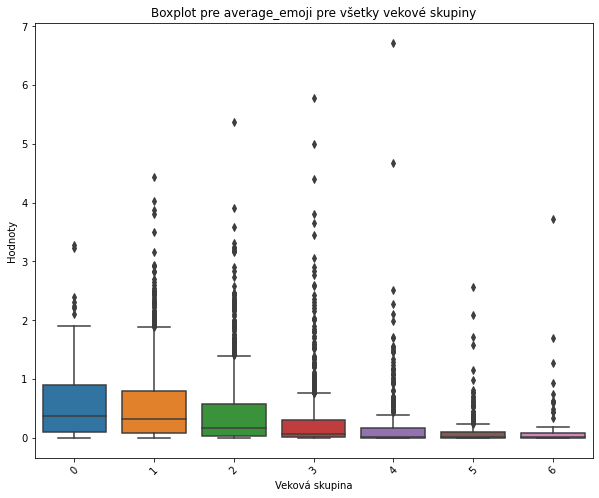

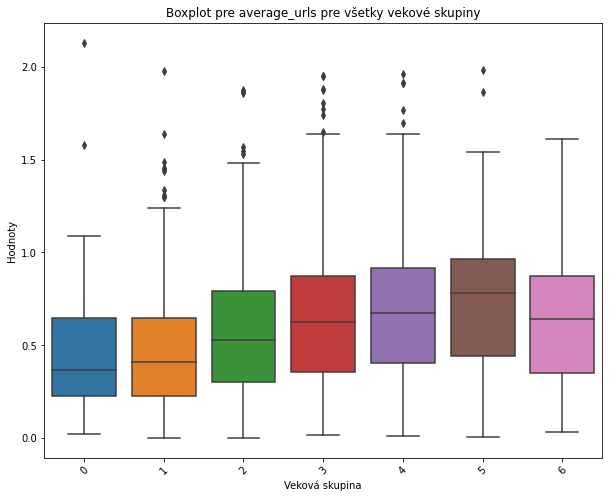

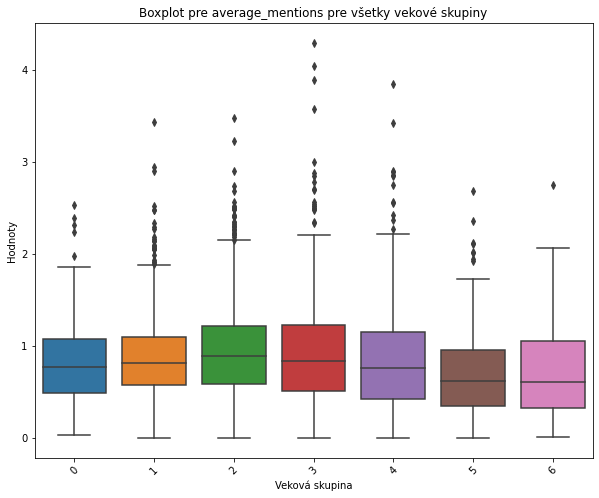

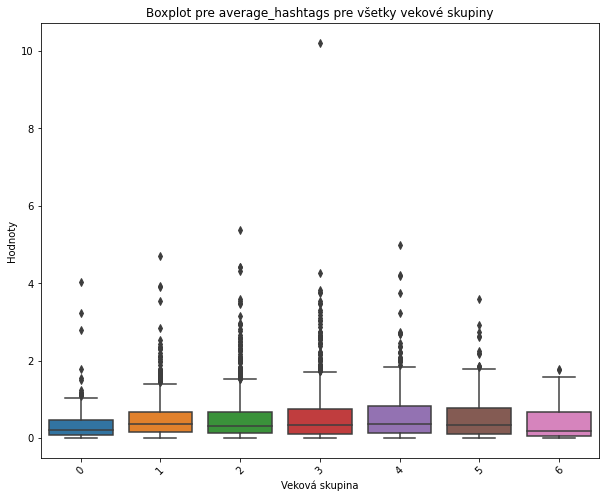

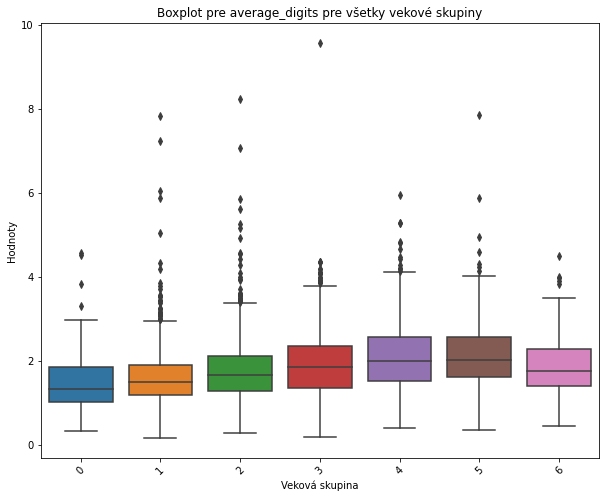

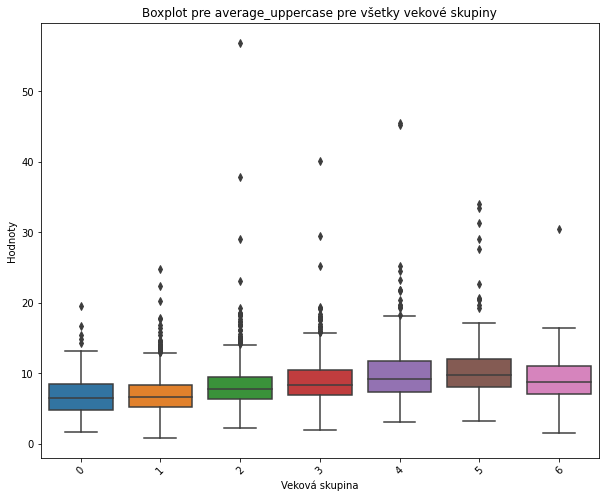

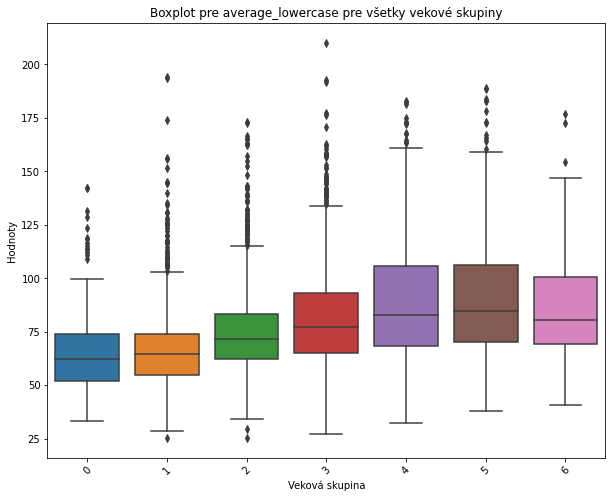

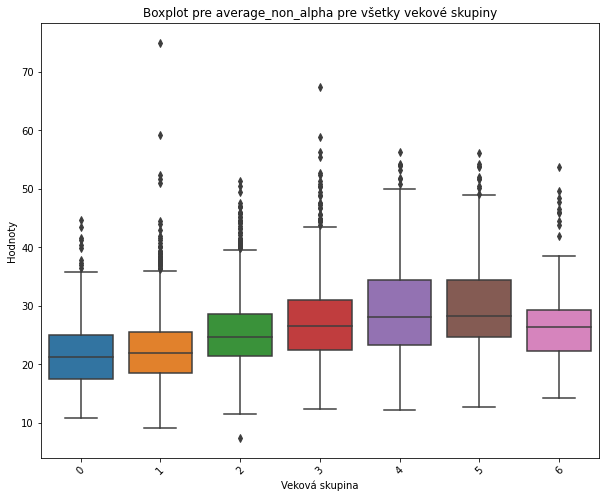

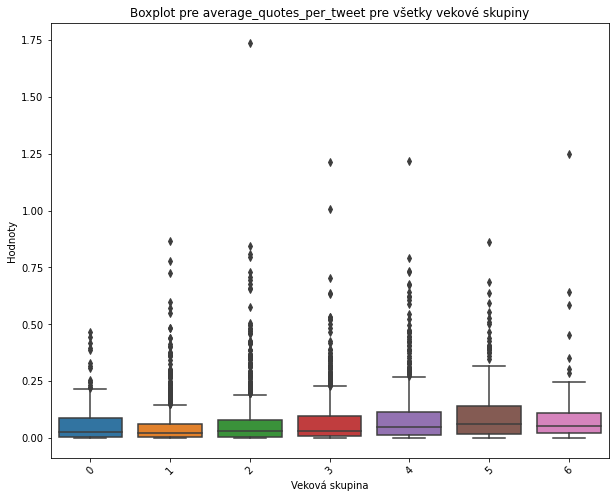

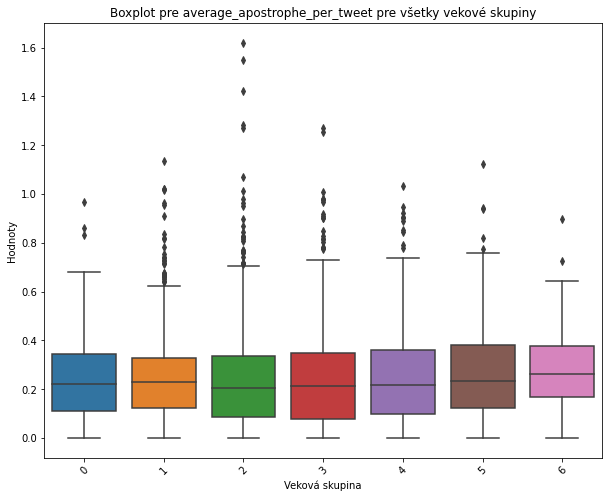

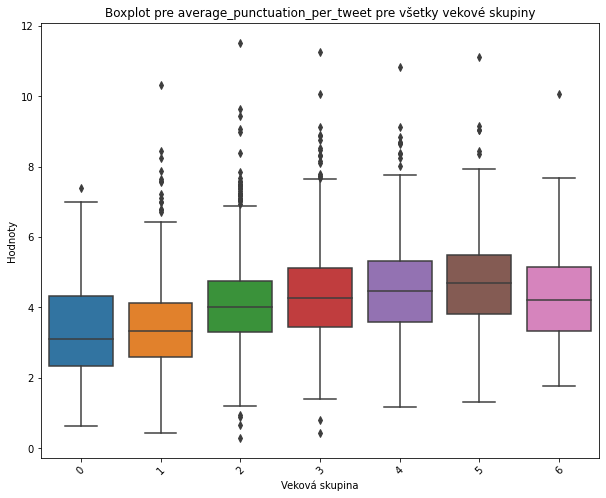

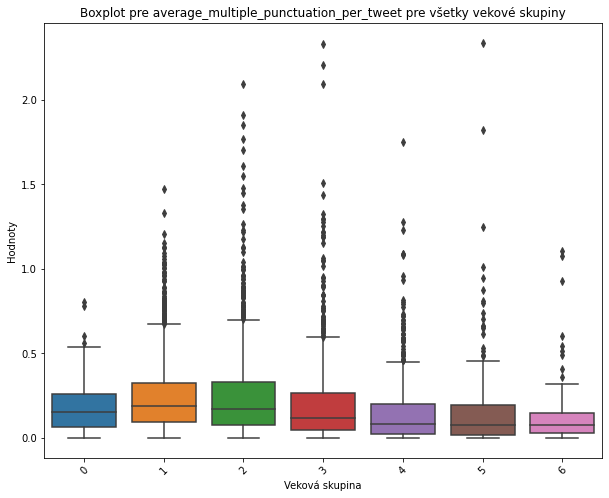

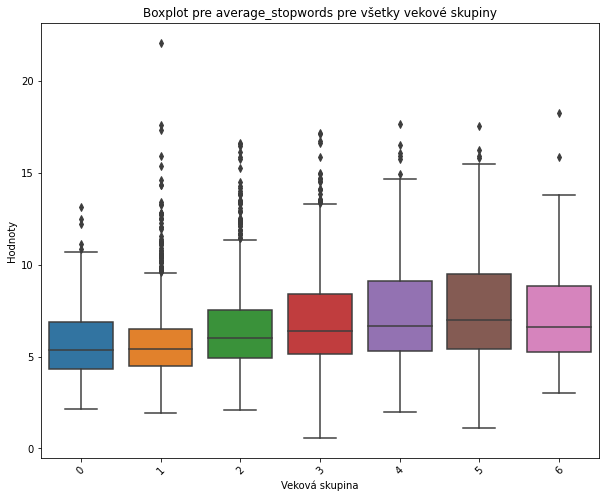

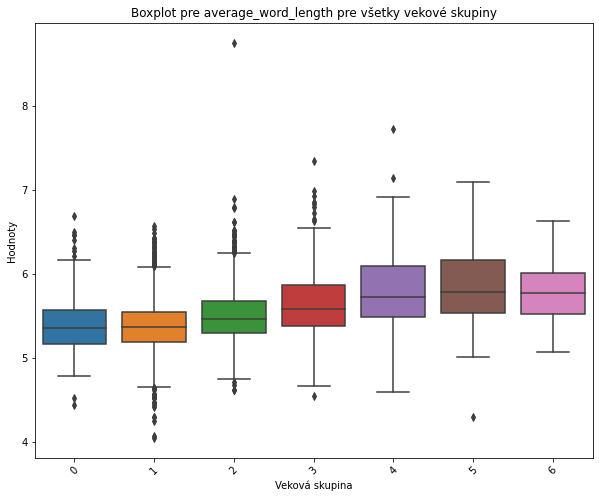

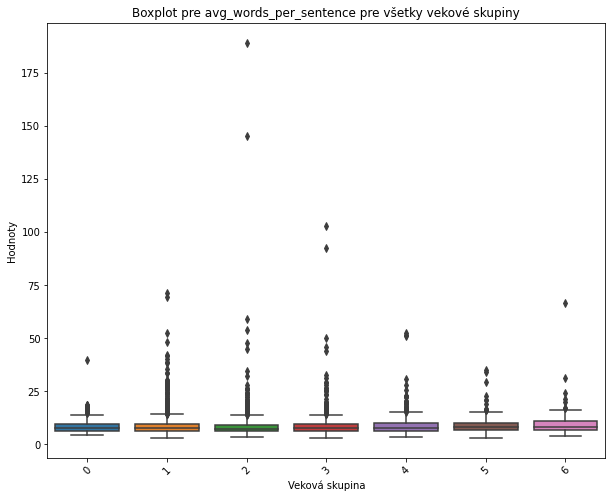

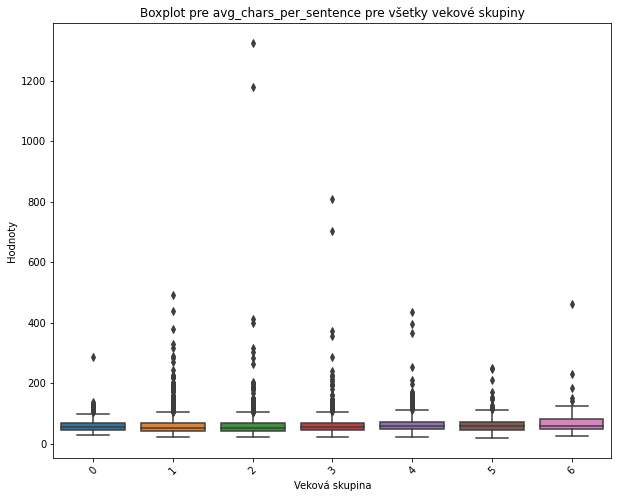

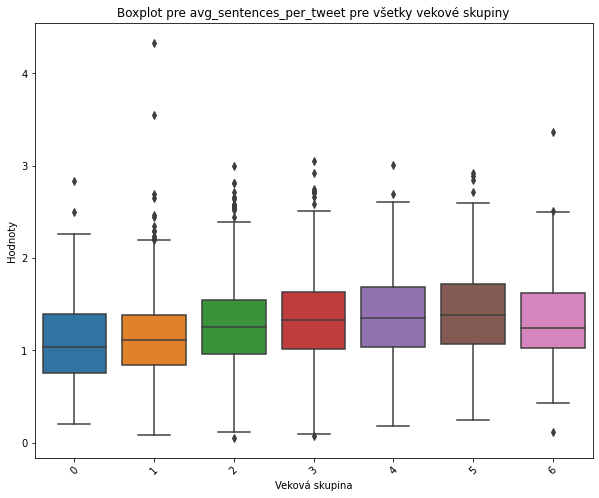

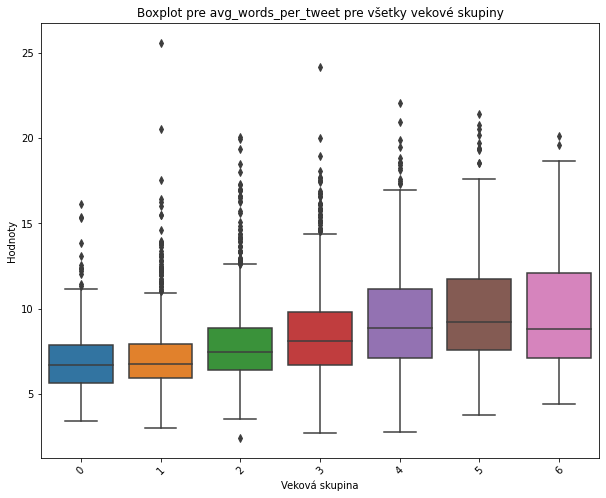

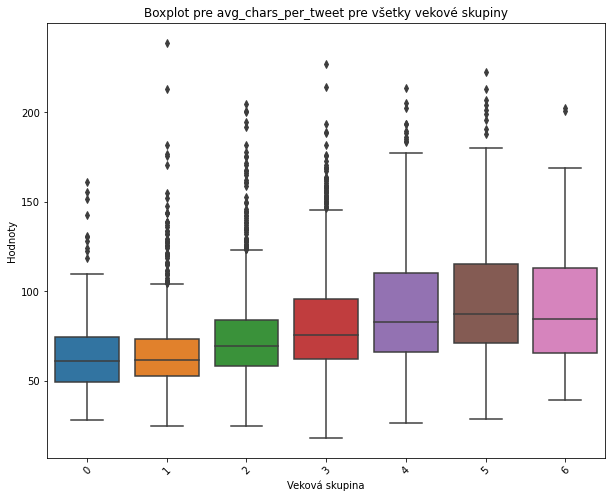

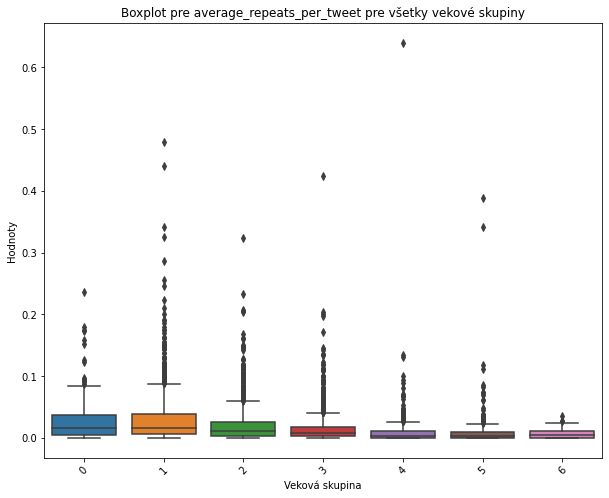

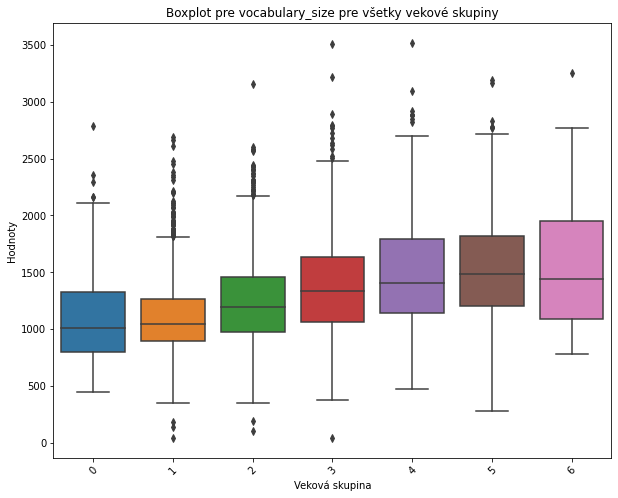

In [18]:
for column in columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='age_group', y=column, data=dataset)
    plt.title(f'Boxplot pre {column} pre všetky vekové skupiny')
    plt.ylabel('Hodnoty')
    plt.xlabel('Veková skupina')
    plt.xticks(rotation=45)
    plt.show()

Chceli sme zistiť outlierov pre každý slpcec a zároveň vekovú skupinu. Zistili sme si v celkom datasete (nie pre X_train a X_test oddelene, kedže tie hranice by sa mohli líšiť) hranice a mean pre každý stlpec a zároveň každú vekovú skupinu.

In [19]:
global_stats = {}
# Prechádza cez unikátne vekové skupiny v dátovom rámci
for age_group in dataset['age_group'].unique():
    # Prechádza cez zoznam stĺpcov, pre ktoré sa majú vypočítať štatistiky
    for column in columns:
        # Vyberie podmnožinu dát patriacu k aktuálnej vekovej skupine
        group_subset = dataset[dataset['age_group'] == age_group]
        # Vypočíta dolný limit ako 10. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        lower_limit = group_subset[column].quantile(0.10)
        # Vypočíta horny limit ako 90. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        upper_limit = group_subset[column].quantile(0.90)
        # Vypočítanie priemernej hodnoty pre dáta medzi dolným a horným limitom
        mean_value = group_subset[(group_subset[column] >= lower_limit) & (group_subset[column] <= upper_limit)][column].mean()
        # Uloženie vypočítaných štatistík do slovníka s kľúčom ako dvojica (veková skupina, názov stĺpca)
        global_stats[(age_group, column)] = (lower_limit, upper_limit, mean_value)

In [20]:
X_train_out = X_train.copy()
X_test_out = X_test.copy()

Následne sme si prvky v stlpcoch, ktoré su pod dolnou hranicou alebo za hornou hranocou nahranili meanom v trenovacom aj v testovacom datasete.

In [21]:
# Iteruje cez každý riadok datasetu
for index, row in X_train_out.iterrows():
    # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_train.loc[index] 
    
    # Iteruje cez stlpce
    for column in columns:
        # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_train_out.at[index, column] = mean_value

In [22]:
# Iteruje cez každý riadok datasetu
for index, row in X_test_out.iterrows():
     # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_test.loc[index] 
    # Iteruje cez stlpce
    for column in columns:
         # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_test_out.at[index, column] = mean_value

Spojenie s frekvenciami slov / tfidf frekvenciami slov

In [23]:
X_train_combined_out = hstack([X_train_out, word_train])
X_test_combined_out = hstack([X_test_out, word_test])
X_train_combined2_out = hstack([X_train_out, word_train_tfidf])
X_test_combined2_out = hstack([X_test_out, word_test_tfidf])

S aplikovaným škálovaním

SKALOVANIE

Kedže množstvo mojích dát má iné rozsahy a niektoré algoritmy strojového učenia (najmä tie, ktoré sú založené na vzdialenosti ) ako napríklad SVC sú citlivé na rozsahy tak som sa rozhodla pre škálovanie. Škálovanie môže pomôcť zabezpečiť, že jeden atribút neovládne ostatné pri výpočte vzdialeností.

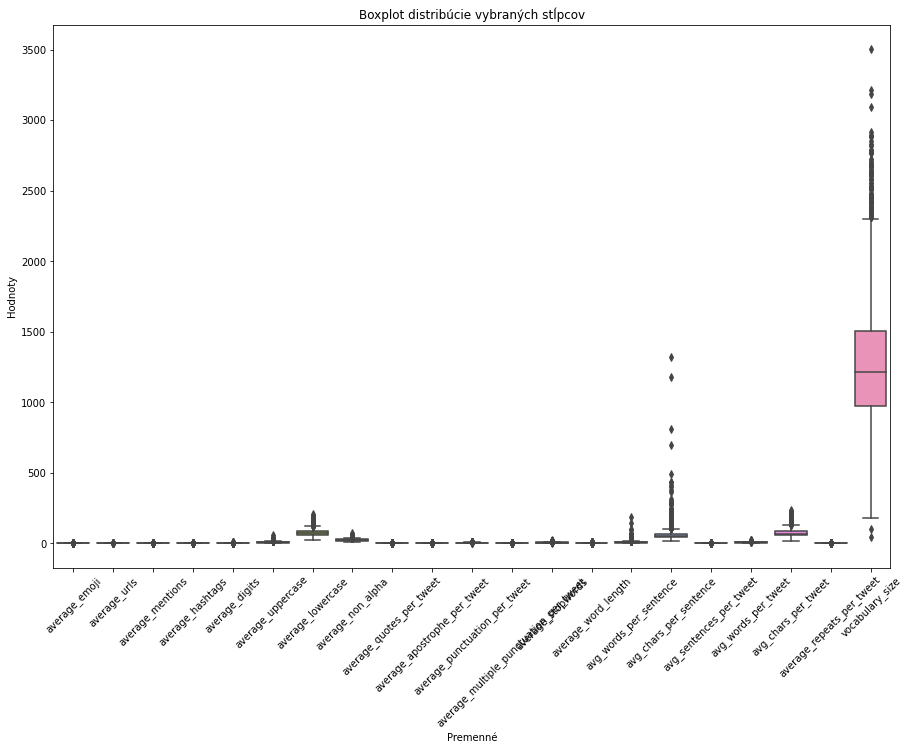

In [24]:
melted_df = pd.melt(X_train, value_vars=columns)
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

In [25]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

Skalovala som si všetky numericke stpce a to tak, že som to fitla na trenovaci dataset a transormovala na obidvoch, aj na trenovacom aj testovacom

In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scaled[columns] = scaler.transform(X_train_scaled[columns])
X_test_scaled[columns] = scaler.transform(X_test_scaled[columns])

Spojenie datasetu  s frekvenciami slov / tfidf frekvenciami slov

In [27]:
X_train_combined_scaled = hstack([X_train_scaled, word_train])
X_test_combined_scaled = hstack([X_test_scaled, word_test])
X_train_combined2_scaled = hstack([X_train_scaled, word_train_tfidf])
X_test_combined2_scaled = hstack([X_test_scaled, word_test_tfidf])

Zobrazili sme si zoskalovane data a vidíme, že sú v rovnakom rozmedzí, však nachádza sa tam množstvo outlierov

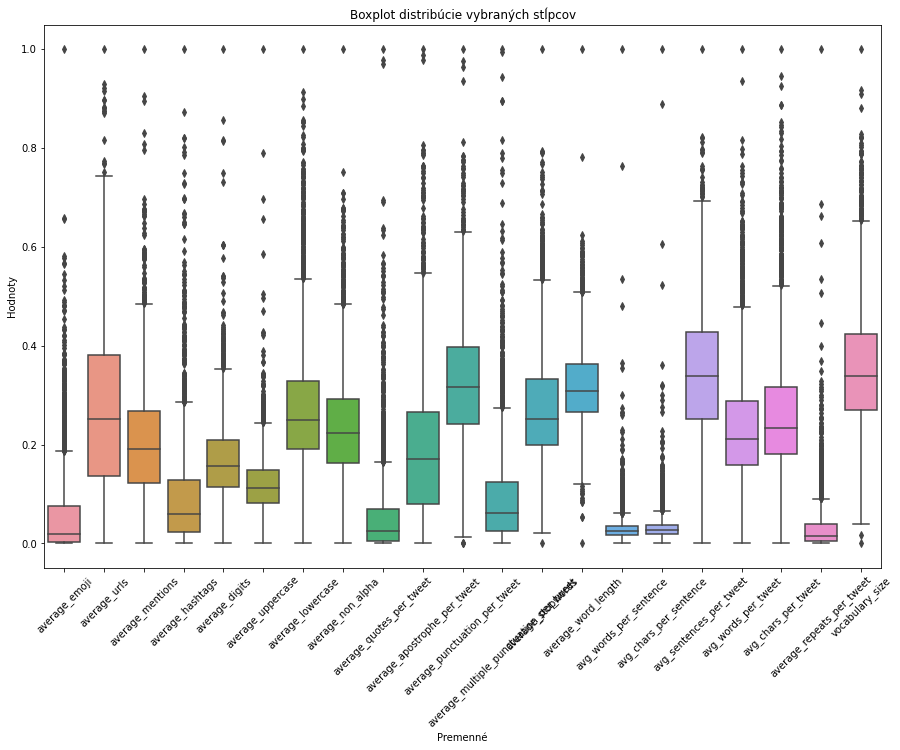

In [28]:
melted_df = pd.melt(X_train_scaled, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

S ošetrenými outliermi aj aplikovaným škálovaním

In [29]:
X_train_scal_out = X_train_out.copy()
X_test_scal_out = X_test_out.copy()

Zoškálujem si dataset s ošetrenými outliermi

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scal_out[columns] = scaler.transform(X_train_scal_out[columns])
X_test_scal_out[columns] = scaler.transform(X_test_scal_out[columns])

Spojím si dataset  s frekvenciami slov / tfidf frekvenciami slov

In [31]:
X_train_combined_scal_out = hstack([X_train_scal_out, word_train])
X_test_combined_scal_out = hstack([X_test_scal_out, word_test])
X_train_combined2_scal_out = hstack([X_train_scal_out, word_train_tfidf])
X_test_combined2_scal_out = hstack([X_test_scal_out, word_test_tfidf])

TRENOVANIE 1 

Prvé trenovanie som vykonala so všetkými premennými (bez výberu črt) aby som videla aké výsledky môžem dostať. Vykonala som testovanie na 3 modeloch: Random Forest, GBM a SVC. Taktiež na každom modeli som skúsila rôzne varianty datasetu aby som videla s ktorým viem dosiahnúť najlepšie výsledky: bez ošetrenia outlierov a bez škálovania, bez ošetrenia outlierov a bez škálovania a s frekvenciou slov, bez ošetrenia outlierov a bez škálovania a s tfidf frekvenciou slov, s ošetrením outlierov, s ošetrením outlierov a s frekvenciou slov, s ošetrením outlierov a s tfidf frekvenciou slov, so škálovaním, so škálovaním a s frekvenciou slov, so škálovaním a s tfidf frekvenciou slov, s ošetrením outlierov a so škálovaním, s ošetrením outlierov a so škálovaním a s frekvenciou slov, s ošetrením outlierov a so škálovaním a s tfidf frekvenciou slov.

In [32]:
results_list1_svc=[]#na ukladanie testovacej a trenovacej accuracy

SVC - bez ošetrenia outlierov a skalovania

Trenovanie modelu

In [33]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predikovanie na trenovacich datach

In [34]:
y_pred_train = svc_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))


Presnosť: 0.33259773013871374
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.38      0.76      0.51       916
           2       0.27      0.34      0.30       867
           3       0.25      0.10      0.15       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.33      3172
   macro avg       0.13      0.17      0.14      3172
weighted avg       0.23      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [35]:
y_pred = svc_model.predict(X_test)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.39      0.81      0.53       393
           2       0.25      0.31      0.28       358
           3       0.16      0.07      0.10       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.33      1360
   macro avg       0.11      0.17      0.13      1360
weighted avg       0.21      0.33      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


uloženie trenovacej a testovacej accuracy do poľa s výsledkami z prveho testovania pre svc

In [36]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


Zobrazenie metrik

In [37]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.328
Recall: 0.17
Precision: 0.11
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

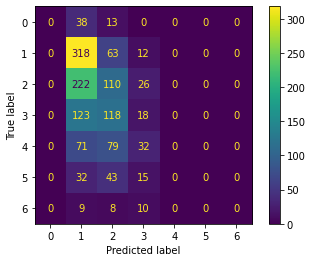

In [38]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a frekvenciou slov

In [39]:
svc_model = SVC()
svc_model.fit(X_train_combined, y_train)

SVC()

In [40]:
y_pred_train = svc_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.34615384615384615
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.40      0.75      0.52       916
           2       0.28      0.38      0.33       867
           3       0.27      0.14      0.18       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.35      3172
   macro avg       0.14      0.18      0.15      3172
weighted avg       0.25      0.35      0.28      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
y_pred = svc_model.predict(X_test_combined)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.40      0.79      0.53       393
           2       0.27      0.34      0.30       358
           3       0.18      0.10      0.13       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.34      1360
   macro avg       0.12      0.18      0.14      1360
weighted avg       0.22      0.34      0.26      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [43]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.34
Recall: 0.18
Precision: 0.12
F1 Score: 0.14


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


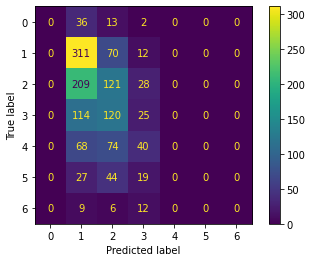

In [44]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf frekvenciou slov

In [45]:
svc_model = SVC()
svc_model.fit(X_train_combined2, y_train)

SVC()

In [46]:
y_pred_train = svc_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3329129886506936
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.38      0.77      0.51       916
           2       0.27      0.33      0.30       867
           3       0.25      0.10      0.15       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.33      3172
   macro avg       0.13      0.17      0.14      3172
weighted avg       0.23      0.33      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_pred = svc_model.predict(X_test_combined2)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.39      0.81      0.53       393
           2       0.25      0.30      0.28       358
           3       0.16      0.07      0.10       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.33      1360
   macro avg       0.11      0.17      0.13      1360
weighted avg       0.21      0.33      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [49]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.33
Recall: 0.17
Precision: 0.11
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


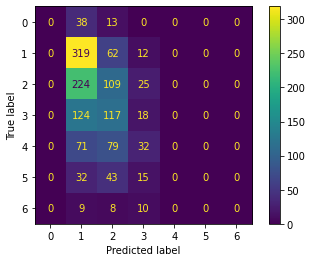

In [50]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov

In [51]:
svc_model = SVC()
svc_model.fit(X_train_out, y_train)

SVC()

In [52]:
y_pred_train = svc_model.predict(X_train_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.78      0.61       916
           2       0.34      0.50      0.40       867
           3       0.34      0.20      0.26       611
           4       0.41      0.08      0.14       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.41      3172
   macro avg       0.23      0.22      0.20      3172
weighted avg       0.35      0.41      0.35      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_pred = svc_model.predict(X_test_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.51      0.82      0.63       393
           2       0.34      0.51      0.41       358
           3       0.31      0.19      0.23       259
           4       0.41      0.09      0.15       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.20      1360
weighted avg       0.35      0.42      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [55]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


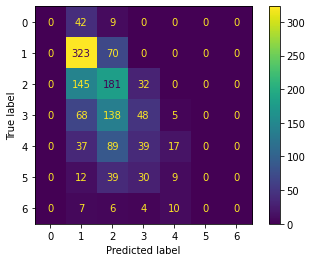

In [56]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a frekvenciou slov

In [57]:
svc_model = SVC()
svc_model.fit(X_train_combined_out, y_train)

SVC()

In [58]:
y_pred_train = svc_model.predict(X_train_combined_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.51      0.78      0.62       916
           2       0.34      0.51      0.41       867
           3       0.33      0.20      0.25       611
           4       0.44      0.11      0.18       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.42      3172
   macro avg       0.23      0.23      0.21      3172
weighted avg       0.36      0.42      0.36      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
y_pred = svc_model.predict(X_test_combined_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.82      0.64       393
           2       0.35      0.53      0.42       358
           3       0.29      0.18      0.22       259
           4       0.42      0.11      0.17       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.21      1360
weighted avg       0.35      0.42      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [61]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


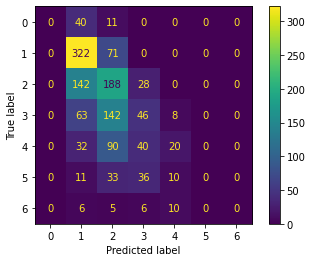

In [62]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf frekvenciou slov

In [63]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out, y_train)

SVC()

In [64]:
y_pred_train = svc_model.predict(X_train_combined2_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.78      0.61       916
           2       0.34      0.50      0.40       867
           3       0.35      0.20      0.26       611
           4       0.42      0.09      0.15       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.41      3172
   macro avg       0.23      0.22      0.20      3172
weighted avg       0.35      0.41      0.35      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
y_pred = svc_model.predict(X_test_combined2_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.51      0.82      0.63       393
           2       0.34      0.52      0.41       358
           3       0.32      0.18      0.23       259
           4       0.40      0.09      0.15       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.20      1360
weighted avg       0.35      0.42      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [67]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


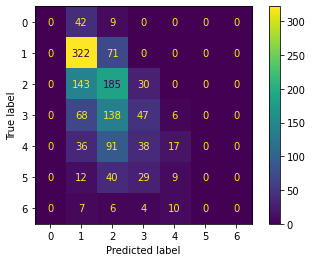

In [68]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim

In [69]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [70]:
y_pred_train = svc_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.43505674653215637
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.56      0.66      0.61       916
           2       0.37      0.62      0.46       867
           3       0.35      0.26      0.30       611
           4       0.43      0.18      0.26       380
           5       0.86      0.03      0.05       213
           6       0.00      0.00      0.00        44

    accuracy                           0.44      3172
   macro avg       0.37      0.25      0.24      3172
weighted avg       0.44      0.44      0.39      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
y_pred = svc_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.68      0.60       393
           2       0.32      0.52      0.40       358
           3       0.24      0.19      0.21       259
           4       0.34      0.14      0.20       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.20      0.22      0.20      1360
weighted avg       0.33      0.39      0.34      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [73]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.22
Precision: 0.20
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


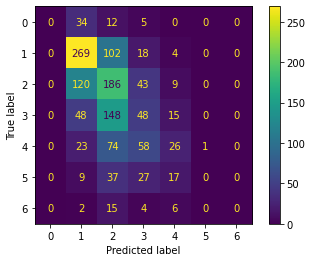

In [74]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a frekvenciou slov

In [75]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled, y_train)

SVC()

In [76]:
y_pred_train = svc_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6440731399747793
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.58      0.57      0.58       611
           4       0.73      0.47      0.57       380
           5       0.94      0.37      0.53       213
           6       1.00      0.07      0.13        44

    accuracy                           0.64      3172
   macro avg       0.79      0.44      0.47      3172
weighted avg       0.68      0.64      0.62      3172



In [77]:
y_pred = svc_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.67      0.63       393
           2       0.35      0.52      0.42       358
           3       0.29      0.32      0.30       259
           4       0.36      0.19      0.25       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [79]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


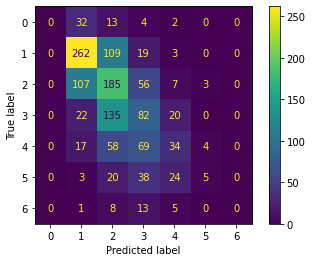

In [80]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf frekvenciou slov

In [81]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled, y_train)

SVC()

In [82]:
y_pred_train = svc_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5986759142496847
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.72      0.80      0.76       916
           2       0.55      0.75      0.63       867
           3       0.52      0.56      0.54       611
           4       0.56      0.40      0.46       380
           5       0.78      0.13      0.22       213
           6       0.00      0.00      0.00        44

    accuracy                           0.60      3172
   macro avg       0.45      0.38      0.37      3172
weighted avg       0.58      0.60      0.56      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_pred = svc_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4522058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.61      0.69      0.65       393
           2       0.40      0.57      0.47       358
           3       0.32      0.35      0.34       259
           4       0.38      0.25      0.30       182
           5       0.40      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.45      1360
   macro avg       0.30      0.27      0.26      1360
weighted avg       0.42      0.45      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [85]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.45
Recall: 0.27
Precision: 0.30
F1 Score: 0.26


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


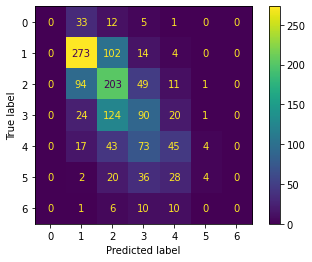

In [86]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim

In [87]:
svc_model = SVC()
svc_model.fit(X_train_scal_out, y_train)

SVC()

In [88]:
y_pred_train = svc_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4110970996216898
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.78      0.61       916
           2       0.34      0.50      0.40       867
           3       0.34      0.20      0.26       611
           4       0.41      0.08      0.14       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.41      3172
   macro avg       0.23      0.22      0.20      3172
weighted avg       0.35      0.41      0.35      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_pred = svc_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4183823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.51      0.82      0.63       393
           2       0.34      0.51      0.41       358
           3       0.31      0.19      0.23       259
           4       0.41      0.09      0.15       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.20      1360
weighted avg       0.35      0.42      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


In [91]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


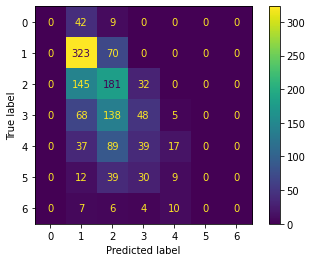

In [92]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a frekvenciou slov

In [93]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out, y_train)

SVC()

In [94]:
y_pred_train = svc_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.41740226986128626
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.51      0.78      0.62       916
           2       0.34      0.51      0.41       867
           3       0.33      0.20      0.25       611
           4       0.44      0.11      0.18       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.42      3172
   macro avg       0.23      0.23      0.21      3172
weighted avg       0.36      0.42      0.36      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
y_pred = svc_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.82      0.64       393
           2       0.35      0.53      0.42       358
           3       0.29      0.18      0.22       259
           4       0.42      0.11      0.17       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.21      1360
weighted avg       0.35      0.42      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [97]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


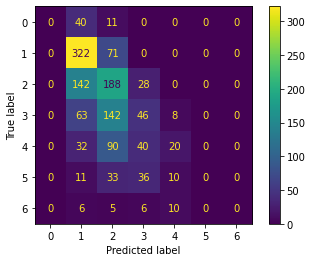

In [98]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf frekvenciou slov

In [99]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out, y_train)

SVC()

In [100]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4120428751576293
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.78      0.61       916
           2       0.34      0.50      0.40       867
           3       0.35      0.20      0.26       611
           4       0.42      0.09      0.15       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.41      3172
   macro avg       0.23      0.22      0.20      3172
weighted avg       0.35      0.41      0.35      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_pred = svc_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4198529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.51      0.82      0.63       393
           2       0.34      0.52      0.41       358
           3       0.32      0.18      0.23       259
           4       0.40      0.09      0.15       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.23      0.23      0.20      1360
weighted avg       0.35      0.42      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [103]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.23
Precision: 0.23
F1 Score: 0.20


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


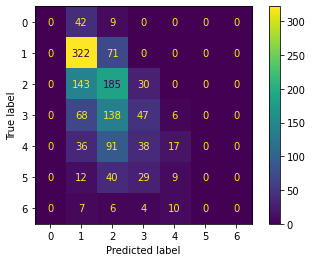

In [104]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [105]:
results_svc1 = pd.DataFrame(results_list1_svc)
print(results_svc1)

    accuracy_train  accuracy_test
0         0.332598       0.327941
1         0.346154       0.336029
2         0.332913       0.327941
3         0.411097       0.418382
4         0.417402       0.423529
5         0.412043       0.419853
6         0.435057       0.388971
7         0.644073       0.417647
8         0.598676       0.452206
9         0.411097       0.418382
10        0.417402       0.423529
11        0.412043       0.419853


Podľa výsledkov po prvom testovani svc môžeme vidieť, že najlepší výsledok mal dataset so škálovaním a tfidf frekvenciou slov. Takže je zrejme, že najväčší vplyv na úspešnosť pridanie textovej reprezentácie. Aj ked sme použili všetký dáta, tak model nevyzerá byť pretrénovaný, kedže trénovacie accuracy nie je priveľmi vysoké oproti trénovacému accuracy. Zatiaľ tento model nevykazuje vysokú presnosť.

RANDOM FOREST - bez ošetrenia outlierov a skalovania

In [106]:
results_list1_rf=[] #na ukladanie trenovacej a testovacej accuracy

Trenovanie modelu na trenovacich datach

In [107]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train) 

RandomForestClassifier()

Predikovanie na trenovacich datach

In [108]:
y_pred_train = rf_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [109]:
y_pred = rf_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.67      0.60       393
           2       0.34      0.47      0.40       358
           3       0.31      0.27      0.29       259
           4       0.37      0.24      0.29       182
           5       0.27      0.09      0.13        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.26      0.25      0.24      1360
weighted avg       0.37      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
results_list1_rf.append({#uloženie trenovaceho a testovaceho accuracy
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })


Zobrazenie metrik

In [111]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro') 
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.26
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

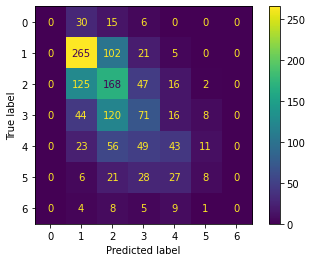

In [112]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a frekvenciou slov

In [113]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [114]:
y_pred_train = rf_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [115]:
y_pred = rf_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3977941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.69      0.60       393
           2       0.33      0.48      0.39       358
           3       0.28      0.23      0.25       259
           4       0.33      0.17      0.23       182
           5       0.33      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [117]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.26
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


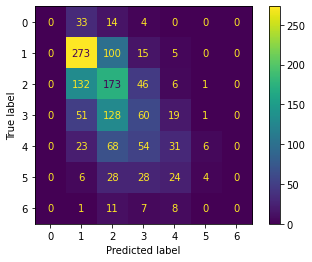

In [118]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf frekvenciou slov

In [119]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2, y_train)

RandomForestClassifier()

In [120]:
y_pred_train = rf_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [121]:
y_pred = rf_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40661764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.71      0.60       393
           2       0.33      0.48      0.39       358
           3       0.29      0.23      0.26       259
           4       0.42      0.22      0.29       182
           5       0.67      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.32      0.24      0.23      1360
weighted avg       0.39      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [123]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.32
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


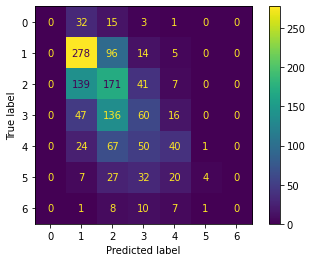

In [124]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov

In [125]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out, y_train)

RandomForestClassifier()

In [126]:
y_pred_train = rf_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [127]:
y_pred = rf_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7455882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.38        51
           1       0.84      0.90      0.87       393
           2       0.70      0.86      0.77       358
           3       0.67      0.70      0.69       259
           4       0.75      0.64      0.69       182
           5       0.75      0.46      0.57        90
           6       0.00      0.00      0.00        27

    accuracy                           0.75      1360
   macro avg       0.67      0.54      0.57      1360
weighted avg       0.74      0.75      0.73      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [129]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.75
Recall: 0.54
Precision: 0.67
F1 Score: 0.57


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


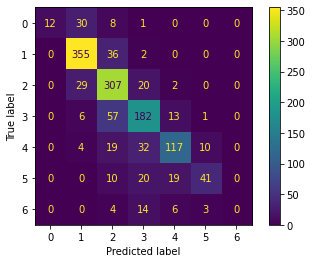

In [130]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a frekvenciou slov

In [131]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out, y_train)

RandomForestClassifier()

In [132]:
y_pred_train = rf_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [133]:
y_pred = rf_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6257352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.74      0.90      0.81       393
           2       0.59      0.78      0.67       358
           3       0.52      0.51      0.51       259
           4       0.57      0.43      0.49       182
           5       0.64      0.08      0.14        90
           6       0.00      0.00      0.00        27

    accuracy                           0.63      1360
   macro avg       0.44      0.39      0.38      1360
weighted avg       0.58      0.63      0.58      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [135]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.63
Recall: 0.39
Precision: 0.44
F1 Score: 0.38


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


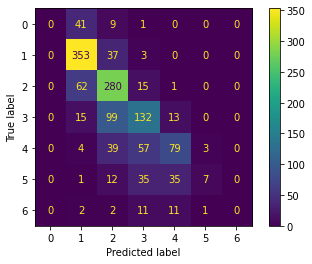

In [136]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf frekvenciou slov

In [137]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out, y_train)

RandomForestClassifier()

In [138]:
y_pred_train = rf_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [139]:
y_pred = rf_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6102941176470589
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.70      0.88      0.78       393
           2       0.58      0.77      0.66       358
           3       0.51      0.50      0.51       259
           4       0.56      0.38      0.45       182
           5       0.56      0.10      0.17        90
           6       0.00      0.00      0.00        27

    accuracy                           0.61      1360
   macro avg       0.42      0.38      0.37      1360
weighted avg       0.57      0.61      0.57      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [141]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.61
Recall: 0.38
Precision: 0.42
F1 Score: 0.37


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


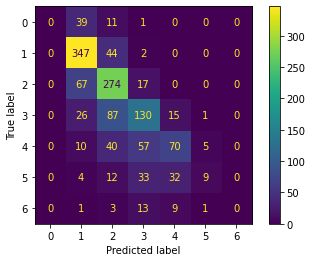

In [142]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim

In [143]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [144]:
y_pred_train = rf_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [145]:
y_pred = rf_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39558823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.51      0.67      0.58       393
           2       0.32      0.43      0.37       358
           3       0.31      0.29      0.30       259
           4       0.39      0.23      0.29       182
           5       0.22      0.07      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.36      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [147]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


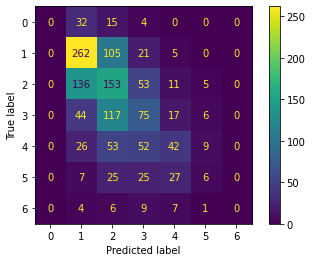

In [148]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a frekvenciou slov

In [149]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled, y_train)

RandomForestClassifier()

In [150]:
y_pred_train = rf_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [151]:
y_pred = rf_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.70      0.62       393
           2       0.35      0.51      0.42       358
           3       0.27      0.25      0.26       259
           4       0.35      0.18      0.24       182
           5       0.23      0.03      0.06        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [153]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


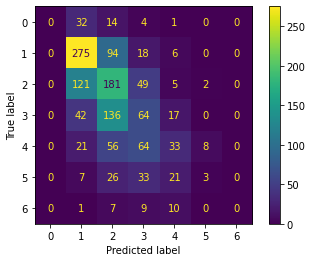

In [154]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf frekvenciou slov

In [155]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled, y_train)

RandomForestClassifier()

In [156]:
y_pred_train = rf_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [157]:
y_pred = rf_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.73      0.62       393
           2       0.33      0.49      0.39       358
           3       0.27      0.22      0.25       259
           4       0.36      0.17      0.23       182
           5       0.40      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [159]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


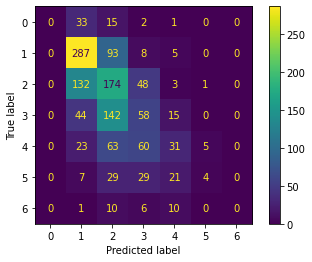

In [160]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim

In [161]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out, y_train)

RandomForestClassifier()

In [162]:
y_pred_train = rf_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [163]:
y_pred = rf_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7463235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.41        51
           1       0.83      0.91      0.87       393
           2       0.71      0.85      0.77       358
           3       0.68      0.72      0.70       259
           4       0.71      0.64      0.67       182
           5       0.75      0.42      0.54        90
           6       0.00      0.00      0.00        27

    accuracy                           0.75      1360
   macro avg       0.67      0.54      0.57      1360
weighted avg       0.74      0.75      0.73      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [165]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.75
Recall: 0.54
Precision: 0.67
F1 Score: 0.57


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


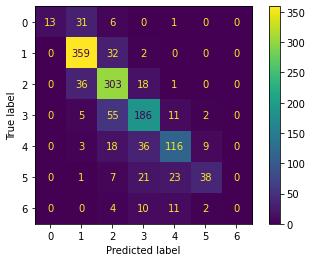

In [166]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a frekvenciou slov

In [167]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out, y_train)

RandomForestClassifier()

In [168]:
y_pred_train = rf_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [169]:
y_pred = rf_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6213235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.74      0.90      0.81       393
           2       0.59      0.78      0.67       358
           3       0.50      0.50      0.50       259
           4       0.56      0.40      0.47       182
           5       0.53      0.10      0.17        90
           6       0.00      0.00      0.00        27

    accuracy                           0.62      1360
   macro avg       0.42      0.38      0.37      1360
weighted avg       0.57      0.62      0.58      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [171]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.62
Recall: 0.38
Precision: 0.42
F1 Score: 0.37


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


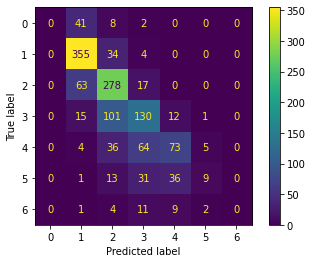

In [172]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf frekvenciou slov

In [173]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out, y_train)

RandomForestClassifier()

In [174]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [175]:
y_pred = rf_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6014705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.71      0.88      0.79       393
           2       0.56      0.74      0.64       358
           3       0.49      0.51      0.50       259
           4       0.58      0.36      0.44       182
           5       0.62      0.11      0.19        90
           6       0.00      0.00      0.00        27

    accuracy                           0.60      1360
   macro avg       0.42      0.37      0.36      1360
weighted avg       0.56      0.60      0.56      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [177]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.60
Recall: 0.37
Precision: 0.42
F1 Score: 0.36


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


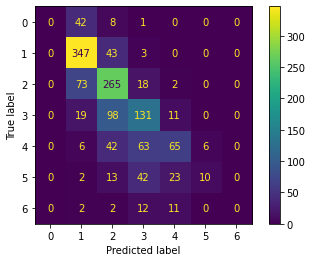

In [178]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [179]:
results_rf1 = pd.DataFrame(results_list1_rf)
print(results_rf1)

    accuracy_train  accuracy_test
0              1.0       0.408088
1              1.0       0.397794
2              1.0       0.406618
3              1.0       0.745588
4              1.0       0.625735
5              1.0       0.610294
6              1.0       0.395588
7              1.0       0.408824
8              1.0       0.407353
9              1.0       0.746324
10             1.0       0.621324
11             1.0       0.601471


Podľa výsledkov po prvom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi s skalovaním (bez textových reprezentácií). Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Ked si porovnáme accuracy pri trenovacom a testovacom datasete je zrejme, že model sa pretrénoval, však toto je celkom bežné pri stromových algoritmoch a treba to ošetriť hyperparametrami. Zatiaľ tento model vykazuje vyššiu presnosť ako svc

GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania

In [180]:
results_list1_gbm=[]

Trenovanie modelu

In [181]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [182]:
y_pred_train = gbm_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7301387137452712
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       141
           1       0.71      0.81      0.76       916
           2       0.64      0.78      0.70       867
           3       0.76      0.68      0.72       611
           4       0.86      0.59      0.70       380
           5       0.95      0.67      0.79       213
           6       1.00      1.00      1.00        44

    accuracy                           0.73      3172
   macro avg       0.85      0.72      0.77      3172
weighted avg       0.75      0.73      0.73      3172



Predikovanie na testovacich datach

In [183]:
y_pred = gbm_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3845588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.08      0.02      0.03        51
           1       0.53      0.65      0.58       393
           2       0.34      0.44      0.38       358
           3       0.29      0.25      0.27       259
           4       0.31      0.20      0.24       182
           5       0.18      0.10      0.13        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.35      0.38      0.36      1360



In [184]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [185]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


Vizualizácia výkonnosti modelu

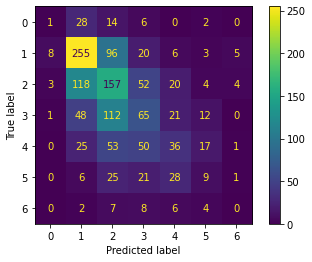

In [186]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania a frekvenciou slov

In [187]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined, y_train)

GradientBoostingClassifier()

In [188]:
y_pred_train = gbm_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8707440100882724
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       141
           1       0.87      0.95      0.91       916
           2       0.80      0.90      0.85       867
           3       0.88      0.84      0.86       611
           4       0.96      0.74      0.84       380
           5       0.99      0.78      0.88       213
           6       1.00      1.00      1.00        44

    accuracy                           0.87      3172
   macro avg       0.93      0.85      0.88      3172
weighted avg       0.88      0.87      0.87      3172



In [189]:
y_pred = gbm_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4183823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.23      0.10      0.14        51
           1       0.58      0.68      0.63       393
           2       0.35      0.47      0.40       358
           3       0.33      0.28      0.30       259
           4       0.37      0.25      0.30       182
           5       0.23      0.10      0.14        90
           6       0.05      0.04      0.04        27

    accuracy                           0.42      1360
   macro avg       0.31      0.27      0.28      1360
weighted avg       0.40      0.42      0.40      1360



In [190]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [191]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.31
F1 Score: 0.28


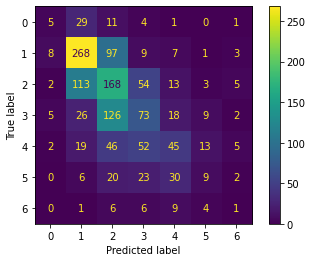

In [192]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()


GRADIENT BOOSTING MASHINE - bez ošetrenia outlierov a skalovania a tfidf frekvenciou slov

In [193]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2, y_train)

GradientBoostingClassifier()

In [194]:
y_pred_train = gbm_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9044766708701135
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       141
           1       0.89      0.97      0.93       916
           2       0.86      0.93      0.89       867
           3       0.92      0.89      0.90       611
           4       0.96      0.82      0.88       380
           5       0.97      0.83      0.90       213
           6       0.98      1.00      0.99        44

    accuracy                           0.90      3172
   macro avg       0.94      0.88      0.91      3172
weighted avg       0.91      0.90      0.90      3172



In [195]:
y_pred = gbm_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4345588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.33      0.08      0.13        51
           1       0.60      0.73      0.65       393
           2       0.38      0.49      0.42       358
           3       0.31      0.27      0.29       259
           4       0.39      0.25      0.31       182
           5       0.23      0.13      0.17        90
           6       0.00      0.00      0.00        27

    accuracy                           0.43      1360
   macro avg       0.32      0.28      0.28      1360
weighted avg       0.41      0.43      0.41      1360



In [196]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [197]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.32
F1 Score: 0.28


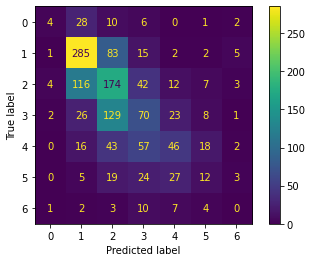

In [198]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov

In [199]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out, y_train)

GradientBoostingClassifier()

In [200]:
y_pred_train = gbm_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9776166456494325
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       141
           1       0.97      0.99      0.98       916
           2       0.96      0.98      0.97       867
           3       0.99      0.96      0.97       611
           4       1.00      0.96      0.98       380
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00        44

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [201]:
y_pred = gbm_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83        51
           1       0.90      0.96      0.93       393
           2       0.86      0.89      0.88       358
           3       0.89      0.86      0.87       259
           4       0.85      0.89      0.87       182
           5       0.90      0.81      0.85        90
           6       0.62      0.30      0.40        27

    accuracy                           0.88      1360
   macro avg       0.86      0.78      0.80      1360
weighted avg       0.88      0.88      0.88      1360



In [202]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [203]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.88
Recall: 0.78
Precision: 0.86
F1 Score: 0.80


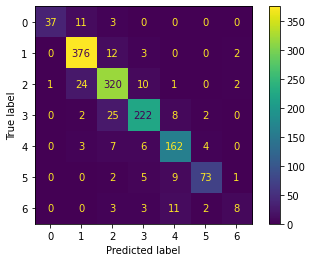

In [204]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a frekvenciou slov

In [205]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out, y_train)

GradientBoostingClassifier()

In [206]:
y_pred_train = gbm_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9918032786885246
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       141
           1       0.99      1.00      0.99       916
           2       0.99      1.00      0.99       867
           3       1.00      0.99      0.99       611
           4       1.00      0.97      0.99       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [207]:
y_pred = gbm_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8683823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        51
           1       0.91      0.95      0.93       393
           2       0.84      0.91      0.87       358
           3       0.87      0.86      0.87       259
           4       0.84      0.85      0.85       182
           5       0.81      0.72      0.76        90
           6       0.45      0.19      0.26        27

    accuracy                           0.87      1360
   macro avg       0.82      0.74      0.77      1360
weighted avg       0.86      0.87      0.86      1360



In [208]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [209]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.87
Recall: 0.74
Precision: 0.82
F1 Score: 0.77


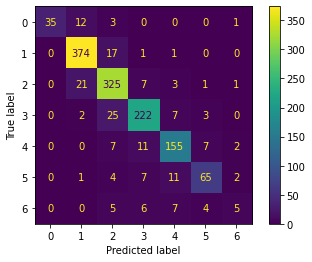

In [210]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a tfidf frekvenciou slov

In [211]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out, y_train)

GradientBoostingClassifier()

In [212]:
y_pred_train = gbm_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9936948297604036
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       141
           1       1.00      1.00      1.00       916
           2       0.99      1.00      0.99       867
           3       0.99      0.99      0.99       611
           4       1.00      0.98      0.99       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [213]:
y_pred = gbm_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8544117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.63      0.74        51
           1       0.90      0.96      0.93       393
           2       0.84      0.89      0.87       358
           3       0.86      0.82      0.84       259
           4       0.83      0.84      0.84       182
           5       0.82      0.71      0.76        90
           6       0.23      0.11      0.15        27

    accuracy                           0.85      1360
   macro avg       0.77      0.71      0.73      1360
weighted avg       0.85      0.85      0.85      1360



In [214]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [215]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.85
Recall: 0.71
Precision: 0.77
F1 Score: 0.73


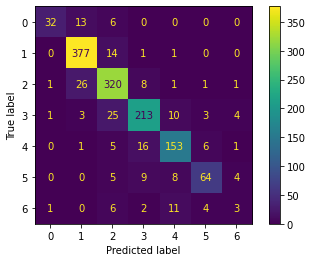

In [216]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - so skalovanim

In [217]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [218]:
y_pred_train = gbm_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7301387137452712
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       141
           1       0.71      0.81      0.76       916
           2       0.64      0.78      0.70       867
           3       0.76      0.68      0.72       611
           4       0.86      0.59      0.70       380
           5       0.95      0.67      0.79       213
           6       1.00      1.00      1.00        44

    accuracy                           0.73      3172
   macro avg       0.85      0.72      0.77      3172
weighted avg       0.75      0.73      0.73      3172



In [219]:
y_pred = gbm_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3830882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.09      0.02      0.03        51
           1       0.52      0.64      0.58       393
           2       0.34      0.43      0.38       358
           3       0.29      0.25      0.27       259
           4       0.32      0.20      0.25       182
           5       0.18      0.10      0.13        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.35      0.38      0.36      1360



In [220]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [221]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


GRADIENT BOOSTING MASHINE - so skalovanim a frekvenciou slov

In [222]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled, y_train)

GradientBoostingClassifier()

In [223]:
y_pred_train = gbm_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8757881462799496
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       141
           1       0.87      0.95      0.91       916
           2       0.81      0.91      0.85       867
           3       0.90      0.84      0.87       611
           4       0.96      0.76      0.85       380
           5       0.99      0.78      0.87       213
           6       1.00      1.00      1.00        44

    accuracy                           0.88      3172
   macro avg       0.93      0.86      0.89      3172
weighted avg       0.88      0.88      0.88      3172



In [224]:
y_pred = gbm_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.08      0.11        51
           1       0.59      0.67      0.63       393
           2       0.35      0.47      0.41       358
           3       0.33      0.30      0.31       259
           4       0.40      0.27      0.32       182
           5       0.22      0.09      0.13        90
           6       0.11      0.07      0.09        27

    accuracy                           0.42      1360
   macro avg       0.32      0.28      0.29      1360
weighted avg       0.40      0.42      0.41      1360



In [225]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [226]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.28
Precision: 0.32
F1 Score: 0.29


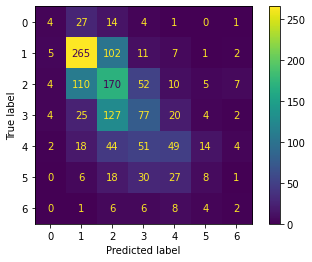

In [227]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a tfidf frekvenciou slov

In [228]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled, y_train)

GradientBoostingClassifier()

In [229]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9051071878940732
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       141
           1       0.90      0.96      0.93       916
           2       0.87      0.94      0.90       867
           3       0.91      0.89      0.90       611
           4       0.96      0.81      0.88       380
           5       0.98      0.84      0.90       213
           6       1.00      1.00      1.00        44

    accuracy                           0.91      3172
   macro avg       0.94      0.88      0.91      3172
weighted avg       0.91      0.91      0.90      3172



In [230]:
y_pred = gbm_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.10      0.04      0.06        51
           1       0.59      0.72      0.65       393
           2       0.38      0.48      0.42       358
           3       0.28      0.25      0.26       259
           4       0.36      0.23      0.28       182
           5       0.22      0.12      0.16        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.39      0.42      0.40      1360



In [231]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [232]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


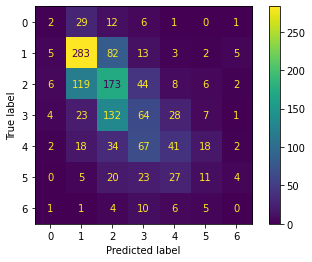

In [233]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim

In [234]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out, y_train)

GradientBoostingClassifier()

In [235]:
y_pred_train = gbm_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9776166456494325
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       141
           1       0.97      0.99      0.98       916
           2       0.96      0.98      0.97       867
           3       0.99      0.96      0.97       611
           4       1.00      0.96      0.98       380
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00        44

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [236]:
y_pred = gbm_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8794117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83        51
           1       0.90      0.96      0.93       393
           2       0.86      0.89      0.88       358
           3       0.89      0.86      0.87       259
           4       0.85      0.88      0.86       182
           5       0.88      0.81      0.84        90
           6       0.62      0.30      0.40        27

    accuracy                           0.88      1360
   macro avg       0.85      0.77      0.80      1360
weighted avg       0.88      0.88      0.88      1360



In [237]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [238]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.88
Recall: 0.77
Precision: 0.85
F1 Score: 0.80


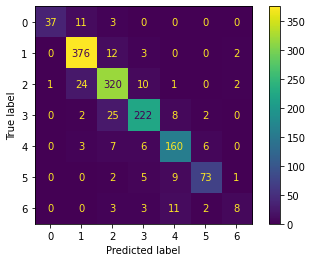

In [239]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim a frekvenciou slov

In [240]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out, y_train)

GradientBoostingClassifier()

In [241]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.989281210592686
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       0.99      1.00      0.99       916
           2       0.98      0.99      0.99       867
           3       0.99      0.98      0.98       611
           4       1.00      0.97      0.99       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [242]:
y_pred = gbm_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8720588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        51
           1       0.91      0.96      0.94       393
           2       0.85      0.91      0.87       358
           3       0.87      0.86      0.87       259
           4       0.85      0.86      0.86       182
           5       0.86      0.72      0.78        90
           6       0.46      0.22      0.30        27

    accuracy                           0.87      1360
   macro avg       0.83      0.74      0.77      1360
weighted avg       0.87      0.87      0.87      1360



In [243]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [244]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.87
Recall: 0.74
Precision: 0.83
F1 Score: 0.77


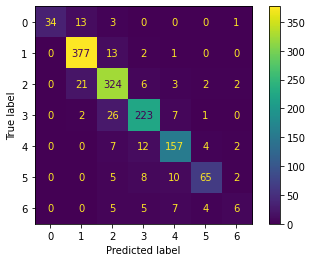

In [245]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - s ošetrenim outlierov a skalovanim a tfidf frekvenciou slov

In [246]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out, y_train)

GradientBoostingClassifier()

In [247]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9949558638083228
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       1.00      1.00      1.00       916
           2       0.99      1.00      0.99       867
           3       1.00      0.99      0.99       611
           4       1.00      0.98      0.99       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       0.99      0.99      0.99      3172



In [248]:
y_pred = gbm_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8558823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76        51
           1       0.90      0.95      0.93       393
           2       0.84      0.90      0.87       358
           3       0.84      0.84      0.84       259
           4       0.82      0.84      0.83       182
           5       0.86      0.69      0.77        90
           6       0.33      0.15      0.21        27

    accuracy                           0.86      1360
   macro avg       0.80      0.71      0.74      1360
weighted avg       0.85      0.86      0.85      1360



In [249]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [250]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.86
Recall: 0.71
Precision: 0.80
F1 Score: 0.74


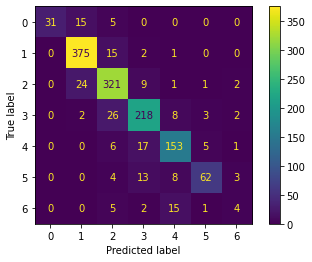

In [251]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [252]:
results_gbm1 = pd.DataFrame(results_list1_gbm)
print(results_gbm1)

    accuracy_train  accuracy_test
0         0.730139       0.384559
1         0.870744       0.418382
2         0.904477       0.434559
3         0.977617       0.880882
4         0.991803       0.868382
5         0.993695       0.854412
6         0.730139       0.383088
7         0.875788       0.422794
8         0.905107       0.422059
9         0.977617       0.879412
10        0.989281       0.872059
11        0.994956       0.855882


Podľa výsledkov po prvom testovani GBM môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi (bez textových reprezentácií). Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Pri pohľade na trenovacú a testovacu accuracy je zrejme, že sa model pretrénoval, to sa neskôr pokúsime zlepšiť. Tento model má zatiaľ najvyššiu presnosť.

VYBER CRT

In [253]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3057 to 836
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   fl

WRAPPER METHOD - Vyberajú podmnožiny črt, ktoré dávajú najlepší výkon modelu.

SVC - Recursive feature elimination (RFE)

In [257]:
model = SVC(kernel="linear")

# Vytvorí model RFE (Rekurzívna eliminácia prvkov) s použitím lineárneho modelu SVC
rfe = RFE(estimator=model)  # Inicializuj RFE s lineárnym modelom SVC a urč kroky pre každú iteráciu
selector = rfe.fit(X_train, y_train)  # Prispôsob model RFE

# Predpovedaj pomocou selektora RFE priamo na testovacích údajoch
predictions = selector.predict(X_test)  # Použi selektor na predpovedanie

# Vypočítaj skóre presnosti
accuracy = accuracy_score(y_test, predictions)

# Výstup vybraných prvkov a presnosti
print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_svc = X_train.loc[:, selector.support_].copy()
X_test_svc = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions',
       'average_quotes_per_tweet', 'average_apostrophe_per_tweet',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_sentences_per_tweet', 'average_repeats_per_tweet'],
      dtype='object')
Skóre presnosti: 0.37573529411764706


Zistila som, že najlepšie výsledky mi dávala metoda RFE, takže dalej som už iba s ňou pokračovala

SVC - ošetrený outlieri

In [260]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_svc = X_train_out.loc[:, selector.support_].copy()
X_test_out_svc = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_digits',
       'average_quotes_per_tweet', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_sentences_per_tweet', 'average_repeats_per_tweet'],
      dtype='object')
Skóre presnosti: 0.5051470588235294


SVC-scalovanie

In [261]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model)  
selector = rfe.fit(X_train_scaled, y_train)  

predictions = selector.predict(X_test_scaled)  

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_svc = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_svc = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_digits',
       'average_uppercase', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_chars_per_tweet', 'average_repeats_per_tweet', 'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.36764705882352944


SVC -scalovanie a ošetreny outlieri

In [262]:
model = SVC(kernel="linear")


rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_svc = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_svc = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_digits',
       'average_quotes_per_tweet', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_sentences_per_tweet', 'average_repeats_per_tweet'],
      dtype='object')
Skóre presnosti: 0.5051470588235294


RANDOM FOREST - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [263]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train)  

predictions = selector.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_rf = X_train.loc[:, selector.support_].copy()
X_test_rf = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.3830882352941177


RANDOM FOREST - S OšETRENIM OUTLIEROV 

In [264]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_rf = X_train_out.loc[:, selector.support_].copy()
X_test_out_rf = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_digits', 'average_uppercase',
       'average_lowercase', 'average_non_alpha',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_tweet', 'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.7154411764705882


RANDOM FOREST - SKALOVANIE

In [265]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)

predictions = selector.predict(X_test_scaled) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_rf = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_rf = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.3911764705882353


RANDOM FOREST - S OšETRENIM OUTLIEROV A SKALOVANIM

In [266]:
model = RandomForestClassifier()

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_rf = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_rf = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_uppercase',
       'average_lowercase', 'average_non_alpha',
       'average_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_tweet', 'average_repeats_per_tweet', 'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.7272058823529411


GRADIENT BOOSTING MASHINE - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [267]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train)

predictions = selector.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_gbm = X_train.loc[:, selector.support_].copy()
X_test_gbm = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_apostrophe_per_tweet',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.37941176470588234


GRADIENT BOOSTING MASHINE - S OšETRENIM OUTLIEROV 

In [268]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train)

predictions = selector.predict(X_test_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_gbm = X_train_out.loc[:, selector.support_].copy()
X_test_out_gbm = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_uppercase',
       'average_apostrophe_per_tweet', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_sentence', 'average_repeats_per_tweet',
       'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.8426470588235294


GRADIENT BOOSTING MASHINE - SKALOVANIE

In [269]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)

predictions = selector.predict(X_test_scaled) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_gbm = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_gbm = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_apostrophe_per_tweet',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length'],
      dtype='object')
Skóre presnosti: 0.38382352941176473


GRADIENT BOOSTING MASHINE - S OšETRENIM OUTLIEROV A SKALOVANIM

In [270]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_gbm = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_gbm = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_uppercase',
       'average_apostrophe_per_tweet', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_sentence', 'average_repeats_per_tweet',
       'vocabulary_size'],
      dtype='object')
Skóre presnosti: 0.85


Spájanie nových datasetov s frekvenciou slov

In [271]:

X_train_combined_svc = hstack([X_train_svc, word_train])
X_test_combined_svc = hstack([X_test_svc, word_test])
X_train_combined2_svc = hstack([X_train_svc, word_train_tfidf])
X_test_combined2_svc = hstack([X_test_svc, word_test_tfidf])

X_train_combined_rf = hstack([X_train_rf, word_train])
X_test_combined_rf = hstack([X_test_rf, word_test])
X_train_combined2_rf = hstack([X_train_rf, word_train_tfidf])
X_test_combined2_rf = hstack([X_test_rf, word_test_tfidf])

X_train_combined_gbm = hstack([X_train_gbm, word_train])
X_test_combined_gbm = hstack([X_test_gbm, word_test])
X_train_combined2_gbm = hstack([X_train_gbm, word_train_tfidf])
X_test_combined2_gbm = hstack([X_test_gbm, word_test_tfidf])



X_train_combined_out_svc = hstack([X_train_out_svc, word_train])
X_test_combined_out_svc = hstack([X_test_out_svc, word_test])
X_train_combined2_out_svc = hstack([X_train_out_svc, word_train_tfidf])
X_test_combined2_out_svc = hstack([X_test_out_svc, word_test_tfidf])

X_train_combined_out_rf = hstack([X_train_out_rf, word_train])
X_test_combined_out_rf = hstack([X_test_out_rf, word_test])
X_train_combined2_out_rf = hstack([X_train_out_rf, word_train_tfidf])
X_test_combined2_out_rf = hstack([X_test_out_rf, word_test_tfidf])

X_train_combined_out_gbm = hstack([X_train_out_gbm, word_train])
X_test_combined_out_gbm = hstack([X_test_out_gbm, word_test])
X_train_combined2_out_gbm = hstack([X_train_out_gbm, word_train_tfidf])
X_test_combined2_out_gbm = hstack([X_test_out_gbm, word_test_tfidf])




X_train_combined_scaled_svc = hstack([X_train_scaled_svc, word_train])
X_test_combined_scaled_svc = hstack([X_test_scaled_svc, word_test])
X_train_combined2_scaled_svc = hstack([X_train_scaled_svc, word_train_tfidf])
X_test_combined2_scaled_svc = hstack([X_test_scaled_svc, word_test_tfidf])

X_train_combined_scaled_rf = hstack([X_train_scaled_rf, word_train])
X_test_combined_scaled_rf = hstack([X_test_scaled_rf, word_test])
X_train_combined2_scaled_rf = hstack([X_train_scaled_rf, word_train_tfidf])
X_test_combined2_scaled_rf = hstack([X_test_scaled_rf, word_test_tfidf])

X_train_combined_scaled_gbm = hstack([X_train_scaled_gbm, word_train])
X_test_combined_scaled_gbm = hstack([X_test_scaled_gbm, word_test])
X_train_combined2_scaled_gbm = hstack([X_train_scaled_gbm, word_train_tfidf])
X_test_combined2_scaled_gbm = hstack([X_test_scaled_gbm, word_test_tfidf])




X_train_combined_scal_out_svc = hstack([X_train_scal_out_svc, word_train])
X_test_combined_scal_out_svc = hstack([X_test_scal_out_svc, word_test])
X_train_combined2_scal_out_svc = hstack([X_train_scal_out_svc, word_train_tfidf])
X_test_combined2_scal_out_svc = hstack([X_test_scal_out_svc, word_test_tfidf])

X_train_combined_scal_out_rf = hstack([X_train_scal_out_rf, word_train])
X_test_combined_scal_out_rf = hstack([X_test_scal_out_rf, word_test])
X_train_combined2_scal_out_rf = hstack([X_train_scal_out_rf, word_train_tfidf])
X_test_combined2_scal_out_rf = hstack([X_test_scal_out_rf,word_test_tfidf])

X_train_combined_scal_out_gbm = hstack([X_train_scal_out_gbm, word_train])
X_test_combined_scal_out_gbm = hstack([X_test_scal_out_gbm, word_test])
X_train_combined2_scal_out_gbm = hstack([X_train_scal_out_gbm, word_train_tfidf])
X_test_combined2_scal_out_gbm = hstack([X_test_scal_out_gbm, word_test_tfidf])


TRENOVANIE - s vyberom crt

Následne som urobila druhý test, pričom som pre každý model a zároveň každý typ datasetu urobila výber črt vyššie. Tie som používala na trenovanie datasetov. Výber črt som robila RFE metodou a mojím hlavným cieľom bolo týmto zvýšiť accuracy. Inak som postupovala rovnako ako pri prvom testovaní.

In [272]:
results_list2_svc=[]

SVC - Bez ošetrenia outlierov a bez skalovania

Trenovanie modelu

In [273]:
svc_model = SVC()
svc_model.fit(X_train_svc, y_train)

SVC()

Predikovanie na trenovacich datach

In [274]:
y_pred_train = svc_model.predict(X_train_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3805170239596469
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.68      0.57       916
           2       0.31      0.56      0.40       867
           3       0.27      0.16      0.20       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.38      3172
   macro avg       0.15      0.20      0.17      3172
weighted avg       0.28      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [275]:
y_pred = svc_model.predict(X_test_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.49      0.70      0.58       393
           2       0.29      0.51      0.37       358
           3       0.21      0.14      0.16       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.36      1360
   macro avg       0.14      0.19      0.16      1360
weighted avg       0.26      0.36      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [276]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [277]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.362
Recall: 0.19
Precision: 0.14
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

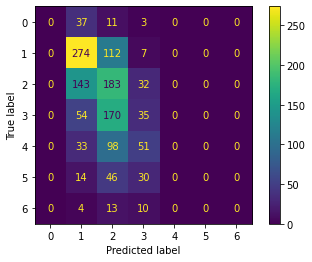

In [278]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S frekvenciou slov

In [279]:
svc_model = SVC()
svc_model.fit(X_train_combined_svc, y_train)

SVC()

In [280]:
y_pred_train = svc_model.predict(X_train_combined_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6462799495586381
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.59      0.57      0.58       611
           4       0.73      0.48      0.58       380
           5       0.95      0.38      0.54       213
           6       1.00      0.07      0.13        44

    accuracy                           0.65      3172
   macro avg       0.79      0.45      0.47      3172
weighted avg       0.69      0.65      0.62      3172



In [281]:
y_pred = svc_model.predict(X_test_combined_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.66      0.63       393
           2       0.35      0.52      0.42       358
           3       0.29      0.32      0.30       259
           4       0.36      0.19      0.25       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [283]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


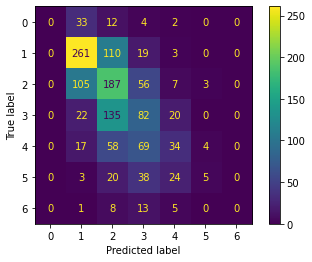

In [284]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S tfidf frekvenciou slov

In [285]:
svc_model = SVC()
svc_model.fit(X_train_combined2_svc, y_train)

SVC()

In [286]:
y_pred_train = svc_model.predict(X_train_combined2_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4003783102143758
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.54      0.69      0.61       916
           2       0.34      0.61      0.43       867
           3       0.25      0.17      0.21       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.40      3172
   macro avg       0.16      0.21      0.18      3172
weighted avg       0.30      0.40      0.33      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [287]:
y_pred = svc_model.predict(X_test_combined2_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.69      0.59       393
           2       0.31      0.56      0.39       358
           3       0.22      0.15      0.18       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.15      0.20      0.17      1360
weighted avg       0.27      0.38      0.31      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [289]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.20
Precision: 0.15
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


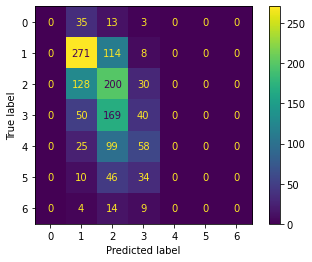

In [290]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov

In [291]:
svc_model = SVC()
svc_model.fit(X_train_out_svc, y_train)

SVC()

In [292]:
y_pred_train = svc_model.predict(X_train_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.61      0.74      0.67       916
           2       0.45      0.61      0.52       867
           3       0.36      0.47      0.41       611
           4       0.50      0.13      0.21       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.49      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.43      0.49      0.44      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
y_pred = svc_model.predict(X_test_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.63      0.76      0.69       393
           2       0.45      0.58      0.51       358
           3       0.33      0.48      0.39       259
           4       0.63      0.17      0.27       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.49      1360
   macro avg       0.29      0.29      0.27      1360
weighted avg       0.45      0.49      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [295]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.29
Precision: 0.29
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


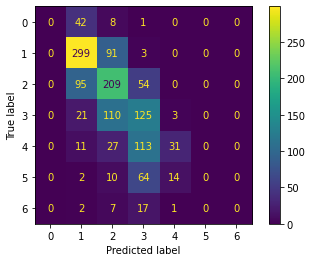

In [296]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a  frekvenciou slov

In [297]:
svc_model = SVC()
svc_model.fit(X_train_combined_out_svc, y_train)

SVC()

In [298]:
y_pred_train = svc_model.predict(X_train_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.59      0.58      0.58       611
           4       0.73      0.48      0.58       380
           5       0.95      0.38      0.54       213
           6       1.00      0.07      0.13        44

    accuracy                           0.65      3172
   macro avg       0.79      0.45      0.47      3172
weighted avg       0.69      0.65      0.62      3172



In [299]:
y_pred = svc_model.predict(X_test_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.66      0.62       393
           2       0.35      0.52      0.42       358
           3       0.29      0.31      0.30       259
           4       0.36      0.19      0.25       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [301]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


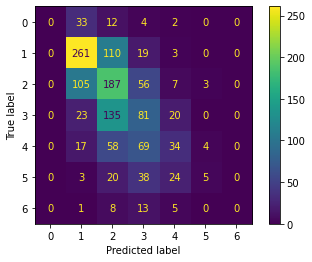

In [302]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf  frekvenciou slov

In [303]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out_svc, y_train)

SVC()

In [304]:
y_pred_train = svc_model.predict(X_train_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.64      0.75      0.69       916
           2       0.46      0.63      0.53       867
           3       0.35      0.50      0.41       611
           4       0.47      0.05      0.09       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.49      3172
   macro avg       0.27      0.28      0.25      3172
weighted avg       0.43      0.49      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
y_pred = svc_model.predict(X_test_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.65      0.76      0.70       393
           2       0.45      0.61      0.52       358
           3       0.31      0.47      0.37       259
           4       0.61      0.06      0.11       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.48      1360
   macro avg       0.29      0.27      0.24      1360
weighted avg       0.45      0.48      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [307]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.27
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


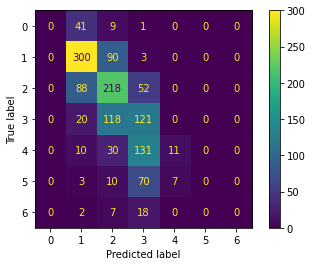

In [308]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním

In [309]:
svc_model = SVC()
svc_model.fit(X_train_scaled_svc, y_train)

SVC()

In [310]:
y_pred_train = svc_model.predict(X_train_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4287515762925599
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.54      0.67      0.60       916
           2       0.37      0.59      0.46       867
           3       0.32      0.26      0.29       611
           4       0.41      0.19      0.26       380
           5       0.89      0.04      0.07       213
           6       0.00      0.00      0.00        44

    accuracy                           0.43      3172
   macro avg       0.36      0.25      0.24      3172
weighted avg       0.43      0.43      0.39      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [311]:
y_pred = svc_model.predict(X_test_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39705882352941174
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.68      0.60       393
           2       0.33      0.53      0.41       358
           3       0.25      0.21      0.23       259
           4       0.38      0.16      0.22       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.34      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [313]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.21
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


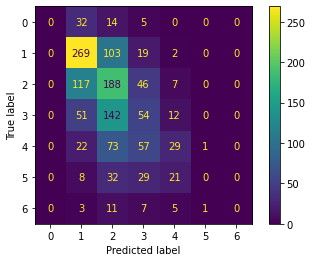

In [314]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a  frekvenciou slov

In [315]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled_svc, y_train)

SVC()

In [316]:
y_pred_train = svc_model.predict(X_train_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6456494325346784
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.58      0.57      0.58       611
           4       0.73      0.48      0.58       380
           5       0.94      0.38      0.54       213
           6       1.00      0.07      0.13        44

    accuracy                           0.65      3172
   macro avg       0.79      0.45      0.47      3172
weighted avg       0.68      0.65      0.62      3172



In [317]:
y_pred = svc_model.predict(X_test_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41691176470588237
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.67      0.63       393
           2       0.35      0.52      0.42       358
           3       0.29      0.32      0.30       259
           4       0.35      0.18      0.24       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [319]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


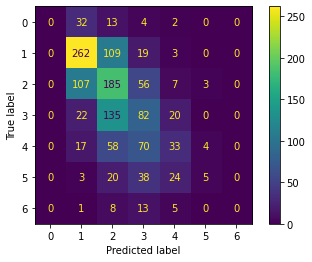

In [320]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf  frekvenciou slov

In [321]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled_svc, y_train)

SVC()

In [322]:
y_pred_train = svc_model.predict(X_train_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6409205548549811
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       141
           1       0.73      0.82      0.78       916
           2       0.60      0.76      0.67       867
           3       0.57      0.63      0.60       611
           4       0.61      0.48      0.54       380
           5       0.78      0.21      0.33       213
           6       0.00      0.00      0.00        44

    accuracy                           0.64      3172
   macro avg       0.61      0.42      0.42      3172
weighted avg       0.65      0.64      0.61      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [323]:
y_pred = svc_model.predict(X_test_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.45441176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.62      0.69      0.65       393
           2       0.40      0.55      0.46       358
           3       0.32      0.36      0.34       259
           4       0.40      0.27      0.32       182
           5       0.50      0.07      0.12        90
           6       0.00      0.00      0.00        27

    accuracy                           0.45      1360
   macro avg       0.32      0.28      0.27      1360
weighted avg       0.43      0.45      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [324]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [325]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.45
Recall: 0.28
Precision: 0.32
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


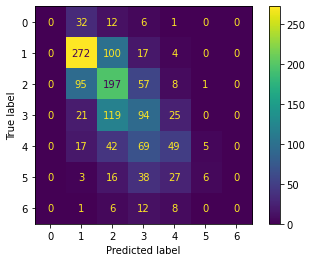

In [326]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním

In [327]:
svc_model = SVC()
svc_model.fit(X_train_scal_out_svc, y_train)

SVC()

In [328]:
y_pred_train = svc_model.predict(X_train_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.48581336696090793
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.61      0.74      0.67       916
           2       0.45      0.61      0.52       867
           3       0.36      0.47      0.41       611
           4       0.50      0.13      0.21       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.49      3172
   macro avg       0.27      0.28      0.26      3172
weighted avg       0.43      0.49      0.44      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
y_pred = svc_model.predict(X_test_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.48823529411764705
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.63      0.76      0.69       393
           2       0.45      0.58      0.51       358
           3       0.33      0.48      0.39       259
           4       0.63      0.17      0.27       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.49      1360
   macro avg       0.29      0.29      0.27      1360
weighted avg       0.45      0.49      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [330]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [331]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.29
Precision: 0.29
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


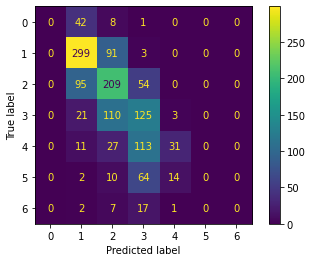

In [332]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s  frekvenciou slov

In [333]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out_svc, y_train)

SVC()

In [334]:
y_pred_train = svc_model.predict(X_train_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6469104665825978
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.59      0.58      0.58       611
           4       0.73      0.48      0.58       380
           5       0.95      0.38      0.54       213
           6       1.00      0.07      0.13        44

    accuracy                           0.65      3172
   macro avg       0.79      0.45      0.47      3172
weighted avg       0.69      0.65      0.62      3172



In [335]:
y_pred = svc_model.predict(X_test_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.66      0.62       393
           2       0.35      0.52      0.42       358
           3       0.29      0.31      0.30       259
           4       0.36      0.19      0.25       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [336]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [337]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.25
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


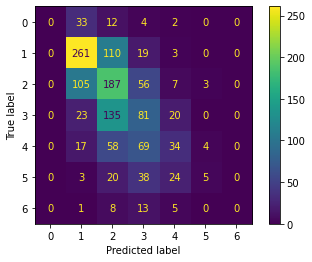

In [338]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf  frekvenciou slov

In [339]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out_svc, y_train)

SVC()

In [340]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.49085750315258514
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.64      0.75      0.69       916
           2       0.46      0.63      0.53       867
           3       0.35      0.50      0.41       611
           4       0.47      0.05      0.09       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.49      3172
   macro avg       0.27      0.28      0.25      3172
weighted avg       0.43      0.49      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [341]:
y_pred = svc_model.predict(X_test_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.47794117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.65      0.76      0.70       393
           2       0.45      0.61      0.52       358
           3       0.31      0.47      0.37       259
           4       0.61      0.06      0.11       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.48      1360
   macro avg       0.29      0.27      0.24      1360
weighted avg       0.45      0.48      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [342]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [343]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.27
Precision: 0.29
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


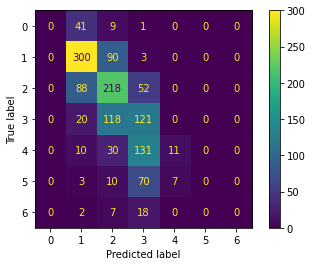

In [344]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [345]:
results_svc2 = pd.DataFrame(results_list2_svc)
print(results_svc2)

    accuracy_train  accuracy_test
0         0.380517       0.361765
1         0.646280       0.418382
2         0.400378       0.375735
3         0.485813       0.488235
4         0.646910       0.417647
5         0.490858       0.477941
6         0.428752       0.397059
7         0.645649       0.416912
8         0.640921       0.454412
9         0.485813       0.488235
10        0.646910       0.417647
11        0.490858       0.477941


Podľa výsledkov po druhom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a s ošetrenými outliermi so skalovanim. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým textom sa accuracy mierne zvýšilo. 

RANDOM FOREST - Bez ošetrenia outlierov a bez skalovania

In [346]:
results_list2_rf=[]

Trenovanie modelu

In [347]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [348]:
y_pred_train = rf_model.predict(X_train_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [349]:
y_pred = rf_model.predict(X_test_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38823529411764707
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.65      0.58       393
           2       0.34      0.42      0.38       358
           3       0.27      0.29      0.28       259
           4       0.34      0.21      0.26       182
           5       0.20      0.10      0.13        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.24      0.24      0.23      1360
weighted avg       0.35      0.39      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [350]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [351]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.24
Precision: 0.24
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

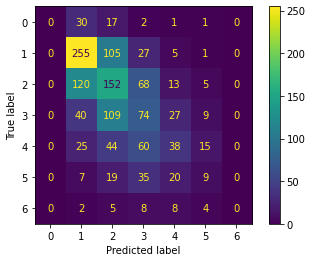

In [352]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S  frekvenciou slov

In [353]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_rf, y_train)

RandomForestClassifier()

In [354]:
y_pred_train = rf_model.predict(X_train_combined_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [355]:
y_pred = rf_model.predict(X_test_combined_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.72      0.62       393
           2       0.33      0.49      0.40       358
           3       0.29      0.25      0.27       259
           4       0.36      0.16      0.23       182
           5       0.33      0.03      0.06        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.22      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [357]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


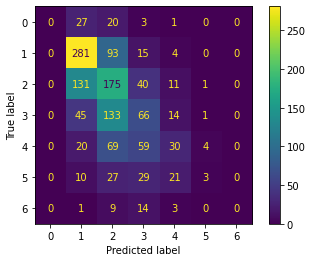

In [358]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S tfidf  frekvenciou slov

In [359]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_rf, y_train)

RandomForestClassifier()

In [360]:
y_pred_train = rf_model.predict(X_train_combined2_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [361]:
y_pred = rf_model.predict(X_test_combined2_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.72      0.62       393
           2       0.33      0.49      0.40       358
           3       0.30      0.24      0.26       259
           4       0.33      0.16      0.21       182
           5       0.45      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.28      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [362]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [363]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.28
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


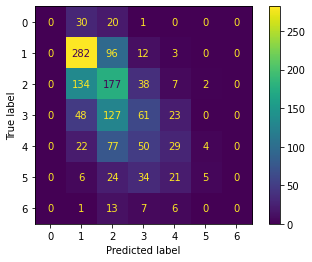

In [364]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov

In [365]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out_rf, y_train)

RandomForestClassifier()

In [366]:
y_pred_train = rf_model.predict(X_train_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [367]:
y_pred = rf_model.predict(X_test_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7198529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        51
           1       0.80      0.87      0.83       393
           2       0.69      0.81      0.74       358
           3       0.68      0.71      0.69       259
           4       0.67      0.61      0.64       182
           5       0.64      0.41      0.50        90
           6       1.00      0.04      0.07        27

    accuracy                           0.72      1360
   macro avg       0.78      0.53      0.56      1360
weighted avg       0.73      0.72      0.71      1360



In [368]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [369]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.72
Recall: 0.53
Precision: 0.78
F1 Score: 0.56


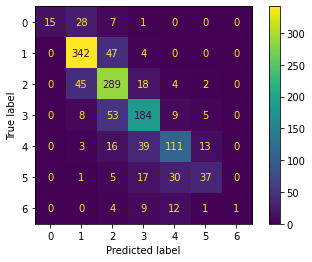

In [370]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a  frekvenciou slov

In [371]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out_rf, y_train)

RandomForestClassifier()

In [372]:
y_pred_train = rf_model.predict(X_train_combined_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [373]:
y_pred = rf_model.predict(X_test_combined_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5676470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.70      0.84      0.77       393
           2       0.52      0.72      0.60       358
           3       0.47      0.49      0.48       259
           4       0.50      0.29      0.36       182
           5       0.33      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.57      1360
   macro avg       0.36      0.34      0.33      1360
weighted avg       0.52      0.57      0.53      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [375]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.57
Recall: 0.34
Precision: 0.36
F1 Score: 0.33


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


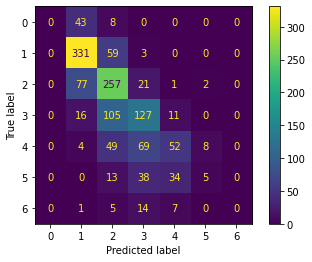

In [376]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf  frekvenciou slov

In [377]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out_rf, y_train)

RandomForestClassifier()

In [378]:
y_pred_train = rf_model.predict(X_train_combined2_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [379]:
y_pred = rf_model.predict(X_test_combined2_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5477941176470589
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.69      0.84      0.76       393
           2       0.48      0.70      0.57       358
           3       0.40      0.36      0.38       259
           4       0.55      0.36      0.43       182
           5       0.44      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.55      1360
   macro avg       0.37      0.33      0.32      1360
weighted avg       0.51      0.55      0.51      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [380]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [381]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.55
Recall: 0.33
Precision: 0.37
F1 Score: 0.32


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


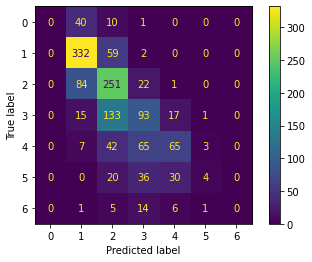

In [382]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním

In [383]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_rf, y_train)

RandomForestClassifier()

In [384]:
y_pred_train = rf_model.predict(X_train_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [385]:
y_pred = rf_model.predict(X_test_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3860294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.64      0.57       393
           2       0.34      0.44      0.38       358
           3       0.28      0.27      0.27       259
           4       0.33      0.21      0.26       182
           5       0.17      0.06      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.35      0.39      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [386]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [387]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.23
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


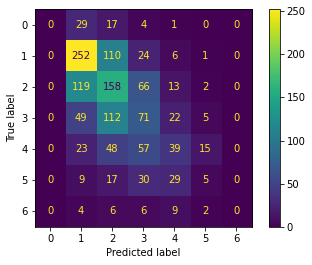

In [388]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a  frekvenciou slov

In [389]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled_rf, y_train)

RandomForestClassifier()

In [390]:
y_pred_train = rf_model.predict(X_train_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [391]:
y_pred = rf_model.predict(X_test_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40441176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.69      0.61       393
           2       0.35      0.52      0.42       358
           3       0.28      0.25      0.27       259
           4       0.29      0.13      0.18       182
           5       0.33      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [392]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [393]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.26
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


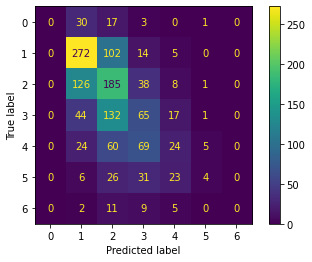

In [394]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf  frekvenciou slov

In [395]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled_rf, y_train)

RandomForestClassifier()

In [396]:
y_pred_train = rf_model.predict(X_train_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [397]:
y_pred = rf_model.predict(X_test_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40294117647058825
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.70      0.60       393
           2       0.33      0.49      0.40       358
           3       0.30      0.24      0.27       259
           4       0.34      0.16      0.22       182
           5       0.27      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.25      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [398]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [399]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.25
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


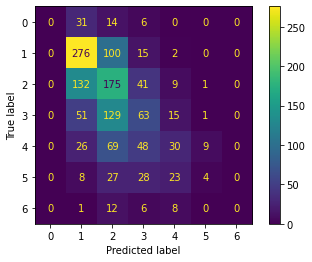

In [400]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním

In [401]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out_rf, y_train)

RandomForestClassifier()

In [402]:
y_pred_train = rf_model.predict(X_train_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [403]:
y_pred = rf_model.predict(X_test_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7316176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        51
           1       0.82      0.90      0.86       393
           2       0.70      0.83      0.76       358
           3       0.69      0.69      0.69       259
           4       0.66      0.64      0.65       182
           5       0.60      0.38      0.46        90
           6       0.00      0.00      0.00        27

    accuracy                           0.73      1360
   macro avg       0.64      0.53      0.55      1360
weighted avg       0.72      0.73      0.71      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [404]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [405]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.73
Recall: 0.53
Precision: 0.64
F1 Score: 0.55


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


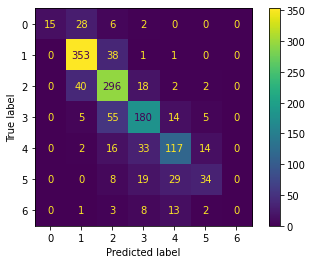

In [406]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s  frekvenciou slov

In [407]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out_rf, y_train)

RandomForestClassifier()

In [408]:
y_pred_train = rf_model.predict(X_train_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [409]:
y_pred = rf_model.predict(X_test_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5617647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      0.86      0.79       393
           2       0.50      0.72      0.59       358
           3       0.42      0.42      0.42       259
           4       0.47      0.29      0.36       182
           5       0.50      0.08      0.13        90
           6       0.00      0.00      0.00        27

    accuracy                           0.56      1360
   macro avg       0.37      0.34      0.33      1360
weighted avg       0.52      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [410]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [411]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.56
Recall: 0.34
Precision: 0.37
F1 Score: 0.33


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


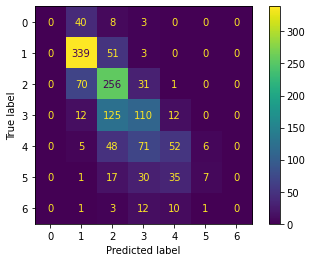

In [412]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf-frekvenciou slov

In [413]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out_rf, y_train)

RandomForestClassifier()

In [414]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [415]:
y_pred = rf_model.predict(X_test_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5588235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.70      0.88      0.78       393
           2       0.49      0.69      0.57       358
           3       0.42      0.39      0.41       259
           4       0.53      0.31      0.39       182
           5       0.80      0.09      0.16        90
           6       0.00      0.00      0.00        27

    accuracy                           0.56      1360
   macro avg       0.42      0.34      0.33      1360
weighted avg       0.53      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [416]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [417]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.56
Recall: 0.34
Precision: 0.42
F1 Score: 0.33


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


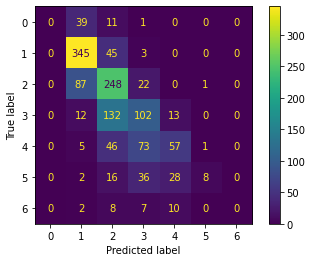

In [418]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [419]:
results_rf2 = pd.DataFrame(results_list2_rf)
print(results_rf2)

    accuracy_train  accuracy_test
0              1.0       0.388235
1              1.0       0.408088
2              1.0       0.407353
3              1.0       0.719853
4              1.0       0.567647
5              1.0       0.547794
6              1.0       0.386029
7              1.0       0.404412
8              1.0       0.402941
9              1.0       0.731618
10             1.0       0.561765
11             1.0       0.558824


Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi so skalovanim. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy moc nezmenilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný. 

GRADIENT BOOSTING MASHINE - Bez ošetrenia outlierov a bez skalovania

In [420]:
results_list2_gbm=[]

Trenovanie modelu

In [421]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_gbm, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [422]:
y_pred_train = gbm_model.predict(X_train_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7080706179066835
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74       141
           1       0.69      0.80      0.74       916
           2       0.63      0.74      0.68       867
           3       0.71      0.65      0.68       611
           4       0.82      0.58      0.68       380
           5       0.95      0.61      0.74       213
           6       1.00      0.91      0.95        44

    accuracy                           0.71      3172
   macro avg       0.83      0.70      0.75      3172
weighted avg       0.73      0.71      0.71      3172



Predikovanie na testovacich datach

In [423]:
y_pred = gbm_model.predict(X_test_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3816176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.19      0.06      0.09        51
           1       0.52      0.63      0.57       393
           2       0.34      0.44      0.39       358
           3       0.27      0.27      0.27       259
           4       0.34      0.19      0.24       182
           5       0.16      0.08      0.11        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.26      0.24      0.24      1360
weighted avg       0.36      0.38      0.36      1360



In [424]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

Zobrazenie metrik

In [425]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.24
Precision: 0.26
F1 Score: 0.24


Vizualizácia výkonnosti modelu

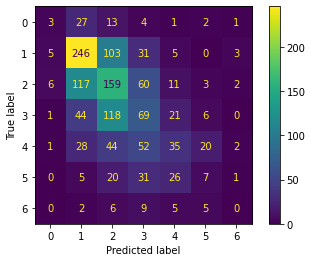

In [426]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S  frekvenciou slov

In [427]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_gbm, y_train)

GradientBoostingClassifier()

In [428]:
y_pred_train = gbm_model.predict(X_train_combined_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8761034047919294
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.89       141
           1       0.87      0.95      0.91       916
           2       0.81      0.91      0.85       867
           3       0.89      0.83      0.86       611
           4       0.96      0.77      0.85       380
           5       0.99      0.81      0.89       213
           6       1.00      0.98      0.99        44

    accuracy                           0.88      3172
   macro avg       0.93      0.86      0.89      3172
weighted avg       0.88      0.88      0.88      3172



In [429]:
y_pred = gbm_model.predict(X_test_combined_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4213235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.31      0.10      0.15        51
           1       0.61      0.69      0.65       393
           2       0.35      0.49      0.41       358
           3       0.31      0.27      0.29       259
           4       0.35      0.23      0.27       182
           5       0.24      0.10      0.14        90
           6       0.05      0.04      0.04        27

    accuracy                           0.42      1360
   macro avg       0.32      0.27      0.28      1360
weighted avg       0.40      0.42      0.40      1360



In [430]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [431]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.32
F1 Score: 0.28


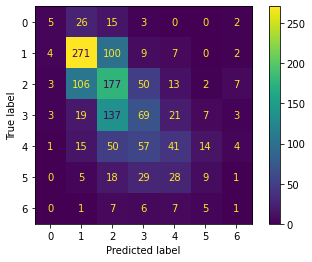

In [432]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S tfidf  frekvenciou slov

In [433]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_gbm, y_train)

GradientBoostingClassifier()

In [434]:
y_pred_train = gbm_model.predict(X_train_combined2_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9120428751576293
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       141
           1       0.90      0.97      0.93       916
           2       0.88      0.93      0.90       867
           3       0.92      0.89      0.91       611
           4       0.97      0.83      0.89       380
           5       0.98      0.85      0.91       213
           6       1.00      1.00      1.00        44

    accuracy                           0.91      3172
   macro avg       0.95      0.89      0.92      3172
weighted avg       0.92      0.91      0.91      3172



In [435]:
y_pred = gbm_model.predict(X_test_combined2_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.06      0.02      0.03        51
           1       0.59      0.70      0.64       393
           2       0.38      0.50      0.43       358
           3       0.31      0.27      0.29       259
           4       0.36      0.24      0.29       182
           5       0.15      0.07      0.09        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.27      0.26      0.25      1360
weighted avg       0.39      0.42      0.40      1360



In [436]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [437]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.26
Precision: 0.27
F1 Score: 0.25


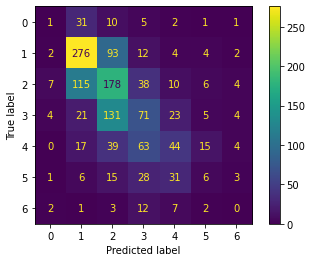

In [438]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov

In [439]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out_gbm, y_train)

GradientBoostingClassifier()

In [440]:
y_pred_train = gbm_model.predict(X_train_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9590163934426229
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       141
           1       0.96      0.98      0.97       916
           2       0.92      0.96      0.94       867
           3       0.97      0.95      0.96       611
           4       0.99      0.94      0.96       380
           5       1.00      0.96      0.98       213
           6       1.00      0.98      0.99        44

    accuracy                           0.96      3172
   macro avg       0.98      0.96      0.97      3172
weighted avg       0.96      0.96      0.96      3172



In [441]:
y_pred = gbm_model.predict(X_test_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8441176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82        51
           1       0.89      0.93      0.91       393
           2       0.82      0.85      0.84       358
           3       0.80      0.83      0.82       259
           4       0.83      0.82      0.83       182
           5       0.82      0.77      0.79        90
           6       0.70      0.26      0.38        27

    accuracy                           0.84      1360
   macro avg       0.83      0.74      0.77      1360
weighted avg       0.84      0.84      0.84      1360



In [442]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [443]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.84
Recall: 0.74
Precision: 0.83
F1 Score: 0.77


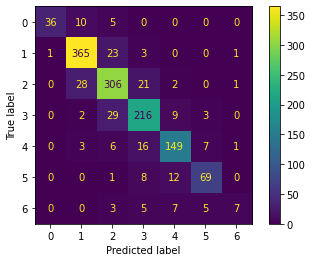

In [444]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov a  frekvenciou slov

In [445]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out_gbm, y_train)

GradientBoostingClassifier()

In [446]:
y_pred_train = gbm_model.predict(X_train_combined_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9854981084489282
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       141
           1       0.98      1.00      0.99       916
           2       0.97      0.99      0.98       867
           3       0.99      0.98      0.98       611
           4       1.00      0.97      0.98       380
           5       1.00      0.97      0.98       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [447]:
y_pred = gbm_model.predict(X_test_combined_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8279411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78        51
           1       0.88      0.93      0.91       393
           2       0.80      0.85      0.83       358
           3       0.81      0.81      0.81       259
           4       0.82      0.79      0.80       182
           5       0.75      0.68      0.71        90
           6       0.36      0.15      0.21        27

    accuracy                           0.83      1360
   macro avg       0.77      0.70      0.72      1360
weighted avg       0.82      0.83      0.82      1360



In [448]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [449]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.70
Precision: 0.77
F1 Score: 0.72


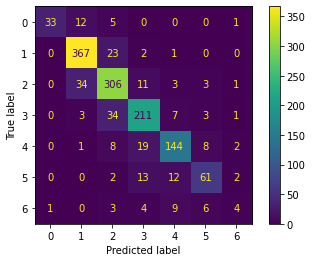

In [450]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrenim outlierov a tfidf  frekvenciou slov

In [451]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out_gbm, y_train)

GradientBoostingClassifier()

In [452]:
y_pred_train = gbm_model.predict(X_train_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9911727616645649
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       141
           1       0.99      1.00      1.00       916
           2       0.98      1.00      0.99       867
           3       0.99      0.99      0.99       611
           4       1.00      0.97      0.98       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [453]:
y_pred = gbm_model.predict(X_test_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8147058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.57      0.70        51
           1       0.87      0.94      0.90       393
           2       0.81      0.85      0.83       358
           3       0.80      0.80      0.80       259
           4       0.77      0.80      0.78       182
           5       0.77      0.61      0.68        90
           6       0.08      0.04      0.05        27

    accuracy                           0.81      1360
   macro avg       0.72      0.66      0.68      1360
weighted avg       0.81      0.81      0.81      1360



In [454]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [455]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.66
Precision: 0.72
F1 Score: 0.68


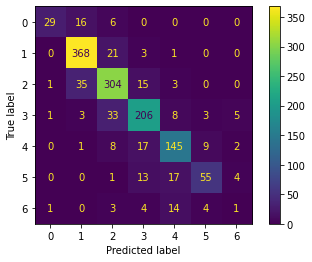

In [456]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - So škálovaním

In [457]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled_gbm, y_train)

GradientBoostingClassifier()

In [458]:
y_pred_train = gbm_model.predict(X_train_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6967213114754098
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64       141
           1       0.69      0.80      0.74       916
           2       0.61      0.73      0.66       867
           3       0.70      0.66      0.68       611
           4       0.82      0.56      0.66       380
           5       0.93      0.57      0.71       213
           6       1.00      0.98      0.99        44

    accuracy                           0.70      3172
   macro avg       0.82      0.68      0.73      3172
weighted avg       0.72      0.70      0.70      3172



In [459]:
y_pred = gbm_model.predict(X_test_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3845588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.19      0.06      0.09        51
           1       0.52      0.63      0.57       393
           2       0.36      0.45      0.40       358
           3       0.27      0.25      0.26       259
           4       0.32      0.21      0.25       182
           5       0.14      0.07      0.09        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.26      0.24      0.24      1360
weighted avg       0.35      0.38      0.36      1360



In [460]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [461]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.38
Recall: 0.24
Precision: 0.26
F1 Score: 0.24


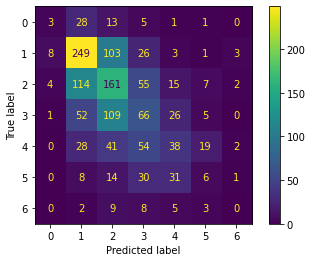

In [462]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - So škálovaním a  frekvenciou slov

In [463]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled_gbm, y_train)

GradientBoostingClassifier()

In [464]:
y_pred_train = gbm_model.predict(X_train_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8723203026481715
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86       141
           1       0.86      0.94      0.90       916
           2       0.81      0.91      0.86       867
           3       0.88      0.83      0.86       611
           4       0.96      0.77      0.85       380
           5       0.98      0.78      0.87       213
           6       1.00      0.98      0.99        44

    accuracy                           0.87      3172
   macro avg       0.93      0.85      0.88      3172
weighted avg       0.88      0.87      0.87      3172



In [465]:
y_pred = gbm_model.predict(X_test_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.41      0.14      0.21        51
           1       0.61      0.69      0.65       393
           2       0.37      0.51      0.43       358
           3       0.30      0.25      0.27       259
           4       0.33      0.23      0.27       182
           5       0.32      0.11      0.17        90
           6       0.05      0.04      0.04        27

    accuracy                           0.43      1360
   macro avg       0.34      0.28      0.29      1360
weighted avg       0.41      0.43      0.41      1360



In [466]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [467]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.28
Precision: 0.34
F1 Score: 0.29


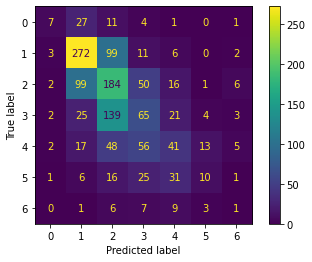

In [468]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

So škálovaním a tfidf  frekvenciou slov

In [469]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled_gbm, y_train)

GradientBoostingClassifier()

In [470]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9098360655737705
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       141
           1       0.90      0.97      0.93       916
           2       0.87      0.93      0.90       867
           3       0.92      0.89      0.91       611
           4       0.95      0.82      0.88       380
           5       0.98      0.84      0.90       213
           6       1.00      1.00      1.00        44

    accuracy                           0.91      3172
   macro avg       0.95      0.89      0.91      3172
weighted avg       0.91      0.91      0.91      3172



In [471]:
y_pred = gbm_model.predict(X_test_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4213235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.06      0.08        51
           1       0.59      0.72      0.65       393
           2       0.37      0.47      0.42       358
           3       0.31      0.26      0.28       259
           4       0.32      0.22      0.26       182
           5       0.21      0.11      0.15        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.39      0.42      0.40      1360



In [472]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [473]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


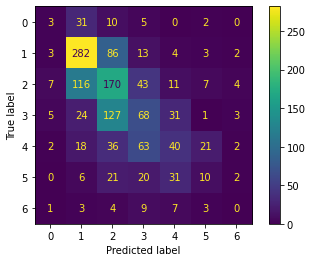

In [474]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním

In [475]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [476]:
y_pred_train = gbm_model.predict(X_train_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.957124842370744
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       141
           1       0.96      0.97      0.97       916
           2       0.92      0.96      0.94       867
           3       0.96      0.94      0.95       611
           4       0.98      0.93      0.95       380
           5       1.00      0.95      0.97       213
           6       1.00      1.00      1.00        44

    accuracy                           0.96      3172
   macro avg       0.97      0.96      0.96      3172
weighted avg       0.96      0.96      0.96      3172



In [477]:
y_pred = gbm_model.predict(X_test_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.850735294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73        51
           1       0.89      0.94      0.91       393
           2       0.82      0.87      0.85       358
           3       0.82      0.84      0.83       259
           4       0.85      0.82      0.83       182
           5       0.82      0.77      0.79        90
           6       0.90      0.33      0.49        27

    accuracy                           0.85      1360
   macro avg       0.86      0.74      0.78      1360
weighted avg       0.85      0.85      0.85      1360



In [478]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [479]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.85
Recall: 0.74
Precision: 0.86
F1 Score: 0.78


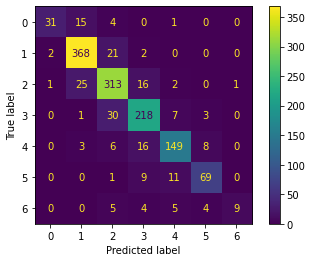

In [480]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním a  frekvenciou slov

In [481]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [482]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9854981084489282
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       141
           1       0.98      1.00      0.99       916
           2       0.97      0.99      0.98       867
           3       0.99      0.98      0.98       611
           4       1.00      0.97      0.98       380
           5       1.00      0.97      0.98       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [483]:
y_pred = gbm_model.predict(X_test_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8272058823529411
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77        51
           1       0.88      0.93      0.91       393
           2       0.80      0.85      0.82       358
           3       0.80      0.82      0.81       259
           4       0.83      0.79      0.81       182
           5       0.78      0.70      0.74        90
           6       0.27      0.11      0.16        27

    accuracy                           0.83      1360
   macro avg       0.76      0.69      0.72      1360
weighted avg       0.82      0.83      0.82      1360



In [484]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [485]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.69
Precision: 0.76
F1 Score: 0.72


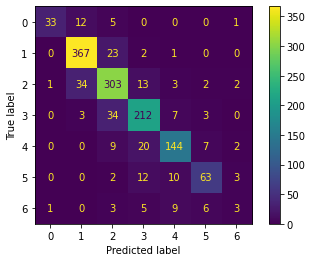

In [486]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING MASHINE - S ošetrením outlierov a so škálovaním a tfidf  frekvenciou slov

In [487]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [488]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9921185372005045
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       141
           1       0.99      1.00      1.00       916
           2       0.98      1.00      0.99       867
           3       1.00      0.99      0.99       611
           4       1.00      0.97      0.99       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [489]:
y_pred = gbm_model.predict(X_test_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8154411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.55      0.69        51
           1       0.87      0.93      0.90       393
           2       0.80      0.86      0.83       358
           3       0.82      0.80      0.81       259
           4       0.79      0.79      0.79       182
           5       0.73      0.59      0.65        90
           6       0.07      0.04      0.05        27

    accuracy                           0.82      1360
   macro avg       0.72      0.65      0.67      1360
weighted avg       0.81      0.82      0.81      1360



In [490]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [491]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.65
Precision: 0.72
F1 Score: 0.67


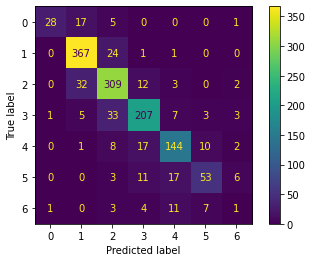

In [492]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [493]:
results_gbm2 = pd.DataFrame(results_list2_gbm)
print(results_gbm2)

    accuracy_train  accuracy_test
0         0.708071       0.381618
1         0.876103       0.421324
2         0.912043       0.423529
3         0.959016       0.844118
4         0.985498       0.827941
5         0.991173       0.814706
6         0.696721       0.384559
7         0.872320       0.426471
8         0.909836       0.421324
9         0.957125       0.850735
10        0.985498       0.827206
11        0.992119       0.815441


Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a skalovaním.Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy mierne zmenšilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný. 

HYPERPARAMETRE

Teraz vykonáme testovanie 3, pričom použijeme datasety s výberom črt. Preddefinujeme si hyperparametre, ktoré bude gridsearch skúšať a bude hľadať tú najlepšiu kombináciu aby dosiahol čím najvýšie accuracy. Potom s týmito parametrami si spustíme predikciu na trenovacej aj testovacej sade. 

SVC - bez osetrenia outlierov a skalovania

In [494]:
results_list3_svc=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [495]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0, 1.5],
}

Grid search - vyskúša každú kombináciu hyperparametrov a vypíše tu najlepšiu pre accuracy

In [496]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 10, 'coef0': 0.5, 'gamma': 'auto', 'kernel': 'poly'}
Najlepšie skóre: 0.3984823269331081


Predikovanie na trenovacich datach

In [497]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_svc)

In [498]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.43883984867591425
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.56      0.68      0.62       916
           2       0.37      0.59      0.46       867
           3       0.35      0.30      0.32       611
           4       0.44      0.17      0.24       380
           5       0.54      0.07      0.12       213
           6       0.00      0.00      0.00        44

    accuracy                           0.44      3172
   macro avg       0.32      0.26      0.25      3172
weighted avg       0.42      0.44      0.40      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [499]:
y_pred = best_model.predict(X_test_svc)

In [500]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [501]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3875
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.69      0.61       393
           2       0.33      0.50      0.40       358
           3       0.24      0.21      0.23       259
           4       0.25      0.10      0.15       182
           5       0.08      0.01      0.02        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.21      0.22      0.20      1360
weighted avg       0.33      0.39      0.35      1360



Vizualizácia výkonnosti modelu

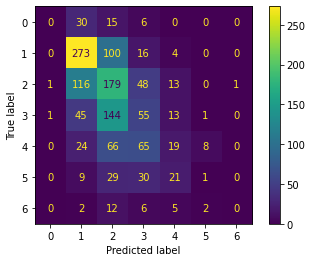

In [502]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a frekvenciou slov

In [503]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=10, coef0=0.5, gamma='auto', kernel='poly')

In [504]:
y_pred_train = model.predict(X_train_combined_svc)

In [505]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [506]:
y_pred = model.predict(X_test_combined_svc)

In [507]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [508]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37720588235294117
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.12      0.14      0.13        51
           1       0.54      0.61      0.57       393
           2       0.38      0.39      0.39       358
           3       0.32      0.29      0.31       259
           4       0.27      0.19      0.22       182
           5       0.14      0.17      0.15        90
           6       0.11      0.11      0.11        27

    accuracy                           0.38      1360
   macro avg       0.27      0.27      0.27      1360
weighted avg       0.37      0.38      0.37      1360



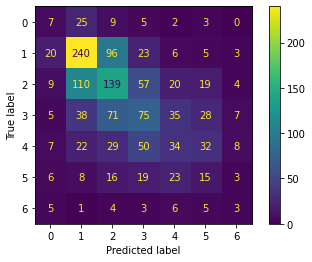

In [509]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf frekvenciou slov

In [510]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=10, coef0=0.5, gamma='auto', kernel='poly')

In [511]:
y_pred_train = model.predict(X_train_combined2_svc)

In [512]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.38524590163934425
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.50      0.72      0.59       916
           2       0.31      0.59      0.41       867
           3       0.24      0.08      0.12       611
           4       0.00      0.00      0.00       380
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.00        44

    accuracy                           0.39      3172
   macro avg       0.15      0.20      0.16      3172
weighted avg       0.28      0.39      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [513]:
y_pred = model.predict(X_test_combined2_svc)

In [514]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [515]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.36911764705882355
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.50      0.72      0.59       393
           2       0.29      0.57      0.38       358
           3       0.17      0.06      0.09       259
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.37      1360
   macro avg       0.14      0.19      0.15      1360
weighted avg       0.25      0.37      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


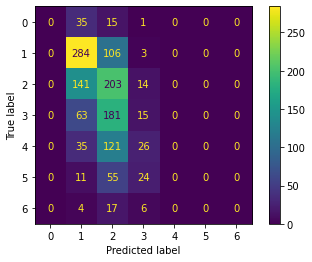

In [516]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov

In [517]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 1.5, 'gamma': 'auto', 'kernel': 'poly'}
Najlepšie skóre: 0.5179522591221838


In [518]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_out_svc)

In [519]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.562421185372005
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       141
           1       0.69      0.80      0.74       916
           2       0.53      0.65      0.58       867
           3       0.43      0.51      0.47       611
           4       0.53      0.28      0.36       380
           5       0.58      0.32      0.41       213
           6       1.00      0.02      0.04        44

    accuracy                           0.56      3172
   macro avg       0.61      0.37      0.37      3172
weighted avg       0.56      0.56      0.54      3172



In [520]:
y_pred = best_model.predict(X_test_out_svc)

In [521]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [522]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.67      0.78      0.72       393
           2       0.48      0.59      0.53       358
           3       0.36      0.45      0.40       259
           4       0.42      0.23      0.30       182
           5       0.31      0.16      0.21        90
           6       0.00      0.00      0.00        27

    accuracy                           0.51      1360
   macro avg       0.32      0.32      0.31      1360
weighted avg       0.47      0.51      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


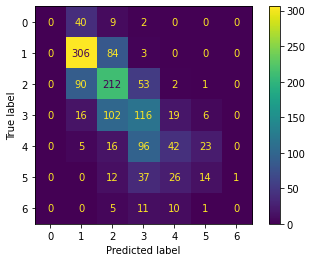

In [523]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a frekvenciou slov

In [524]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, gamma='auto', kernel='poly')

In [525]:
y_pred_train = model.predict(X_train_combined_out_svc)

In [526]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [527]:
y_pred = model.predict(X_test_combined_out_svc)

In [528]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [529]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38823529411764707
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.12      0.11        51
           1       0.55      0.62      0.58       393
           2       0.39      0.41      0.40       358
           3       0.33      0.32      0.33       259
           4       0.27      0.19      0.22       182
           5       0.15      0.17      0.16        90
           6       0.14      0.11      0.12        27

    accuracy                           0.39      1360
   macro avg       0.28      0.28      0.27      1360
weighted avg       0.38      0.39      0.38      1360



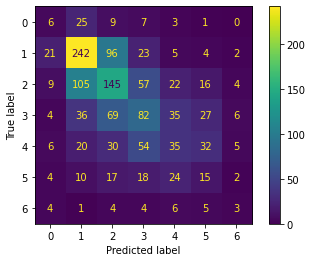

In [530]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a tfidf frekvenciou slov

In [531]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, gamma='auto', kernel='poly')

In [532]:
y_pred_train = model.predict(X_train_combined2_out_svc)

In [533]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6724464060529635
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.12       141
           1       0.74      0.86      0.79       916
           2       0.65      0.73      0.68       867
           3       0.61      0.64      0.62       611
           4       0.65      0.53      0.58       380
           5       0.68      0.52      0.59       213
           6       1.00      0.02      0.04        44

    accuracy                           0.67      3172
   macro avg       0.76      0.48      0.49      3172
weighted avg       0.69      0.67      0.65      3172



In [534]:
y_pred = model.predict(X_test_combined2_out_svc)

In [535]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [536]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.538235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.04        51
           1       0.70      0.81      0.75       393
           2       0.54      0.59      0.56       358
           3       0.41      0.44      0.43       259
           4       0.41      0.34      0.37       182
           5       0.31      0.28      0.29        90
           6       0.00      0.00      0.00        27

    accuracy                           0.54      1360
   macro avg       0.41      0.35      0.35      1360
weighted avg       0.52      0.54      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


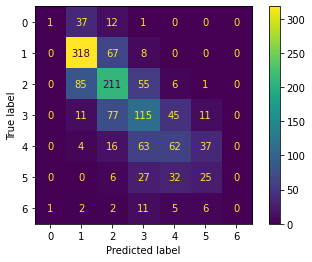

In [537]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim

In [538]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scaled_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 1, 'coef0': 0.0, 'gamma': 'scale', 'kernel': 'rbf'}
Najlepšie skóre: 0.39312054447452743


In [539]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled_svc)

In [540]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4287515762925599
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.54      0.67      0.60       916
           2       0.37      0.59      0.46       867
           3       0.32      0.26      0.29       611
           4       0.41      0.19      0.26       380
           5       0.89      0.04      0.07       213
           6       0.00      0.00      0.00        44

    accuracy                           0.43      3172
   macro avg       0.36      0.25      0.24      3172
weighted avg       0.43      0.43      0.39      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [541]:
y_pred = best_model.predict(X_test_scaled_svc)

In [542]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [543]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39705882352941174
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.68      0.60       393
           2       0.33      0.53      0.41       358
           3       0.25      0.21      0.23       259
           4       0.38      0.16      0.22       182
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.34      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


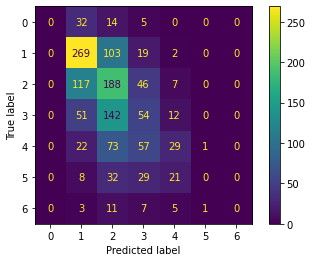

In [544]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a frekvenciou slov

In [545]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=1)

In [546]:
y_pred_train = model.predict(X_train_combined_scaled_svc)

In [547]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6456494325346784
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04       141
           1       0.71      0.83      0.77       916
           2       0.58      0.77      0.66       867
           3       0.58      0.57      0.58       611
           4       0.73      0.48      0.58       380
           5       0.94      0.38      0.54       213
           6       1.00      0.07      0.13        44

    accuracy                           0.65      3172
   macro avg       0.79      0.45      0.47      3172
weighted avg       0.68      0.65      0.62      3172



In [548]:
y_pred = model.predict(X_test_combined_scaled_svc)

In [549]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [550]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.41691176470588237
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.59      0.67      0.63       393
           2       0.35      0.52      0.42       358
           3       0.29      0.32      0.30       259
           4       0.35      0.18      0.24       182
           5       0.42      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.42      1360
   macro avg       0.29      0.25      0.24      1360
weighted avg       0.39      0.42      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


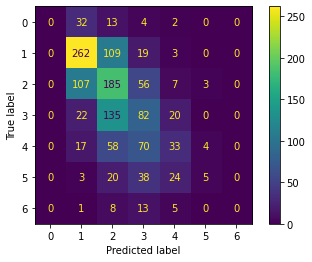

In [551]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf frekvenciou slov

In [552]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=1)

In [553]:
y_pred_train = model.predict(X_train_combined2_scaled_svc)

In [554]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6409205548549811
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       141
           1       0.73      0.82      0.78       916
           2       0.60      0.76      0.67       867
           3       0.57      0.63      0.60       611
           4       0.61      0.48      0.54       380
           5       0.78      0.21      0.33       213
           6       0.00      0.00      0.00        44

    accuracy                           0.64      3172
   macro avg       0.61      0.42      0.42      3172
weighted avg       0.65      0.64      0.61      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [555]:
y_pred = model.predict(X_test_combined2_scaled_svc)

In [556]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [557]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.45441176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.62      0.69      0.65       393
           2       0.40      0.55      0.46       358
           3       0.32      0.36      0.34       259
           4       0.40      0.27      0.32       182
           5       0.50      0.07      0.12        90
           6       0.00      0.00      0.00        27

    accuracy                           0.45      1360
   macro avg       0.32      0.28      0.27      1360
weighted avg       0.43      0.45      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


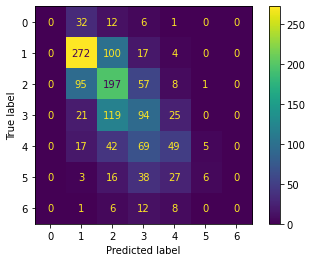

In [558]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim 

In [559]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scal_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 1.5, 'gamma': 'auto', 'kernel': 'poly'}
Najlepšie skóre: 0.5179522591221838


In [560]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scal_out_svc)

In [561]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.562421185372005
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       141
           1       0.69      0.80      0.74       916
           2       0.53      0.65      0.58       867
           3       0.43      0.51      0.47       611
           4       0.53      0.28      0.36       380
           5       0.58      0.32      0.41       213
           6       1.00      0.02      0.04        44

    accuracy                           0.56      3172
   macro avg       0.61      0.37      0.37      3172
weighted avg       0.56      0.56      0.54      3172



In [562]:
y_pred = best_model.predict(X_test_scal_out_svc)

In [563]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [564]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.67      0.78      0.72       393
           2       0.48      0.59      0.53       358
           3       0.36      0.45      0.40       259
           4       0.42      0.23      0.30       182
           5       0.31      0.16      0.21        90
           6       0.00      0.00      0.00        27

    accuracy                           0.51      1360
   macro avg       0.32      0.32      0.31      1360
weighted avg       0.47      0.51      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


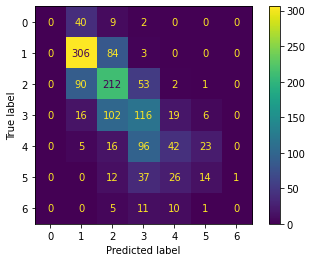

In [565]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a frekvenciou slov

In [566]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, gamma='auto', kernel='poly')

In [567]:
y_pred_train = model.predict(X_train_combined_scal_out_svc)

In [568]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [569]:
y_pred = model.predict(X_test_combined_scal_out_svc)

In [570]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [571]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38823529411764707
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.12      0.11        51
           1       0.55      0.62      0.58       393
           2       0.39      0.41      0.40       358
           3       0.33      0.32      0.33       259
           4       0.27      0.19      0.22       182
           5       0.15      0.17      0.16        90
           6       0.14      0.11      0.12        27

    accuracy                           0.39      1360
   macro avg       0.28      0.28      0.27      1360
weighted avg       0.38      0.39      0.38      1360



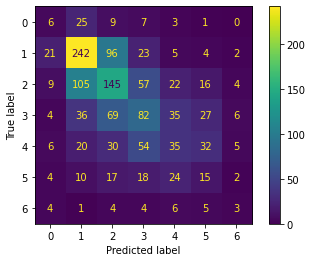

In [572]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf  frekvenciou slov

In [573]:
model = SVC(**grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, gamma='auto', kernel='poly')

In [574]:
y_pred_train = model.predict(X_train_combined2_scal_out_svc)

In [575]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.6724464060529635
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.12       141
           1       0.74      0.86      0.79       916
           2       0.65      0.73      0.68       867
           3       0.61      0.64      0.62       611
           4       0.65      0.53      0.58       380
           5       0.68      0.52      0.59       213
           6       1.00      0.02      0.04        44

    accuracy                           0.67      3172
   macro avg       0.76      0.48      0.49      3172
weighted avg       0.69      0.67      0.65      3172



In [576]:
y_pred = model.predict(X_test_combined2_scal_out_svc)

In [577]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred)
    })

In [578]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.538235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.04        51
           1       0.70      0.81      0.75       393
           2       0.54      0.59      0.56       358
           3       0.41      0.44      0.43       259
           4       0.41      0.34      0.37       182
           5       0.31      0.28      0.29        90
           6       0.00      0.00      0.00        27

    accuracy                           0.54      1360
   macro avg       0.41      0.35      0.35      1360
weighted avg       0.52      0.54      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


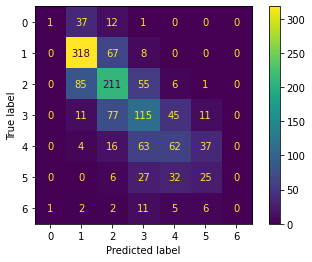

In [579]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

In [580]:
results_svc3 = pd.DataFrame(results_list3_svc)
print(results_svc3)

    best_score  accuracy_train  accuracy_test
0     0.398482        0.438840       0.387500
1          NaN        1.000000       0.377206
2          NaN        0.385246       0.369118
3     0.517952        0.562421       0.507353
4          NaN        1.000000       0.388235
5          NaN        0.672446       0.538235
6     0.393121        0.428752       0.397059
7          NaN        0.645649       0.416912
8          NaN        0.640921       0.454412
9     0.517952        0.562421       0.507353
10         NaN        1.000000       0.388235
11         NaN        0.672446       0.538235


Najlepší výsledok sme dosiahli s datasetom s ošetrenými outliermi a tfidf frekvenciou slov a datasetom s ošetrenými outliermi a škálovaním a tfidf frekvenciou slov. Presnosť sa mierne zvýšila. Najväčší vplyv malo pridanie textovej reprezentácie tfidf frekvencia slov

RANDOM FOREST - bez osetrenia outlierov a skalovania

In [581]:
results_list3_rf=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [582]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - bude skúšať všetky kombinácie hyperparametrov a vyberie tie najlepšie pre accuracy

In [583]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Najlepší skóre: 0.3975255222434735


Predikovanie na trenovacich datach

In [584]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_rf)

In [585]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.926860025220681
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59       141
           1       0.88      0.99      0.93       916
           2       0.93      0.99      0.96       867
           3       0.95      0.97      0.96       611
           4       0.96      0.88      0.92       380
           5       0.99      0.82      0.90       213
           6       1.00      0.34      0.51        44

    accuracy                           0.93      3172
   macro avg       0.96      0.77      0.82      3172
weighted avg       0.93      0.93      0.92      3172



Predikovanie na testovacich datach

In [586]:
y_pred_rf = best_rf_model.predict(X_test_rf)

In [587]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [588]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.39191176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.52      0.65      0.58       393
           2       0.35      0.46      0.40       358
           3       0.27      0.26      0.27       259
           4       0.34      0.24      0.28       182
           5       0.14      0.03      0.05        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.35      0.39      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

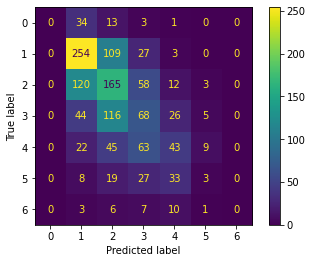

In [589]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania s frekvenciou slov

In [590]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_split=10)

In [591]:
y_pred_train_rf = model.predict(X_train_combined_rf)

In [592]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.987389659520807
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       141
           1       0.97      1.00      0.98       916
           2       0.99      1.00      1.00       867
           3       0.99      1.00      1.00       611
           4       0.99      0.99      0.99       380
           5       1.00      0.97      0.99       213
           6       1.00      0.73      0.84        44

    accuracy                           0.99      3172
   macro avg       0.99      0.94      0.96      3172
weighted avg       0.99      0.99      0.99      3172



In [593]:
y_pred_rf = model.predict(X_test_combined_rf)

In [594]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [595]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3985294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.56      0.67      0.61       393
           2       0.34      0.53      0.41       358
           3       0.23      0.21      0.22       259
           4       0.36      0.18      0.24       182
           5       0.30      0.03      0.06        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


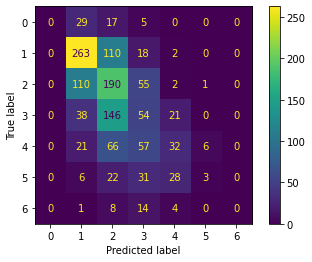

In [596]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf frekvenciou slov

In [597]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_split=10)

In [598]:
y_pred_train_rf = model.predict(X_train_combined2_rf)

In [599]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9908575031525851
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96       141
           1       0.98      1.00      0.99       916
           2       1.00      1.00      1.00       867
           3       0.99      1.00      1.00       611
           4       0.99      0.99      0.99       380
           5       1.00      0.98      0.99       213
           6       1.00      0.80      0.89        44

    accuracy                           0.99      3172
   macro avg       0.99      0.95      0.97      3172
weighted avg       0.99      0.99      0.99      3172



In [600]:
y_pred_rf = model.predict(X_test_combined2_rf)

In [601]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [602]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.39926470588235297
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.56      0.69      0.62       393
           2       0.33      0.53      0.41       358
           3       0.21      0.16      0.18       259
           4       0.38      0.21      0.27       182
           5       0.29      0.02      0.04        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.25      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


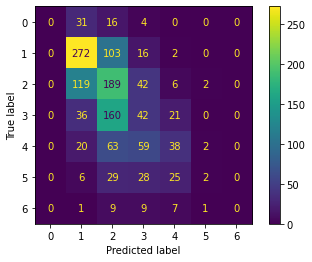

In [603]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov

In [604]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.7175180704935543


In [605]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_out_rf)

In [606]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9990542244640606
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      0.98      0.99        44

    accuracy                           1.00      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [607]:
y_pred_rf = best_rf_model.predict(X_test_out_rf)

In [608]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [609]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7213235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.41        51
           1       0.81      0.87      0.83       393
           2       0.68      0.81      0.74       358
           3       0.68      0.72      0.70       259
           4       0.67      0.65      0.66       182
           5       0.65      0.37      0.47        90
           6       1.00      0.04      0.07        27

    accuracy                           0.72      1360
   macro avg       0.78      0.53      0.55      1360
weighted avg       0.73      0.72      0.71      1360



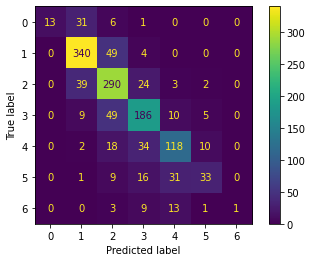

In [610]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a frekvenciou slov

In [611]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [612]:
y_pred_train_rf = model.predict(X_train_combined_out_rf)

In [613]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [614]:
y_pred_rf = model.predict(X_test_combined_out_rf)

In [615]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [616]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5742647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      0.84      0.77       393
           2       0.51      0.75      0.61       358
           3       0.46      0.46      0.46       259
           4       0.52      0.34      0.41       182
           5       0.67      0.04      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.57      1360
   macro avg       0.41      0.35      0.33      1360
weighted avg       0.54      0.57      0.53      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


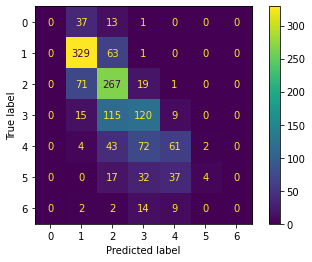

In [617]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf frekvenciou slov

In [618]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=200)

In [619]:
y_pred_train_rf = model.predict(X_train_combined2_out_rf)

In [620]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [621]:
y_pred_rf = model.predict(X_test_combined2_out_rf)

In [622]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [623]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5625
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.70      0.85      0.77       393
           2       0.51      0.72      0.60       358
           3       0.43      0.40      0.41       259
           4       0.52      0.34      0.41       182
           5       0.55      0.07      0.12        90
           6       0.00      0.00      0.00        27

    accuracy                           0.56      1360
   macro avg       0.39      0.34      0.33      1360
weighted avg       0.52      0.56      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


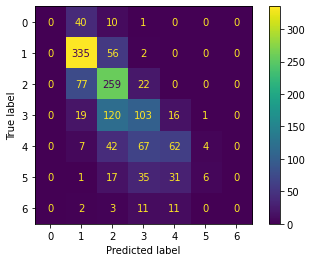

In [624]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim

In [625]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scaled_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.40194093246230655


In [626]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scaled_rf)

In [627]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.830390920554855
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.16      0.28       141
           1       0.77      0.96      0.85       916
           2       0.80      0.90      0.85       867
           3       0.89      0.85      0.87       611
           4       0.94      0.73      0.82       380
           5       0.99      0.68      0.81       213
           6       1.00      0.23      0.37        44

    accuracy                           0.83      3172
   macro avg       0.91      0.64      0.69      3172
weighted avg       0.85      0.83      0.82      3172



In [628]:
y_pred_rf = best_rf_model.predict(X_test_scaled_rf)

In [629]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [630]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40294117647058825
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.54      0.67      0.60       393
           2       0.35      0.48      0.41       358
           3       0.27      0.27      0.27       259
           4       0.36      0.23      0.28       182
           5       0.17      0.04      0.07        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.24      0.24      0.23      1360
weighted avg       0.36      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


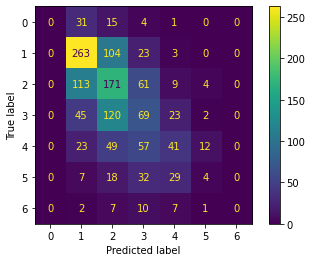

In [631]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a frekvenciou slov

In [632]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [633]:
y_pred_train_rf = model.predict(X_train_combined_scaled_rf)

In [634]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9032156368221942
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17       141
           1       0.85      1.00      0.92       916
           2       0.88      0.97      0.92       867
           3       0.97      0.96      0.97       611
           4       1.00      0.84      0.91       380
           5       0.99      0.81      0.89       213
           6       1.00      0.27      0.43        44

    accuracy                           0.90      3172
   macro avg       0.95      0.71      0.74      3172
weighted avg       0.92      0.90      0.89      3172



In [635]:
y_pred_rf = model.predict(X_test_combined_scaled_rf)

In [636]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [637]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.70      0.62       393
           2       0.34      0.54      0.42       358
           3       0.23      0.17      0.19       259
           4       0.36      0.16      0.22       182
           5       0.38      0.03      0.06        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


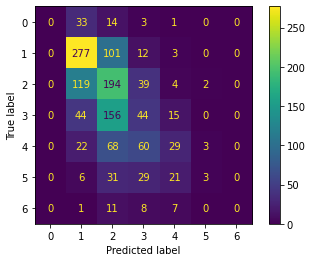

In [638]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf frekvenciou slov

In [639]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [640]:
y_pred_train_rf = model.predict(X_train_combined2_scaled_rf)

In [641]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9350567465321563
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.21      0.34       141
           1       0.89      1.00      0.94       916
           2       0.93      1.00      0.96       867
           3       0.97      0.99      0.98       611
           4       0.98      0.95      0.97       380
           5       0.99      0.85      0.92       213
           6       1.00      0.20      0.34        44

    accuracy                           0.94      3172
   macro avg       0.97      0.74      0.78      3172
weighted avg       0.94      0.94      0.92      3172



In [642]:
y_pred_rf = model.predict(X_test_combined2_scaled_rf)

In [643]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [644]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3985294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.56      0.70      0.62       393
           2       0.33      0.54      0.41       358
           3       0.23      0.17      0.19       259
           4       0.34      0.16      0.22       182
           5       0.25      0.01      0.02        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.24      0.23      0.21      1360
weighted avg       0.35      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


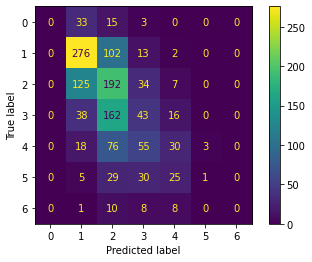

In [645]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim

In [646]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scal_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Najlepší skóre: 0.7153158300007452


In [647]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scal_out_rf)

In [648]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [649]:
y_pred_rf = best_rf_model.predict(X_test_scal_out_rf)

In [650]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [651]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7264705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45        51
           1       0.82      0.89      0.85       393
           2       0.69      0.82      0.75       358
           3       0.68      0.68      0.68       259
           4       0.68      0.61      0.64       182
           5       0.62      0.47      0.53        90
           6       0.00      0.00      0.00        27

    accuracy                           0.73      1360
   macro avg       0.64      0.54      0.56      1360
weighted avg       0.72      0.73      0.71      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


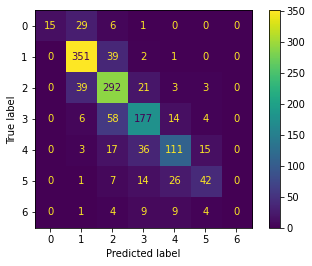

In [652]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a frekvenciou slov

In [653]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [654]:
y_pred_train_rf = model.predict(X_train_combined_scal_out_rf)

In [655]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [656]:
y_pred_rf = model.predict(X_test_combined_scal_out_rf)

In [657]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [658]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5830882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      0.88      0.79       393
           2       0.52      0.73      0.61       358
           3       0.47      0.45      0.46       259
           4       0.55      0.37      0.44       182
           5       0.50      0.06      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.58      1360
   macro avg       0.39      0.35      0.34      1360
weighted avg       0.54      0.58      0.54      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


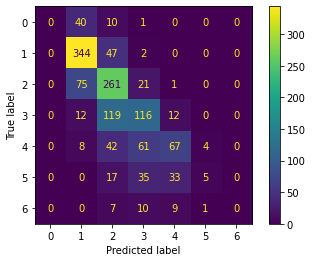

In [659]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf frekvenciou slov

In [660]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [661]:
y_pred_train_rf = model.predict(X_train_combined2_scal_out_rf)

In [662]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [663]:
y_pred_rf = model.predict(X_test_combined2_scal_out_rf)

In [664]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
        'accuracy_test': accuracy_score(y_test, y_pred_rf)
    })

In [665]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5676470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.73      0.88      0.80       393
           2       0.50      0.75      0.60       358
           3       0.41      0.39      0.40       259
           4       0.53      0.30      0.38       182
           5       0.60      0.07      0.12        90
           6       0.00      0.00      0.00        27

    accuracy                           0.57      1360
   macro avg       0.40      0.34      0.33      1360
weighted avg       0.53      0.57      0.52      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


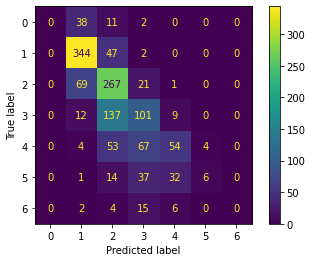

In [666]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

In [667]:
results_rf3 = pd.DataFrame(results_list3_rf)
print(results_rf3)

    best_score  accuracy_train  accuracy_test
0     0.397526        0.926860       0.391912
1          NaN        0.987390       0.398529
2          NaN        0.990858       0.399265
3     0.717518        0.999054       0.721324
4          NaN        1.000000       0.574265
5          NaN        1.000000       0.562500
6     0.401941        0.830391       0.402941
7          NaN        0.903216       0.402206
8          NaN        0.935057       0.398529
9     0.715316        1.000000       0.726471
10         NaN        1.000000       0.583088
11         NaN        1.000000       0.567647


Najvyššie skore sme dosiahli s datasetom s ošetrením outlierov. Najvyšší vplyv na výsledok malo ošetrenie outlierov. V niektorých prípadoch sa znížila presnosť, pretože sme použili hyperparametre z gridsearchu z datasetu, ktorý nie je spojený s textovou reprezentáciou na dataset s textovou reprezentáciou, čo nebolo veľmi efektívne.

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania

In [668]:
results_list3_gbm=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [669]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - vyskuša všetky kombinacie hyperparametrov a vyberie najlepší z nich podľa accuracy

In [670]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.3789388708114956


Predikovanie na trenovacich datach

In [671]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_gbm)

In [672]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [673]:
y_pred_gbm = best_gbm_model.predict(X_test_gbm)

In [674]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [675]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3801470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.02      0.03        51
           1       0.52      0.61      0.56       393
           2       0.34      0.48      0.40       358
           3       0.28      0.25      0.27       259
           4       0.32      0.18      0.23       182
           5       0.17      0.08      0.11        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.25      0.23      0.23      1360
weighted avg       0.35      0.38      0.36      1360



Vizualizácia výkonnosti modelu

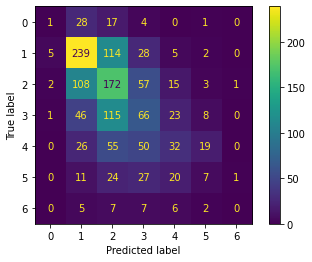

In [676]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania a frekvenciou slov

In [677]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [678]:
y_pred_train_gbm = model.predict(X_train_combined_gbm)

In [679]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [680]:
y_pred_gbm = model.predict(X_test_combined_gbm)

In [681]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [682]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.02      0.04        51
           1       0.58      0.66      0.62       393
           2       0.36      0.51      0.42       358
           3       0.29      0.29      0.29       259
           4       0.35      0.18      0.24       182
           5       0.23      0.12      0.16        90
           6       0.14      0.04      0.06        27

    accuracy                           0.41      1360
   macro avg       0.30      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



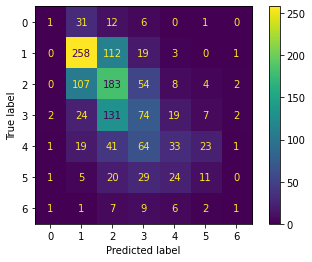

In [683]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - bez osetrenia outlierov a skalovania a tfidf frekvenciou slov

In [684]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [685]:
y_pred_train_gbm = model.predict(X_train_combined2_gbm)

In [686]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [687]:
y_pred_gbm = model.predict(X_test_combined2_gbm)

In [688]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [689]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.02      0.04        51
           1       0.58      0.69      0.63       393
           2       0.36      0.46      0.40       358
           3       0.31      0.31      0.31       259
           4       0.29      0.20      0.24       182
           5       0.16      0.07      0.09        90
           6       0.00      0.00      0.00        27

    accuracy                           0.41      1360
   macro avg       0.27      0.25      0.24      1360
weighted avg       0.38      0.41      0.39      1360



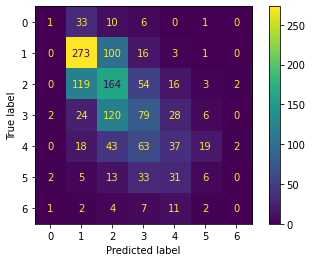

In [690]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov

In [691]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.8124255445987233


In [692]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_out_gbm)

In [693]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [694]:
y_pred_gbm = best_gbm_model.predict(X_test_out_gbm)

In [695]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [696]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8360294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.90      0.55      0.68        51
           1       0.87      0.92      0.89       393
           2       0.80      0.87      0.83       358
           3       0.81      0.84      0.83       259
           4       0.87      0.82      0.84       182
           5       0.80      0.73      0.76        90
           6       1.00      0.22      0.36        27

    accuracy                           0.84      1360
   macro avg       0.86      0.71      0.74      1360
weighted avg       0.84      0.84      0.83      1360



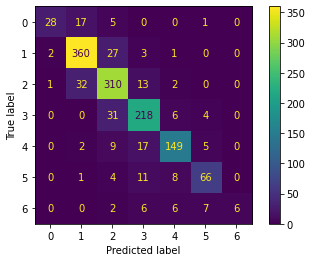

In [697]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a frekvenciou slov

In [698]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [699]:
y_pred_train_gbm = model.predict(X_train_combined_out_gbm)

In [700]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [701]:
y_pred_gbm = model.predict(X_test_combined_out_gbm)

In [702]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [703]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.67        51
           1       0.87      0.93      0.90       393
           2       0.80      0.84      0.82       358
           3       0.78      0.83      0.80       259
           4       0.79      0.75      0.77       182
           5       0.77      0.69      0.73        90
           6       0.75      0.11      0.19        27

    accuracy                           0.81      1360
   macro avg       0.80      0.67      0.70      1360
weighted avg       0.81      0.81      0.81      1360



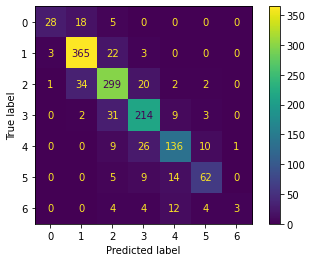

In [704]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a tfidf frekvenciou slov

In [705]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [706]:
y_pred_train_gbm = model.predict(X_train_combined2_out_gbm)

In [707]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [708]:
y_pred_gbm = model.predict(X_test_combined2_out_gbm)

In [709]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [710]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8058823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.67        51
           1       0.87      0.92      0.90       393
           2       0.79      0.84      0.81       358
           3       0.79      0.80      0.79       259
           4       0.72      0.75      0.74       182
           5       0.79      0.67      0.72        90
           6       0.33      0.04      0.07        27

    accuracy                           0.81      1360
   macro avg       0.74      0.65      0.67      1360
weighted avg       0.80      0.81      0.80      1360



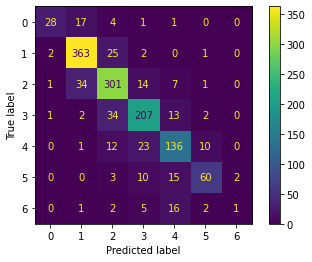

In [711]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim

In [712]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scaled_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Najlepší skóre: 0.3792498571747932


In [713]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scaled_gbm)

In [714]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [715]:
y_pred_gbm = best_gbm_model.predict(X_test_scaled_gbm)

In [716]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [717]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3801470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.33      0.04      0.07        51
           1       0.52      0.62      0.57       393
           2       0.34      0.45      0.39       358
           3       0.30      0.26      0.28       259
           4       0.29      0.19      0.23       182
           5       0.14      0.08      0.10        90
           6       0.00      0.00      0.00        27

    accuracy                           0.38      1360
   macro avg       0.27      0.23      0.23      1360
weighted avg       0.36      0.38      0.36      1360



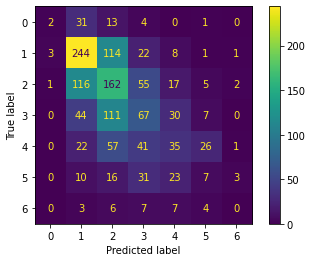

In [718]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a frekvenciou slov

In [719]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=20, min_samples_leaf=4,
                           min_samples_split=5)

In [720]:
y_pred_train_gbm = model.predict(X_train_combined_scaled_gbm)

In [721]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [722]:
y_pred_gbm = model.predict(X_test_combined_scaled_gbm)

In [723]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [724]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4036764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.55      0.70      0.61       393
           2       0.34      0.43      0.38       358
           3       0.31      0.30      0.30       259
           4       0.31      0.17      0.22       182
           5       0.27      0.13      0.18        90
           6       0.00      0.00      0.00        27

    accuracy                           0.40      1360
   macro avg       0.25      0.25      0.24      1360
weighted avg       0.37      0.40      0.38      1360



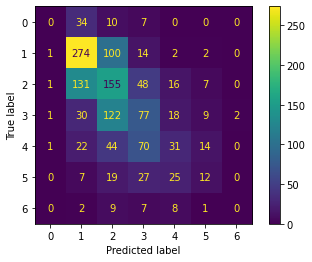

In [725]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - so skalovanim a tfidf frekvenciou slov

In [726]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=20, min_samples_leaf=4,
                           min_samples_split=5)

In [727]:
y_pred_train_gbm = model.predict(X_train_combined2_scaled_gbm)

In [728]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [729]:
y_pred_gbm = model.predict(X_test_combined2_scaled_gbm)

In [730]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [731]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.3948529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.53      0.72      0.61       393
           2       0.34      0.39      0.36       358
           3       0.27      0.25      0.26       259
           4       0.37      0.25      0.30       182
           5       0.16      0.06      0.08        90
           6       0.00      0.00      0.00        27

    accuracy                           0.39      1360
   macro avg       0.24      0.24      0.23      1360
weighted avg       0.35      0.39      0.37      1360



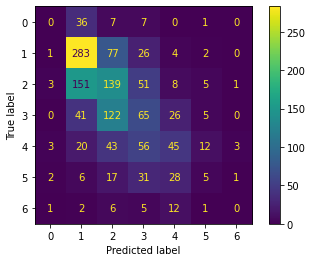

In [732]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim

In [733]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scal_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.8149452296380932


In [734]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scal_out_gbm)

In [735]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [736]:
y_pred_gbm = best_gbm_model.predict(X_test_scal_out_gbm)

In [737]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [738]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8330882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71        51
           1       0.88      0.92      0.90       393
           2       0.81      0.87      0.83       358
           3       0.80      0.83      0.81       259
           4       0.82      0.80      0.81       182
           5       0.81      0.70      0.75        90
           6       1.00      0.26      0.41        27

    accuracy                           0.83      1360
   macro avg       0.86      0.71      0.75      1360
weighted avg       0.84      0.83      0.83      1360



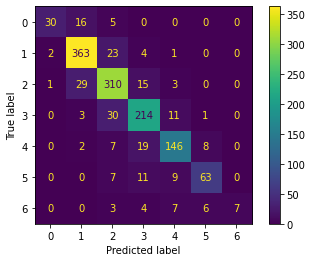

In [739]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim a frekvenciou slov

In [740]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [741]:
y_pred_train_gbm = model.predict(X_train_combined_scal_out_gbm)

In [742]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [743]:
y_pred_gbm = model.predict(X_test_combined_scal_out_gbm)

In [744]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [745]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8095588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.67        51
           1       0.87      0.92      0.90       393
           2       0.78      0.84      0.81       358
           3       0.78      0.81      0.79       259
           4       0.79      0.75      0.77       182
           5       0.75      0.68      0.71        90
           6       0.57      0.15      0.24        27

    accuracy                           0.81      1360
   macro avg       0.77      0.67      0.70      1360
weighted avg       0.81      0.81      0.80      1360



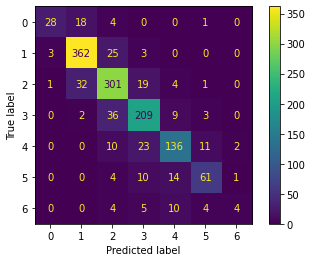

In [746]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING MASHINE - s osetrenim outlierov a skalovanim a tfidf frekvenciou slov

In [747]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200)

In [748]:
y_pred_train_gbm = model.predict(X_train_combined2_scal_out_gbm)

In [749]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       916
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00       380
           5       1.00      1.00      1.00       213
           6       1.00      1.00      1.00        44

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [750]:
y_pred_gbm = model.predict(X_test_combined2_scal_out_gbm)

In [751]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
        'accuracy_test': accuracy_score(y_test, y_pred_gbm)
    })

In [752]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8102941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.67        51
           1       0.87      0.93      0.90       393
           2       0.81      0.84      0.82       358
           3       0.76      0.83      0.79       259
           4       0.77      0.75      0.76       182
           5       0.75      0.67      0.71        90
           6       0.00      0.00      0.00        27

    accuracy                           0.81      1360
   macro avg       0.69      0.65      0.66      1360
weighted avg       0.79      0.81      0.80      1360



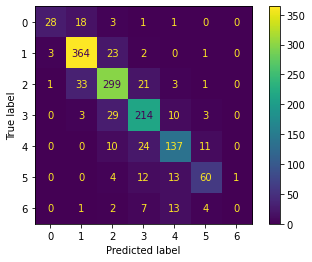

In [753]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

In [754]:
results_gbm3 = pd.DataFrame(results_list3_gbm)
print(results_gbm3)

    best_score  accuracy_train  accuracy_test
0     0.378939             1.0       0.380147
1          NaN             1.0       0.412500
2          NaN             1.0       0.411765
3     0.812426             1.0       0.836029
4          NaN             1.0       0.813971
5          NaN             1.0       0.805882
6     0.379250             1.0       0.380147
7          NaN             1.0       0.403676
8          NaN             1.0       0.394853
9     0.814945             1.0       0.833088
10         NaN             1.0       0.809559
11         NaN             1.0       0.810294


Najvyššie skore sme dosiahli s datasetom s ošetrením outlierov. Najvyšší vplyv na výsledok malo ošetrenie outlierov. V niektorých prípadoch sa znížila presnosť, pretože sme použili hyperparametre z gridsearchu z datasetu, ktorý nie je spojený s textovou reprezentáciou na dataset s textovou reprezentáciou, čo nebolo veľmi efektívne. Model sa pretrénoval.

Pridanie typu datasetu k tabuľkám (zmena indexov)

In [755]:
row_names = ['bez osetrenia outlierov a skalovania', 'bez osetrenia outlierov a skalovania s frekvenciou slov', 'bez osetrenia outlierov a skalovania s tfidf frekvenciou slov', 's osetrenim outlierov', 's osetrenim outlierov a s frekvenciou slov', 's osetrenim outlierov a s tfidf frekvenciou slov', 'so skalovanim','so skalovanim a s frekvenciou slov','so skalovanim a s tfidf frekvenciou slov','s osetrenim outlierov a skalovanim','s osetrenim outlierov a skalovanim a s frekvenciou slov','s osetrenim outlierov a skalovanim a s tfidf frekvenciou slov']  # Zoznam by mal obsahovať meno pre každý riadok

# Priradenie zoznamu mien do indexu DataFrame
results_svc1.index = row_names
results_svc2.index = row_names
results_svc3.index = row_names

results_rf1.index = row_names
results_rf2.index = row_names
results_rf3.index = row_names

results_gbm1.index = row_names
results_gbm2.index = row_names
results_gbm3.index = row_names

OHODNOTENIE

Podľa výsledkov nižšie môžeme vidieť, že najlepšie výsledky nám poskytol model Gradient Boosting Maschine a to s verziami datasetu, kde boli ošetrený outlieri a nebol dataset spojený so žiadnymi textovými reprezentáciami (frekvencia slov, tfidf frekvencia slov). Podľa tabuliek vidíme, že ošetrenie outlierov malo naväčší vplyv na accuracy. Naopak najhoršie výsledky mal čistý dataset bez ošetrenia outlierov a škálovania a bez pridania textových reprezentácií vo všetkých modeloch. Najhorší model na určovanie vekovej skupiny v mojej práci bol SVC, tým sa mi najmenšie accuracy podarilo dosiahnúť.

In [756]:
results_svc1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.332598   
bez osetrenia outlierov a skalovania s frekvenc...        0.346154   
bez osetrenia outlierov a skalovania s tfidf fr...        0.332913   
s osetrenim outlierov                                     0.411097   
s osetrenim outlierov a s frekvenciou slov                0.417402   
s osetrenim outlierov a s tfidf frekvenciou slov          0.412043   
so skalovanim                                             0.435057   
so skalovanim a s frekvenciou slov                        0.644073   
so skalovanim a s tfidf frekvenciou slov                  0.598676   
s osetrenim outlierov a skalovanim                        0.411097   
s osetrenim outlierov a skalovanim a s frekvenc...        0.417402   
s osetrenim outlierov a skalovanim a s tfidf fr...        0.412043   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.327941  
bez osetrenia outlierov a skalovania s frekvenc...       0.336029  
bez osetrenia outlierov a skalovania s tfidf fr...       0.327941  
s osetrenim outlierov                                    0.418382  
s osetrenim outlierov a s frekvenciou slov               0.423529  
s osetrenim outlierov a s tfidf frekvenciou slov         0.419853  
so skalovanim                                            0.388971  
so skalovanim a s frekvenciou slov                       0.417647  
so skalovanim a s tfidf frekvenciou slov                 0.452206  
s osetrenim outlierov a skalovanim                       0.418382  
s osetrenim outlierov a skalovanim a s frekvenc...       0.423529  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.419853

In [757]:
results_svc2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.380517   
bez osetrenia outlierov a skalovania s frekvenc...        0.646280   
bez osetrenia outlierov a skalovania s tfidf fr...        0.400378   
s osetrenim outlierov                                     0.485813   
s osetrenim outlierov a s frekvenciou slov                0.646910   
s osetrenim outlierov a s tfidf frekvenciou slov          0.490858   
so skalovanim                                             0.428752   
so skalovanim a s frekvenciou slov                        0.645649   
so skalovanim a s tfidf frekvenciou slov                  0.640921   
s osetrenim outlierov a skalovanim                        0.485813   
s osetrenim outlierov a skalovanim a s frekvenc...        0.646910   
s osetrenim outlierov a skalovanim a s tfidf fr...        0.490858   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.361765  
bez osetrenia outlierov a skalovania s frekvenc...       0.418382  
bez osetrenia outlierov a skalovania s tfidf fr...       0.375735  
s osetrenim outlierov                                    0.488235  
s osetrenim outlierov a s frekvenciou slov               0.417647  
s osetrenim outlierov a s tfidf frekvenciou slov         0.477941  
so skalovanim                                            0.397059  
so skalovanim a s frekvenciou slov                       0.416912  
so skalovanim a s tfidf frekvenciou slov                 0.454412  
s osetrenim outlierov a skalovanim                       0.488235  
s osetrenim outlierov a skalovanim a s frekvenc...       0.417647  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.477941

In [758]:
results_svc3

best_score  \
bez osetrenia outlierov a skalovania                  0.398482   
bez osetrenia outlierov a skalovania s frekvenc...         NaN   
bez osetrenia outlierov a skalovania s tfidf fr...         NaN   
s osetrenim outlierov                                 0.517952   
s osetrenim outlierov a s frekvenciou slov                 NaN   
s osetrenim outlierov a s tfidf frekvenciou slov           NaN   
so skalovanim                                         0.393121   
so skalovanim a s frekvenciou slov                         NaN   
so skalovanim a s tfidf frekvenciou slov                   NaN   
s osetrenim outlierov a skalovanim                    0.517952   
s osetrenim outlierov a skalovanim a s frekvenc...         NaN   
s osetrenim outlierov a skalovanim a s tfidf fr...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.438840   
bez osetrenia outlierov a skalovania s frekvenc...        1.000000   
bez osetrenia outlierov a skalovania s tfidf fr...        0.385246   
s osetrenim outlierov                                     0.562421   
s osetrenim outlierov a s frekvenciou slov                1.000000   
s osetrenim outlierov a s tfidf frekvenciou slov          0.672446   
so skalovanim                                             0.428752   
so skalovanim a s frekvenciou slov                        0.645649   
so skalovanim a s tfidf frekvenciou slov                  0.640921   
s osetrenim outlierov a skalovanim                        0.562421   
s osetrenim outlierov a skalovanim a s frekvenc...        1.000000   
s osetrenim outlierov a skalovanim a s tfidf fr...        0.672446   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.387500  
bez osetrenia outlierov a skalovania s frekvenc...       0.377206  
bez osetrenia outlierov a skalovania s tfidf fr...       0.369118  
s osetrenim outlierov                                    0.507353  
s osetrenim outlierov a s frekvenciou slov               0.388235  
s osetrenim outlierov a s tfidf frekvenciou slov         0.538235  
so skalovanim                                            0.397059  
so skalovanim a s frekvenciou slov                       0.416912  
so skalovanim a s tfidf frekvenciou slov                 0.454412  
s osetrenim outlierov a skalovanim                       0.507353  
s osetrenim outlierov a skalovanim a s frekvenc...       0.388235  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.538235

In [759]:
results_rf1

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s frekvenc...             1.0   
bez osetrenia outlierov a skalovania s tfidf fr...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s frekvenciou slov                     1.0   
s osetrenim outlierov a s tfidf frekvenciou slov               1.0   
so skalovanim                                                  1.0   
so skalovanim a s frekvenciou slov                             1.0   
so skalovanim a s tfidf frekvenciou slov                       1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s frekvenc...             1.0   
s osetrenim outlierov a skalovanim a s tfidf fr...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.408088  
bez osetrenia outlierov a skalovania s frekvenc...       0.397794  
bez osetrenia outlierov a skalovania s tfidf fr...       0.406618  
s osetrenim outlierov                                    0.745588  
s osetrenim outlierov a s frekvenciou slov               0.625735  
s osetrenim outlierov a s tfidf frekvenciou slov         0.610294  
so skalovanim                                            0.395588  
so skalovanim a s frekvenciou slov                       0.408824  
so skalovanim a s tfidf frekvenciou slov                 0.407353  
s osetrenim outlierov a skalovanim                       0.746324  
s osetrenim outlierov a skalovanim a s frekvenc...       0.621324  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.601471

In [760]:
results_rf2

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s frekvenc...             1.0   
bez osetrenia outlierov a skalovania s tfidf fr...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s frekvenciou slov                     1.0   
s osetrenim outlierov a s tfidf frekvenciou slov               1.0   
so skalovanim                                                  1.0   
so skalovanim a s frekvenciou slov                             1.0   
so skalovanim a s tfidf frekvenciou slov                       1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s frekvenc...             1.0   
s osetrenim outlierov a skalovanim a s tfidf fr...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.388235  
bez osetrenia outlierov a skalovania s frekvenc...       0.408088  
bez osetrenia outlierov a skalovania s tfidf fr...       0.407353  
s osetrenim outlierov                                    0.719853  
s osetrenim outlierov a s frekvenciou slov               0.567647  
s osetrenim outlierov a s tfidf frekvenciou slov         0.547794  
so skalovanim                                            0.386029  
so skalovanim a s frekvenciou slov                       0.404412  
so skalovanim a s tfidf frekvenciou slov                 0.402941  
s osetrenim outlierov a skalovanim                       0.731618  
s osetrenim outlierov a skalovanim a s frekvenc...       0.561765  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.558824

In [761]:
results_rf3

best_score  \
bez osetrenia outlierov a skalovania                  0.397526   
bez osetrenia outlierov a skalovania s frekvenc...         NaN   
bez osetrenia outlierov a skalovania s tfidf fr...         NaN   
s osetrenim outlierov                                 0.717518   
s osetrenim outlierov a s frekvenciou slov                 NaN   
s osetrenim outlierov a s tfidf frekvenciou slov           NaN   
so skalovanim                                         0.401941   
so skalovanim a s frekvenciou slov                         NaN   
so skalovanim a s tfidf frekvenciou slov                   NaN   
s osetrenim outlierov a skalovanim                    0.715316   
s osetrenim outlierov a skalovanim a s frekvenc...         NaN   
s osetrenim outlierov a skalovanim a s tfidf fr...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.926860   
bez osetrenia outlierov a skalovania s frekvenc...        0.987390   
bez osetrenia outlierov a skalovania s tfidf fr...        0.990858   
s osetrenim outlierov                                     0.999054   
s osetrenim outlierov a s frekvenciou slov                1.000000   
s osetrenim outlierov a s tfidf frekvenciou slov          1.000000   
so skalovanim                                             0.830391   
so skalovanim a s frekvenciou slov                        0.903216   
so skalovanim a s tfidf frekvenciou slov                  0.935057   
s osetrenim outlierov a skalovanim                        1.000000   
s osetrenim outlierov a skalovanim a s frekvenc...        1.000000   
s osetrenim outlierov a skalovanim a s tfidf fr...        1.000000   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.391912  
bez osetrenia outlierov a skalovania s frekvenc...       0.398529  
bez osetrenia outlierov a skalovania s tfidf fr...       0.399265  
s osetrenim outlierov                                    0.721324  
s osetrenim outlierov a s frekvenciou slov               0.574265  
s osetrenim outlierov a s tfidf frekvenciou slov         0.562500  
so skalovanim                                            0.402941  
so skalovanim a s frekvenciou slov                       0.402206  
so skalovanim a s tfidf frekvenciou slov                 0.398529  
s osetrenim outlierov a skalovanim                       0.726471  
s osetrenim outlierov a skalovanim a s frekvenc...       0.583088  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.567647

In [762]:
results_gbm1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.730139   
bez osetrenia outlierov a skalovania s frekvenc...        0.870744   
bez osetrenia outlierov a skalovania s tfidf fr...        0.904477   
s osetrenim outlierov                                     0.977617   
s osetrenim outlierov a s frekvenciou slov                0.991803   
s osetrenim outlierov a s tfidf frekvenciou slov          0.993695   
so skalovanim                                             0.730139   
so skalovanim a s frekvenciou slov                        0.875788   
so skalovanim a s tfidf frekvenciou slov                  0.905107   
s osetrenim outlierov a skalovanim                        0.977617   
s osetrenim outlierov a skalovanim a s frekvenc...        0.989281   
s osetrenim outlierov a skalovanim a s tfidf fr...        0.994956   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.384559  
bez osetrenia outlierov a skalovania s frekvenc...       0.418382  
bez osetrenia outlierov a skalovania s tfidf fr...       0.434559  
s osetrenim outlierov                                    0.880882  
s osetrenim outlierov a s frekvenciou slov               0.868382  
s osetrenim outlierov a s tfidf frekvenciou slov         0.854412  
so skalovanim                                            0.383088  
so skalovanim a s frekvenciou slov                       0.422794  
so skalovanim a s tfidf frekvenciou slov                 0.422059  
s osetrenim outlierov a skalovanim                       0.879412  
s osetrenim outlierov a skalovanim a s frekvenc...       0.872059  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.855882

In [763]:
results_gbm2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.708071   
bez osetrenia outlierov a skalovania s frekvenc...        0.876103   
bez osetrenia outlierov a skalovania s tfidf fr...        0.912043   
s osetrenim outlierov                                     0.959016   
s osetrenim outlierov a s frekvenciou slov                0.985498   
s osetrenim outlierov a s tfidf frekvenciou slov          0.991173   
so skalovanim                                             0.696721   
so skalovanim a s frekvenciou slov                        0.872320   
so skalovanim a s tfidf frekvenciou slov                  0.909836   
s osetrenim outlierov a skalovanim                        0.957125   
s osetrenim outlierov a skalovanim a s frekvenc...        0.985498   
s osetrenim outlierov a skalovanim a s tfidf fr...        0.992119   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.381618  
bez osetrenia outlierov a skalovania s frekvenc...       0.421324  
bez osetrenia outlierov a skalovania s tfidf fr...       0.423529  
s osetrenim outlierov                                    0.844118  
s osetrenim outlierov a s frekvenciou slov               0.827941  
s osetrenim outlierov a s tfidf frekvenciou slov         0.814706  
so skalovanim                                            0.384559  
so skalovanim a s frekvenciou slov                       0.426471  
so skalovanim a s tfidf frekvenciou slov                 0.421324  
s osetrenim outlierov a skalovanim                       0.850735  
s osetrenim outlierov a skalovanim a s frekvenc...       0.827206  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.815441

In [764]:
results_gbm3

best_score  \
bez osetrenia outlierov a skalovania                  0.378939   
bez osetrenia outlierov a skalovania s frekvenc...         NaN   
bez osetrenia outlierov a skalovania s tfidf fr...         NaN   
s osetrenim outlierov                                 0.812426   
s osetrenim outlierov a s frekvenciou slov                 NaN   
s osetrenim outlierov a s tfidf frekvenciou slov           NaN   
so skalovanim                                         0.379250   
so skalovanim a s frekvenciou slov                         NaN   
so skalovanim a s tfidf frekvenciou slov                   NaN   
s osetrenim outlierov a skalovanim                    0.814945   
s osetrenim outlierov a skalovanim a s frekvenc...         NaN   
s osetrenim outlierov a skalovanim a s tfidf fr...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s frekvenc...             1.0   
bez osetrenia outlierov a skalovania s tfidf fr...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s frekvenciou slov                     1.0   
s osetrenim outlierov a s tfidf frekvenciou slov               1.0   
so skalovanim                                                  1.0   
so skalovanim a s frekvenciou slov                             1.0   
so skalovanim a s tfidf frekvenciou slov                       1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s frekvenc...             1.0   
s osetrenim outlierov a skalovanim a s tfidf fr...             1.0   

                                                    accuracy_test  
bez osetrenia outlierov a skalovania                     0.380147  
bez osetrenia outlierov a skalovania s frekvenc...       0.412500  
bez osetrenia outlierov a skalovania s tfidf fr...       0.411765  
s osetrenim outlierov                                    0.836029  
s osetrenim outlierov a s frekvenciou slov               0.813971  
s osetrenim outlierov a s tfidf frekvenciou slov         0.805882  
so skalovanim                                            0.380147  
so skalovanim a s frekvenciou slov                       0.403676  
so skalovanim a s tfidf frekvenciou slov                 0.394853  
s osetrenim outlierov a skalovanim                       0.833088  
s osetrenim outlierov a skalovanim a s frekvenc...       0.809559  
s osetrenim outlierov a skalovanim a s tfidf fr...       0.810294

Grafická vizualizácia

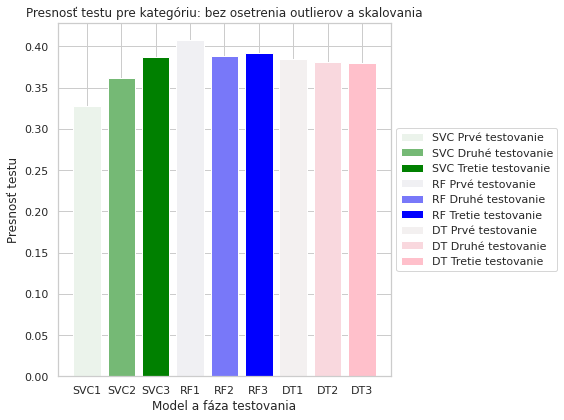

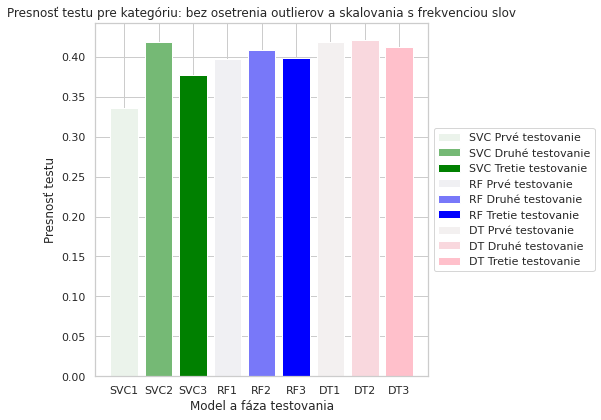

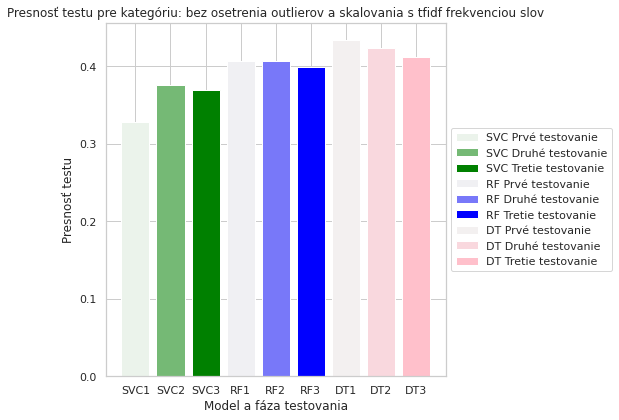

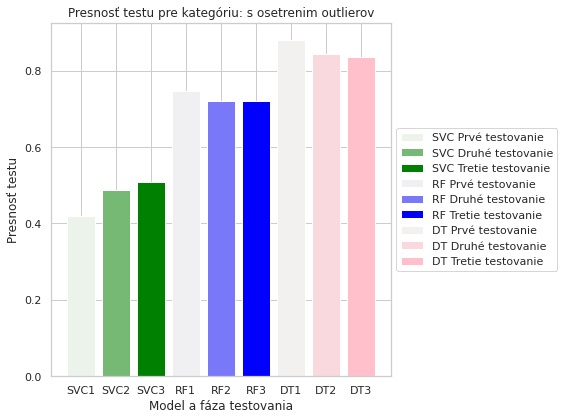

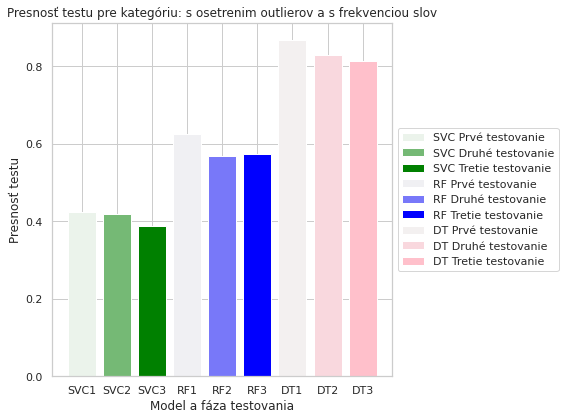

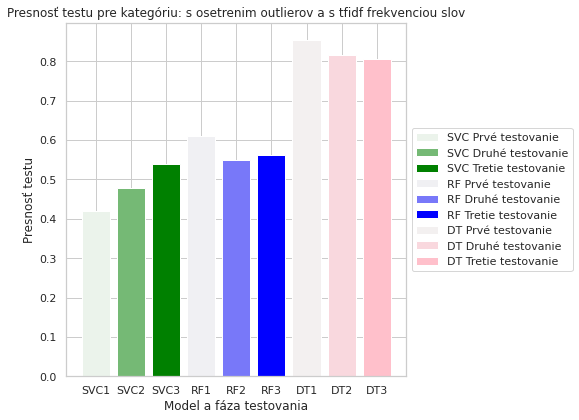

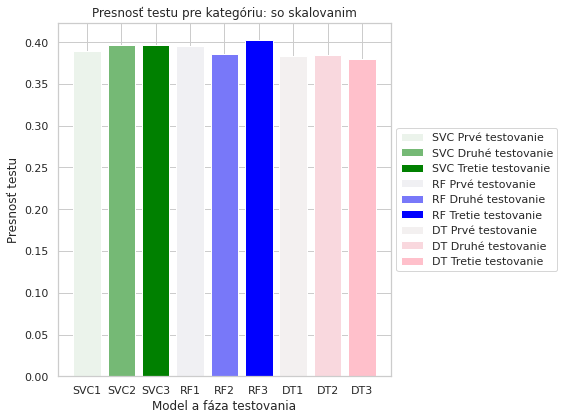

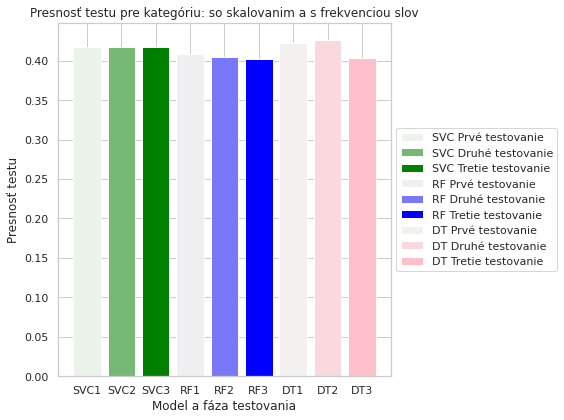

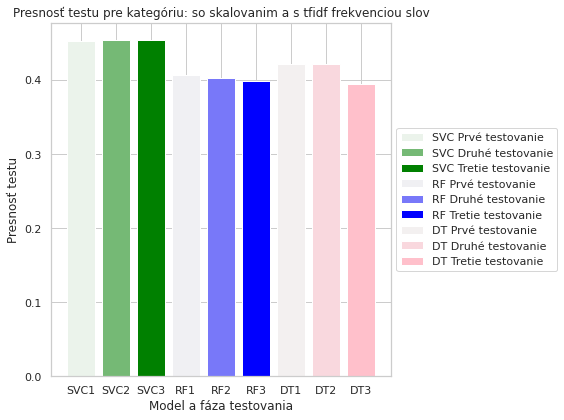

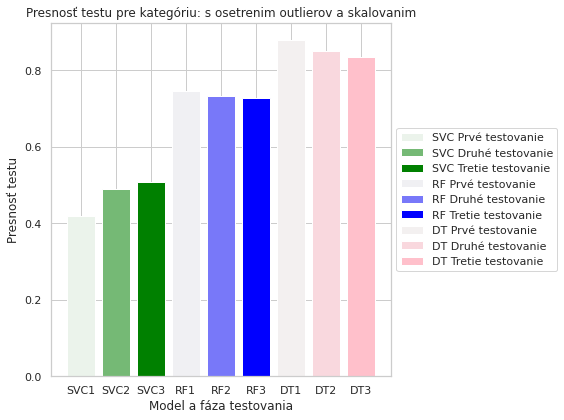

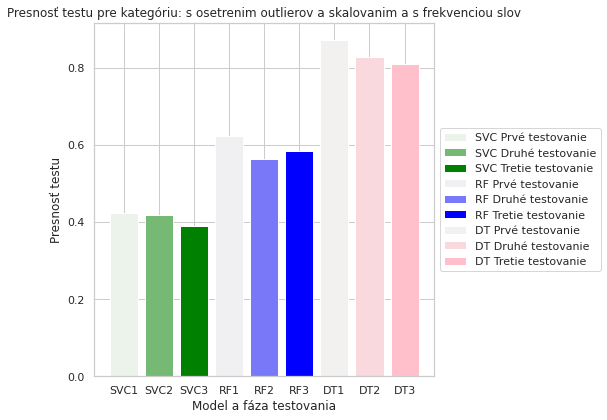

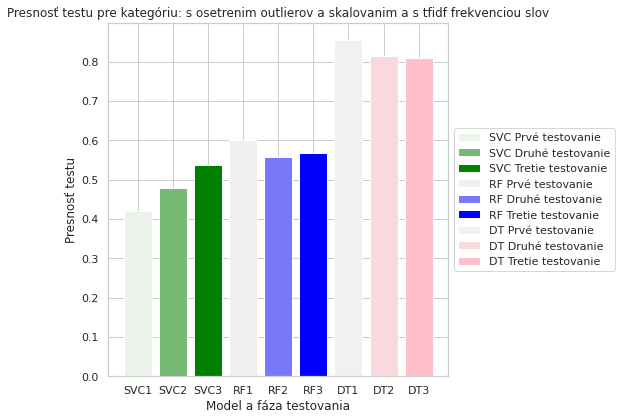

In [765]:
# Nastavenie štýlu Seaborn pre pekné grafy
sns.set(style="whitegrid")

test_categories = results_svc1.index.tolist()

# Pre každú kategóriu vytvoríme graf
for category in test_categories:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farebné schémy pre testy
    colors_svc = sns.light_palette("green", 3)
    colors_rf = sns.light_palette("blue", 3)
    colors_gbm = sns.light_palette("pink", 3)

    # Pridanie dát pre SVC
    ax.bar('SVC1', results_svc1.loc[category, 'accuracy_test'], label='SVC Prvé testovanie', color=colors_svc[0])
    ax.bar('SVC2', results_svc2.loc[category, 'accuracy_test'], label='SVC Druhé testovanie', color=colors_svc[1])
    ax.bar('SVC3', results_svc3.loc[category, 'accuracy_test'], label='SVC Tretie testovanie', color=colors_svc[2])

    # Pridanie dát pre Random Forest
    ax.bar('RF1', results_rf1.loc[category, 'accuracy_test'], label='RF Prvé testovanie', color=colors_rf[0])
    ax.bar('RF2', results_rf2.loc[category, 'accuracy_test'], label='RF Druhé testovanie', color=colors_rf[1])
    ax.bar('RF3', results_rf3.loc[category, 'accuracy_test'], label='RF Tretie testovanie', color=colors_rf[2])

    # Pridanie dát pre GRADIENT BOOSTING MASHINE
    ax.bar('DT1', results_gbm1.loc[category, 'accuracy_test'], label='DT Prvé testovanie', color=colors_gbm[0])
    ax.bar('DT2', results_gbm2.loc[category, 'accuracy_test'], label='DT Druhé testovanie', color=colors_gbm[1])
    ax.bar('DT3', results_gbm3.loc[category, 'accuracy_test'], label='DT Tretie testovanie', color=colors_gbm[2])

    # Nastavenie legendy mimo grafu na pravej strane
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Titulok grafu
    ax.set_title(f'Presnosť testu pre kategóriu: {category}')

    # Popisy osí
    ax.set_xlabel('Model a fáza testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazenie grafu
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Uvoľnenie priestoru pre legendu
    plt.show()

<Figure size 864x504 with 0 Axes>

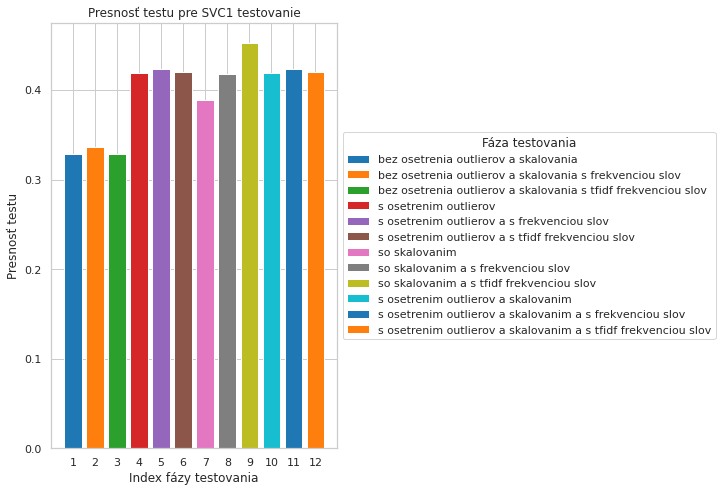

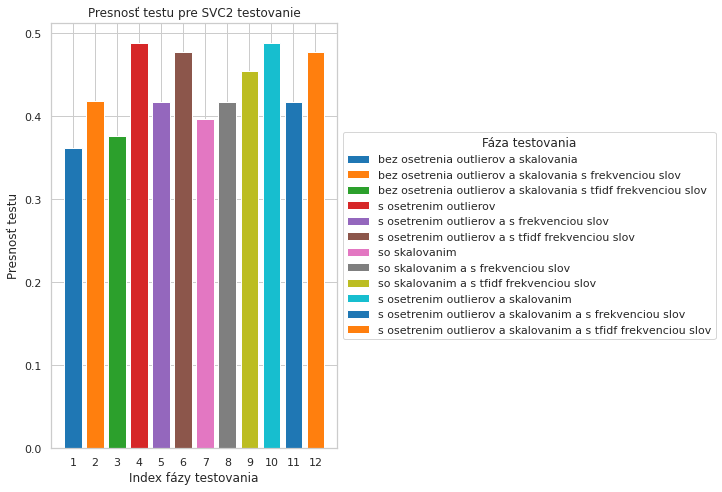

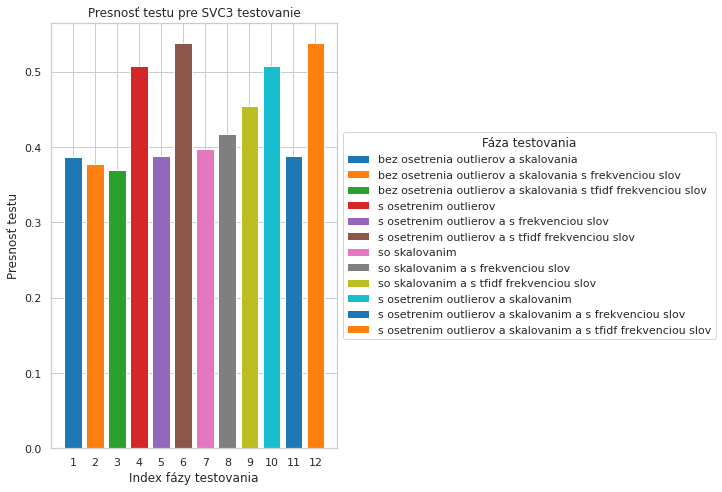

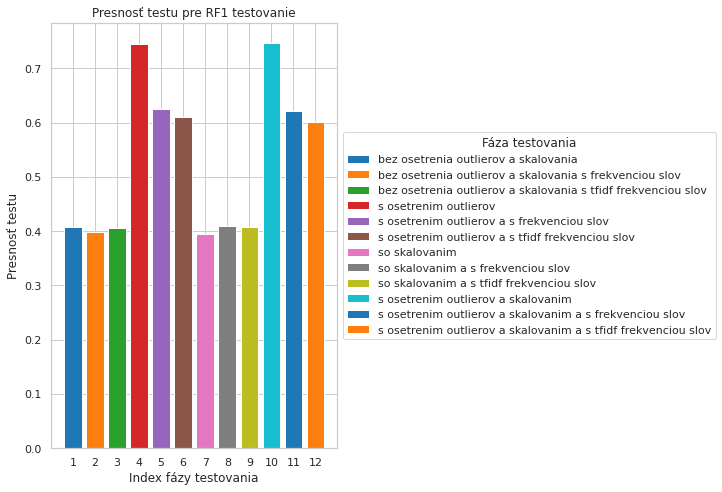

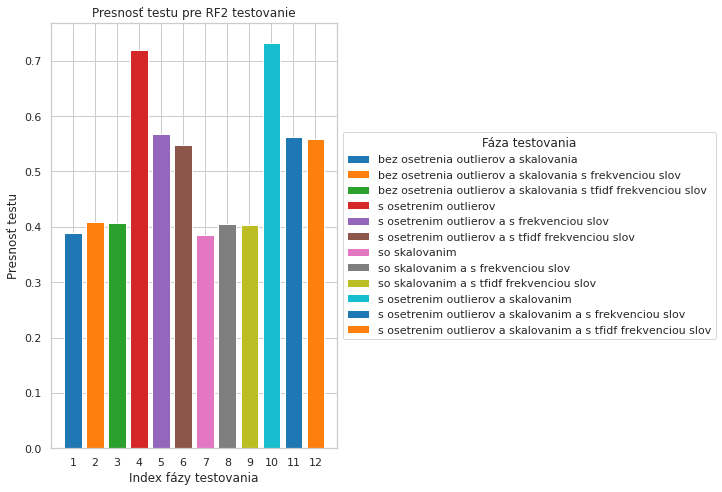

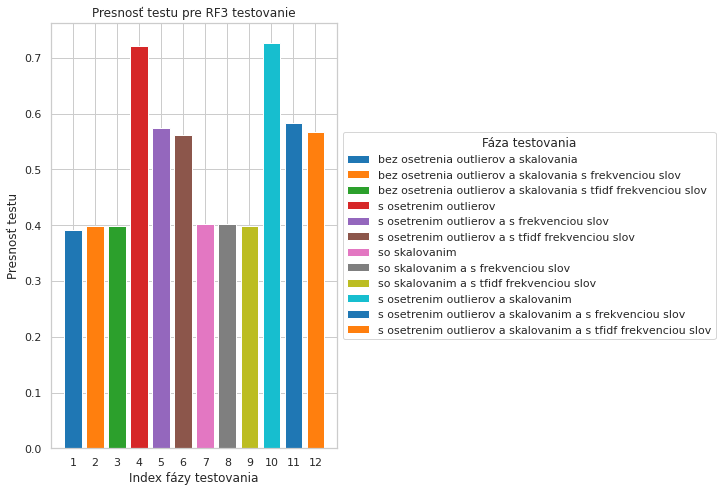

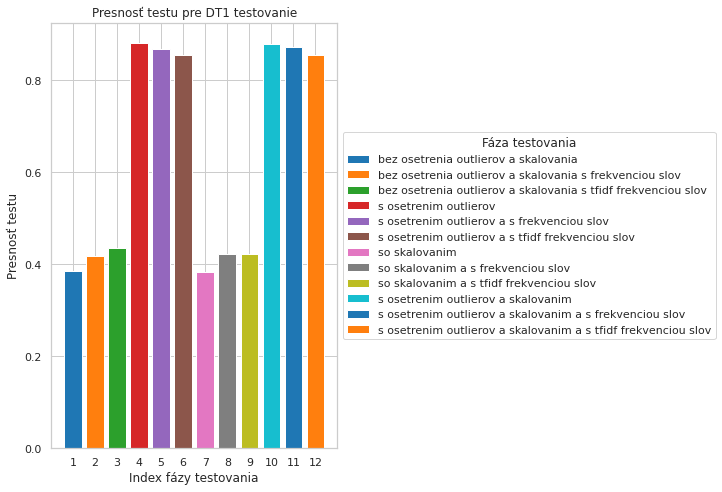

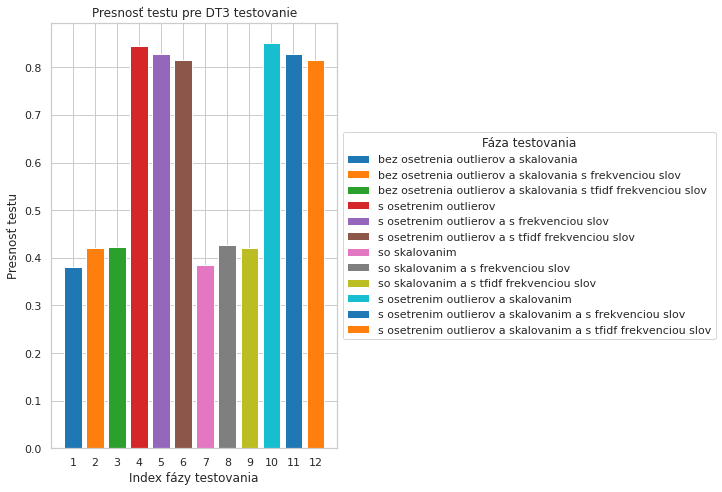

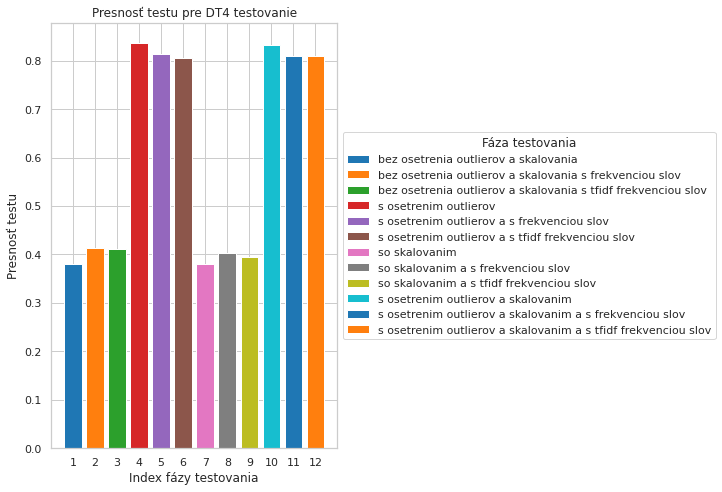

In [766]:
# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 7))

# Farebná paleta pre rôzne testovania
colors = sns.color_palette("tab10", 12)

# Vykreslenie grafu pre každý DataFrame
for results_df, label in [(results_svc1, 'SVC1'), (results_svc2, 'SVC2'), (results_svc3, 'SVC3'), (results_rf1, 'RF1'), (results_rf2, 'RF2'), (results_rf3, 'RF3'), (results_gbm1, 'DT1'), (results_gbm2, 'DT3'), (results_gbm3, 'DT4')]:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Názvy indexov vo vašom DataFrame, upravte podľa potreby
    index_names = results_df.index.tolist()

    # Vykreslenie stĺpcov pre každý index
    for i, index_name in enumerate(index_names):
        # Vyberieme farbu pre aktuálny index
        color = colors[i % len(colors)]
        # Vykreslíme stĺpec a pridáme popisek pre legendu
        ax.bar(i, results_df.loc[index_name, 'accuracy_test'], color=color, label=index_name)

    # Nastavíme os x na čísla od 0 do počtu indexov - 1
    ax.set_xticks(np.arange(len(index_names)))
    ax.set_xticklabels(np.arange(1, len(index_names) + 1))

    # Pridáme legendu
    ax.legend(title='Fáza testovania', loc='center left', bbox_to_anchor=(1, 0.5))

    # Nastavíme názov grafu a popisy osí
    ax.set_title(f'Presnosť testu pre {label} testovanie')
    ax.set_xlabel('Index fázy testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazíme graf
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()